In [52]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [53]:
closing_price=pd.read_excel('closing_price.xlsx', index_col=0)  
###check which stock
closing_price.loc['Days']>4500
###choose A UN Equity
AUN_Equity=closing_price[['A UN Equity']]
AUN_Equity=AUN_Equity.drop(index=['Days'])
#AUN_Equity['diff']=AUN_Equity.diff(1)
AUN_Equity['daily_return']=AUN_Equity['A UN Equity'].pct_change(1)
AUN_Equity=AUN_Equity.reset_index()
AUN_Equity['t']=AUN_Equity.index

In [54]:
closing_price[['A UN Equity']]

A UN Equity
Bloomberg Ticker                
Days                   5217.0000
2000-01-03 00:00:00      48.2167
2000-01-04 00:00:00      44.1741
2000-01-05 00:00:00      42.0685
2000-01-06 00:00:00      39.6682
...                          ...
2019-12-25 00:00:00      85.3000
2019-12-26 00:00:00      85.4500
2019-12-27 00:00:00      85.4200
2019-12-30 00:00:00      84.9000
2019-12-31 00:00:00      85.3100

[5218 rows x 1 columns]

In [55]:
df_price = AUN_Equity.dropna()
values = np.array(df_price['daily_return'].dropna())
prices = np.array(df_price['A UN Equity'].dropna())
# Calculate the alphabet
epsilon = 0.002
alphabet = np.empty_like(values)
alphabet = alphabet.astype(str)

np.put(alphabet, np.where(values < -1 * epsilon)[0],"D")
np.put(alphabet, np.where(values > epsilon)[0],"U")
np.put(alphabet, np.where(np.logical_and((values <= epsilon),(values >= -1 * epsilon)))[0],"H")

# Train test split
training_alphabet = alphabet[:int(len(values)*3/4)]
testing_alphabet = alphabet[-int(len(values)*1/4):]

In [56]:
np.put(alphabet, np.where(values < -1 * epsilon)[0],"D")
np.put(alphabet, np.where(values > epsilon)[0],"U")
np.put(alphabet, np.where(np.logical_and((values <= epsilon),(values >= -1 * epsilon)))[0],"H")

# Train test split
training_values = values[:int(len(values)*3/4)]
testing_values = values[-int(len(values)*1/4):]

training_prices= prices[:int(len(prices)*3/4)]
testing_prices= prices[-int(len(values)*1/4):]

In [57]:
# Train test split for prices
training_prices = prices[:int(len(values)*3/4)]
testing_prices = prices[-int(len(values)*1/4):]

In [58]:
FU_X=[training_values[i] for i in range(0,len(training_alphabet)-1) if training_alphabet[i+1]=='U' ]
FD_X=[training_values[i] for i in range(0,len(training_alphabet)-1) if training_alphabet[i+1]=='D' ]

In [59]:
len(FU_X)

1729

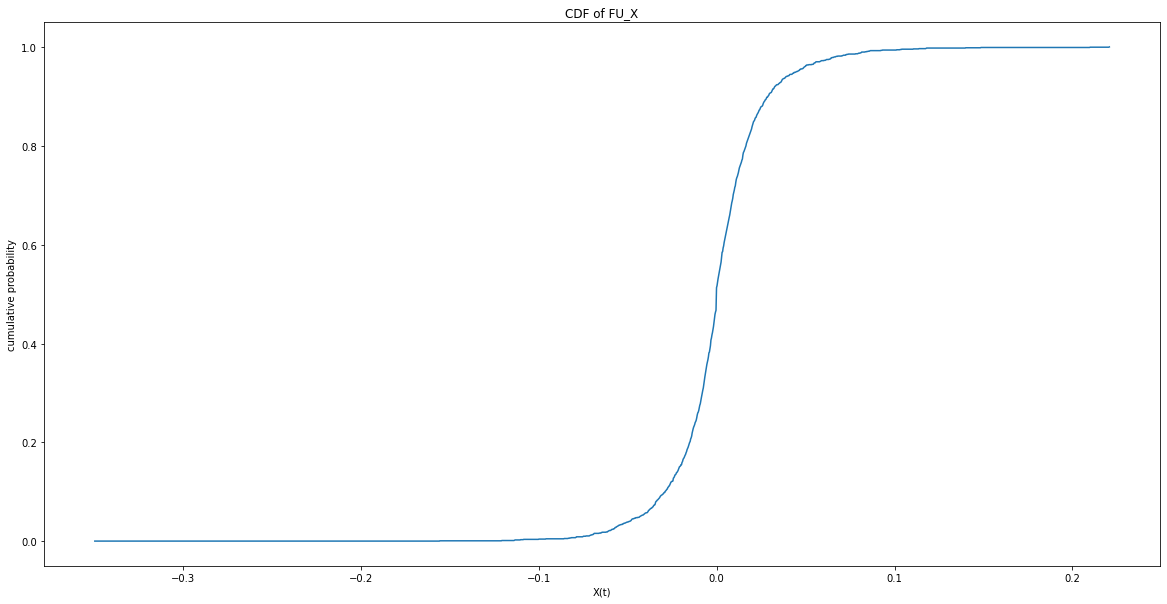

In [60]:
res = stats.relfreq(FU_X, numbins=2000)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y=np.cumsum(res.frequency)
plt.plot(x,y)
plt.xlabel('X(t)')
plt.ylabel('cumulative probability')
plt.title('CDF of FU_X')
plt.show()

In [61]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [62]:
FU_b=4*(y[np.where(x==find_nearest(x, 0))[0][0]]-y[np.where(x==find_nearest(x, 0))[0][0]-1])/((x[np.where(x==find_nearest(x, 0))[0][0]]-x[np.where(x==find_nearest(x, 0))[0][0]-1]))

In [63]:
FU_b

640.7495955562965

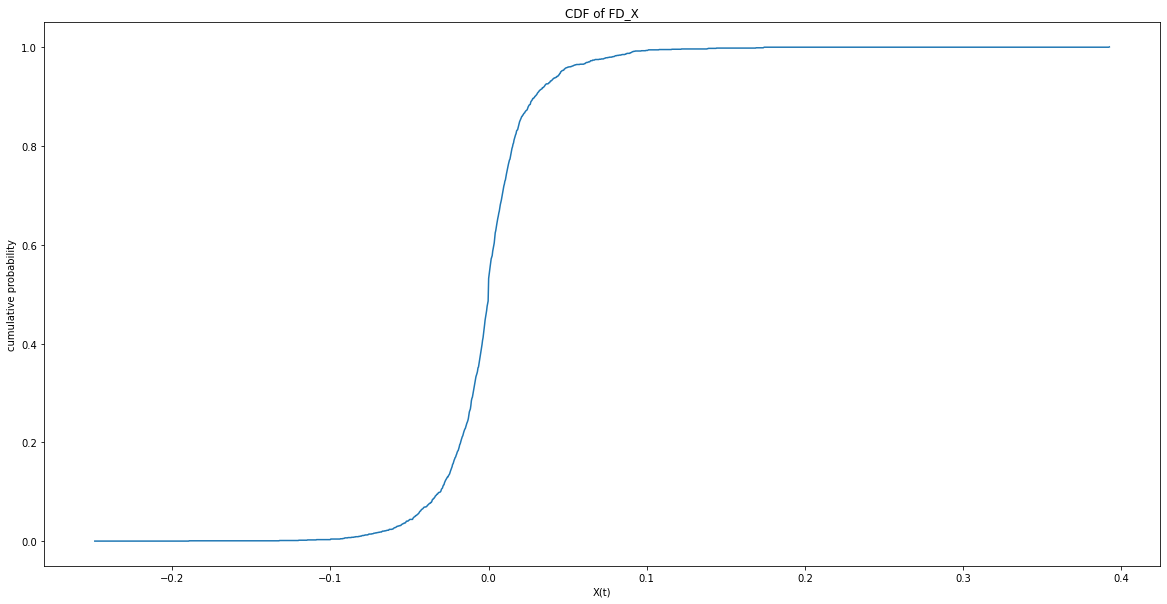

In [64]:
res = stats.relfreq(FD_X, numbins=2000)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
y=np.cumsum(res.frequency)
plt.plot(x,y)
plt.xlabel('X(t)')
plt.ylabel('cumulative probability')
plt.title('CDF of FD_X')
plt.show()

# Question 3

In [65]:
y[np.where(x==find_nearest(x, 0))[0][0]]

0.5317131001778298

In [66]:
FD_b=4*(y[np.where(x==find_nearest(x, 0))[0][0]]-y[np.where(x==find_nearest(x, 0))[0][0]-1])/((x[np.where(x==find_nearest(x, 0))[0][0]]-x[np.where(x==find_nearest(x, 0))[0][0]-1]))

In [67]:
FD_b

569.0311285016946

$F'(x) = f(x) = \frac{b*e^{-b*x}}{(1+e^{-bx})^2}$

In [68]:
def derivative_f(b,x):
    return b*np.exp(-b*x)/(1+np.exp(-b*x))**2

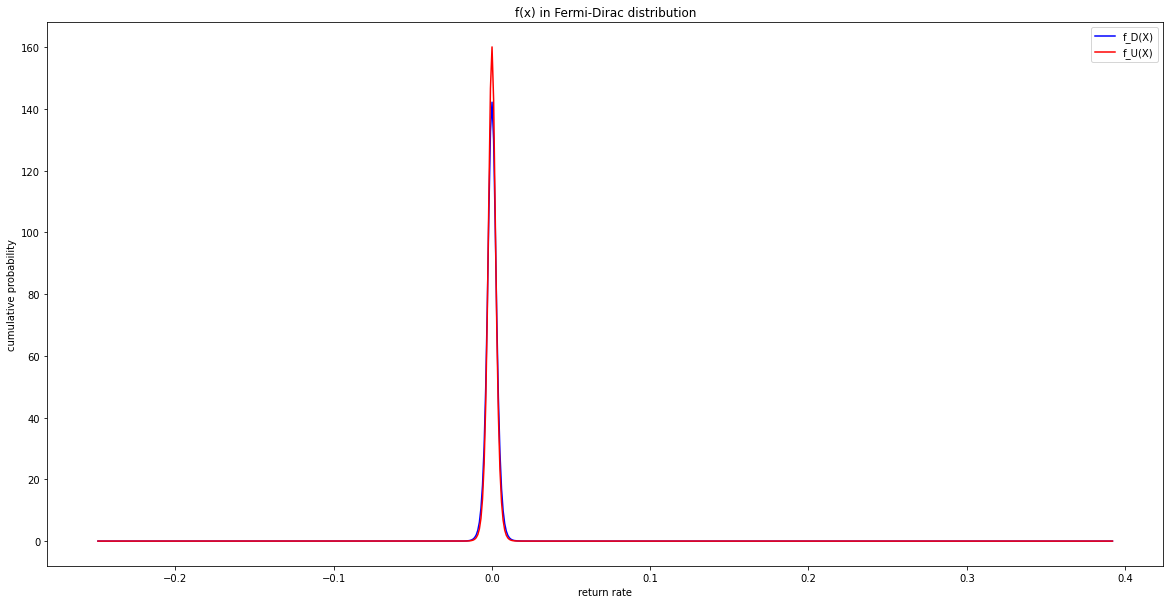

In [69]:
x0=[i for i in np.arange(x.min(),x.max(),0.001)]
y0=[derivative_f(FD_b,i) for i in np.arange(x.min(),x.max(),0.001)]
y1=[derivative_f(FU_b,i) for i in np.arange(x.min(),x.max(),0.001)]
plt.plot(x0,y0, color='blue', label='f_D(X)')
plt.plot(x0,y1, color='red', label='f_U(X)')
#plt.plot(x,y, color='green', label='Fx(X)')
plt.legend()
plt.xlabel('return rate')
plt.ylabel('cumulative probability')
plt.title('f(x) in Fermi-Dirac distribution')
plt.show()

In [70]:
print("b for F_D = ", np.max(y0))
print("b for F_U = ", np.max(y1))

b for F_D =  142.20897059284016
b for F_U =  160.11771172834628


In [71]:
square=0
for i in range(1,len(x0)):
    square+=(x0[i]-x0[i-1])*(y0[i])

In [72]:
def gaussian_dist(x, mu, sig):
    cont = 1/(np.sqrt(2*math.pi*(sig**2)))
    var = math.exp(-1*((x-mu)**2/(2*(sig**2))))
    return cont * var

In [73]:
mu_d

6.043563061834101e-07

In [74]:
sig_d

0.03162688763448379

In [75]:
mu_U

0.0006006655063917827

In [76]:
sig_U

0.029217751756246396

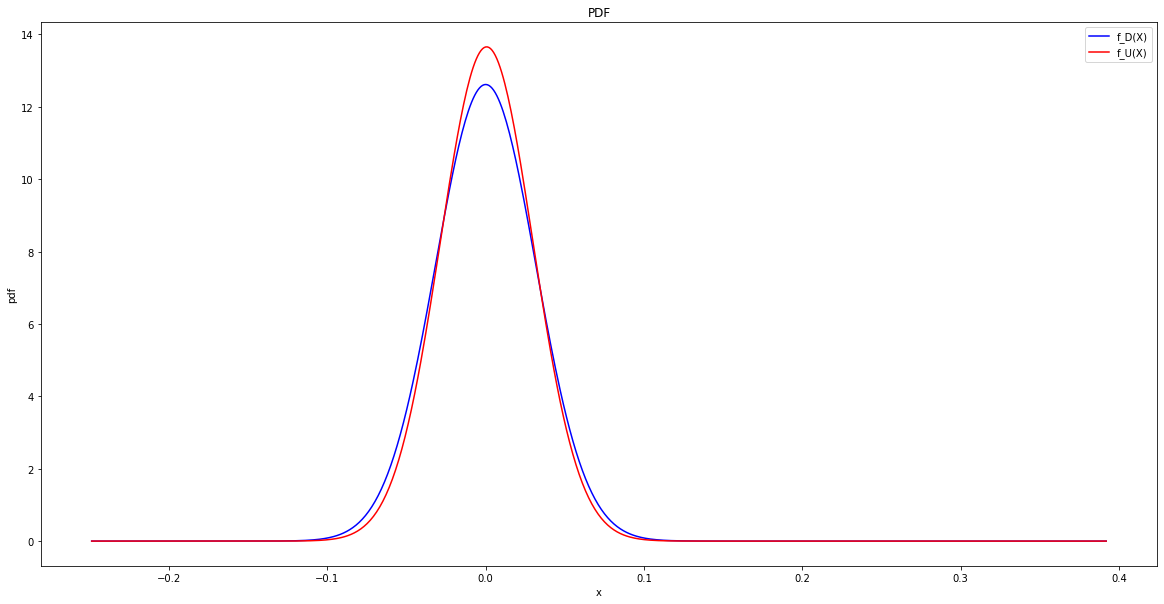

In [77]:
mu_d = np.mean(FD_X)
sig_d = np.std(FD_X)
mu_U = np.mean(FU_X)
sig_U = np.std(FU_X)
gaussiam_dist_D = []
gaussiam_dist_U = []
x0=[i for i in np.arange(x.min(),x.max(),0.001)]
for i in x0:
    gaussiam_dist_D.append(gaussian_dist(i, mu_d, sig_d))
    gaussiam_dist_U.append(gaussian_dist(i, mu_U, sig_U))
    
plt.plot(x0, gaussiam_dist_D, color='blue', label='f_D(X)')
plt.plot(x0, gaussiam_dist_U, color='red', label='f_U(X)')
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('PDF')
plt.show()

# Q4 bayes detector 

In [78]:
FU=len([item for item in training_alphabet[1:] if item=='U'])/len(training_alphabet[1:])

In [79]:
FD=len([item for item in training_alphabet[1:] if item=='D'])/len(training_alphabet[1:])

In [80]:
FH=len([item for item in training_alphabet[1:] if item=='H'])/len(training_alphabet[1:])

In [81]:
FU

0.44208642290974176

In [82]:
FD

0.43134748146254154

In [83]:
FH

0.1265660956277167

In [84]:
from scipy.optimize import fsolve
def bayes_fermi(x):
    return ((FD_b*math.exp(-FD_b*x)/(1+math.exp(-FD_b*x))**2)
            /(FU_b*math.exp(-FU_b*x)/(1+math.exp(-FU_b*x))**2) - FU/FD)

starting_guess=-0.01
x1_bayes = fsolve(bayes_fermi, starting_guess)

starting_guess=0.01
x2_bayes = fsolve(bayes_fermi, starting_guess)

print(f"The roots are {x1_bayes} and {x2_bayes}")

The roots are [-0.00286025] and [0.00286025]


### In Feder， we find x1=0.003 and x2=-0.003

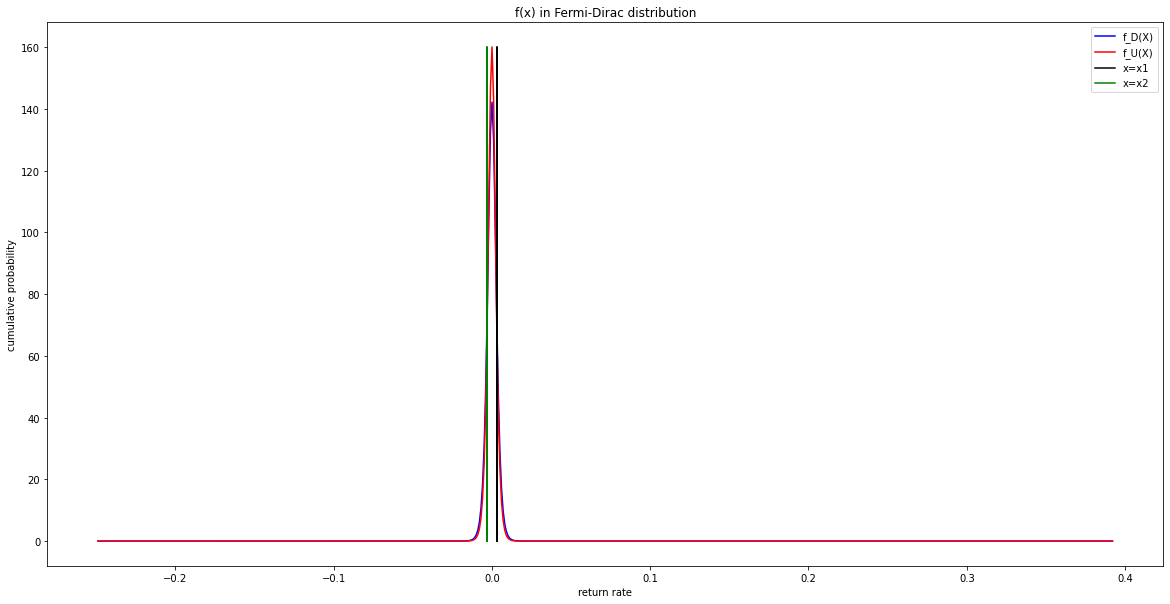

In [85]:
res = stats.relfreq(FD_X, numbins=2000)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
x1=[0.003]*len(x0)
x2=[-0.003]*len(x0)
x0=[i for i in np.arange(x.min(),x.max(),0.001)]
y0=[derivative_f(FD_b,i) for i in np.arange(x.min(),x.max(),0.001)]
y1=[derivative_f(FU_b,i) for i in np.arange(x.min(),x.max(),0.001)]
plt.plot(x0,y0, color='blue', label='f_D(X)')
plt.plot(x0,y1, color='red', label='f_U(X)')
plt.plot(x1,y1, color='black', label='x=x1')
plt.plot(x2,y1, color='green', label='x=x2')
#plt.plot(x,y, color='green', label='Fx(X)')
plt.legend()
plt.xlabel('return rate')
plt.ylabel('cumulative probability')
plt.title('f(x) in Fermi-Dirac distribution')
plt.show()

In [86]:
def gaussian_fermi(x):
    return ((1/math.sqrt(2*math.pi*sig_d**2)*math.exp(-(x-mu_d)/(2*sig_d**2)))
           /(1/math.sqrt(2*math.pi*sig_U**2)*math.exp(-(x-mu_U)/(2*sig_U**2))) - FU/FD)

starting_guess=-0.03
x1_gauss = fsolve(gaussian_fermi, starting_guess)

starting_guess=0.01
x2_gauss = fsolve(gaussian_fermi, starting_guess)

print(f"The roots are {x1_gauss} and {x2_gauss}")

The roots are [-0.0299996] and [0.00530494]


/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### In gaussian x1=0.005 and x2=-0.03

In [87]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

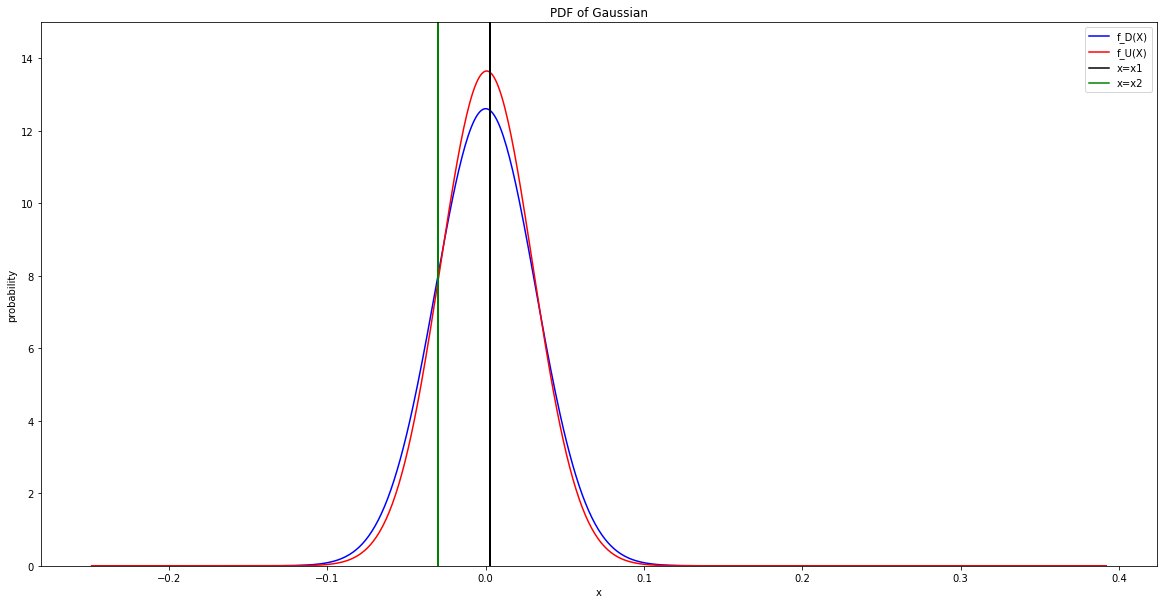

In [88]:
res = stats.relfreq(FD_X, numbins=2000)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
mu_d = np.mean(FD_X)
sig_d = np.std(FD_X)
mu_U = np.mean(FU_X)
sig_U = np.std(FU_X)
gaussiam_dist_D = []
gaussiam_dist_U = []
x0=[i for i in np.arange(x.min(),x.max(),0.001)]
for i in x0:
    gaussiam_dist_D.append(gaussian_dist(i, mu_d, sig_d))
    gaussiam_dist_U.append(gaussian_dist(i, mu_U, sig_U))

x1=[0.003]*len(x0)
x2=[-0.03]*len(x0)
plt.plot(x0, gaussiam_dist_D, color='blue', label='f_D(X)')
plt.plot(x0, gaussiam_dist_U, color='red', label='f_U(X)')
plt.plot(x1,y1, color='black', label='x=x1')
plt.plot(x2,y1, color='green', label='x=x2')
plt.legend()
plt.xlabel('x')
plt.ylabel('probability')
plt.title('PDF of Gaussian')
plt.ylim(0,15)
plt.show()

# Question 5

In [89]:
def one_day_rule(training, label):
    rule_count = {}
    rule_engine_label = {}
    for char in ['U', 'D', 'H']:
        try:
            prod = len([i for i in range(len(training)-1) if \
                        training[i] == char[0] and
                        training[i+1] == label])
            rule_engine_label[char] = prod
            prod_count = len([i for i in range(len(training)-1) if \
                training[i] == char[0]])
            rule_count[char] = prod_count
        except ZeroDivisionError:
            print(f"The combination {char} does not exist")

    confidence_number = {''.join(list(k)) : [v] for k, v in rule_engine_label.items()}
    support_number = {''.join(list(k)) : [v] for k, v in rule_count.items()}

    confidence_number_df = pd.DataFrame(confidence_number).T
    confidence_number_df.columns = ['confidence_number']
    confidence_number_df = confidence_number_df.join(pd.DataFrame(support_number).T)[['confidence_number', 0]]
    confidence_number_df.columns = ['confidence_number', 'support_number']
    confidence_number_df = confidence_number_df.dropna()
    confidence_number_df = confidence_number_df[confidence_number_df['confidence_number'] !=0]

    confidence_number_df['confidence_rate'] = confidence_number_df['confidence_number'] / confidence_number_df['support_number']
    confidence_number_df['support_rate'] =  confidence_number_df['support_number']/confidence_number_df['support_number'].sum()

    confidence_number_df = confidence_number_df.sort_values(['confidence_rate', 'support_rate'],ascending=False)

    return confidence_number_df

In [90]:
one_day_rule(training_alphabet, 'D')

confidence_number  support_number  confidence_rate  support_rate
D                755            1687         0.447540      0.431347
H                213             495         0.430303      0.126566
U                719            1729         0.415847      0.442086

In [91]:
one_day_rule(training_alphabet, 'U')

confidence_number  support_number  confidence_rate  support_rate
U                772            1729         0.446501      0.442086
H                218             495         0.440404      0.126566
D                739            1687         0.438056      0.431347

In [92]:
training = training_alphabet

In [93]:
def five_days_rule(training, label):
    rule_engine_drop = {}
    rule_count = {}
    for char in itertools.product('DHU', repeat=5):
        try:
            prod = len([i for i in range(len(training)-5) if \
                        training[i] == char[0] and
                        training[i+1] == char[1] and
                        training[i+2] == char[2] and
                        training[i+3] == char[3] and
                        training[i+4] == char[4] and
                        training[i+5] == label])
            rule_engine_drop[char] = prod

            prod_count = len([i for i in range(len(training)-5) if \
                training[i] == char[0] and
                training[i+1] == char[1] and
                training[i+2] == char[2] and
                training[i+3] == char[3] and
                training[i+4] == char[4]])
            rule_count[char] = prod_count
        except ZeroDivisionError:
            print(f"The combination {char} does not exist")

    confidence_number = {''.join(list(k)) : [v] for k, v in rule_engine_drop.items()}
    support_number = {''.join(list(k)) : [v] for k, v in rule_count.items()}

    confidence_number_df = pd.DataFrame(confidence_number).T
    confidence_number_df.columns = ['confidence_number']

    support_number_df = pd.DataFrame(support_number).T
    support_number_df.columns = ['support_number']
    confidence_number_df = confidence_number_df.join(support_number_df)

    confidence_number_df['confidence_rate'] = confidence_number_df['confidence_number'] / confidence_number_df['support_number']
    confidence_number_df['support_rate'] =  confidence_number_df['support_number'] / confidence_number_df['support_number'].sum()
    confidence_number_df = confidence_number_df.sort_values(['confidence_rate', 'support_rate'],ascending=False)
    return confidence_number_df.iloc[:2]

In [94]:
five_days_rule(training_alphabet, 'D').iloc[:1].index[0]

'DHUDH'

In [95]:
five_days_rule(training_alphabet, 'U').iloc[:1].index[0]

'HUHUH'

# Question 6

In [96]:
def simulation(alphabet, start_amount, gamma, tax, window, interest\
               , x1_detect = None, x2_detect = None, plot = False, double_gamma = False):
    
    # Calculate the testing alphbet in every day
    shape = alphabet.shape[:-1] + (alphabet.shape[-1] - window + 1, window)
    strides = alphabet.strides + (alphabet.strides[-1],)
    testing_alphabet = np.lib.stride_tricks.as_strided(alphabet, shape=shape, strides=strides)
    testing_alphabet = testing_alphabet[-int(len(values)*1/4):]
    testing_alphabet = list(map(lambda x : "".join(x), testing_alphabet))
    
    M = np.zeros(len(testing_alphabet))
    N = np.zeros(len(testing_alphabet))
    V = np.zeros(len(testing_alphabet))
    record = np.zeros(len(testing_alphabet))
    
    # Fill gamma based on either a float value or the gamma array
    if type(gamma) == float or isinstance(gamma, np.floating):
        gamma_list = np.empty(len(testing_alphabet))
        gamma_list.fill(gamma)
    else:
        gamma_list = gamma
    
    # Setting the first day amount as start amount
    M[0] = start_amount
    
    # Getting the best rules for 5 days 
    if window == 5:
        up_rule=five_days_rule(training_alphabet, 'U').iloc[:1].index[0]
        down_rule=five_days_rule(training_alphabet, 'D').iloc[:1].index[0]
    if window == 1:
        up_rule=one_day_rule(training_alphabet, 'U').iloc[:1].index[0]
        down_rule=one_day_rule(training_alphabet, 'D').iloc[:1].index[0]

    for i in range(len(testing_alphabet)):
        M[i] = M[i] * (1 + interest)
        
        # For double gamma scenario
        if testing_alphabet[i] == up_rule and double_gamma == True:
            gamma_list = gamma[0]
        elif testing_alphabet[i] == down_rule and double_gamma == True:
            gamma_list = gamma[1]
        
        # Trigger the up rule in the best rule engine
        if testing_alphabet[i] == up_rule:
            if x1_detect == None or x2_detect == None:
                m = gamma_list[i]*M[i]
                M[i] = M[i]-m
                N[i] = N[i]+(1-tax)*m/testing_prices[i]
                record[i] = 1
            else:
                if x1_detect<=testing_values[i] and testing_values[i]<=x2_detect:
                    m = gamma_list[i]*M[i]
                    M[i] = M[i]-m
                    N[i] = N[i]+(1-tax)*m/testing_prices[i]
                    record[i] = 1
        
        # Trigger the down rule in the best rule engine
        elif testing_alphabet[i] == down_rule:
            if x1_detect == None or x2_detect == None:
                n = gamma_list[i]*N[i]
                M[i] = M[i]+(1-tax)*n*testing_prices[i]
                N[i] = N[i]-n
                record[i] = 1
            else:
                if (x1_detect>testing_values[i] or testing_values[i]>x2_detect):
                    n = gamma_list[i]*N[i]
                    M[i] = M[i]+(1-tax)*n*testing_prices[i]
                    N[i] = N[i]-n
                    record[i] = 1
        else:
            record[i] = 0
                    
        if i!=len(testing_alphabet)-1:
            M[i+1]=M[i]
            N[i+1]=N[i]       

    for i in range(len(V)):
        V[i]=M[i]+N[i]*testing_prices[i]
        
        
    if plot == True:
        plt.plot(V)
        plt.xlabel('t')
        plt.ylabel('V(t)')
        plt.title(f"V(t) with k={window} and gamma={gamma_list[0]}")
        plt.show()
        print(f"The Final Portfolio Value is {V[-1]}")
        
    return V, M, N, record

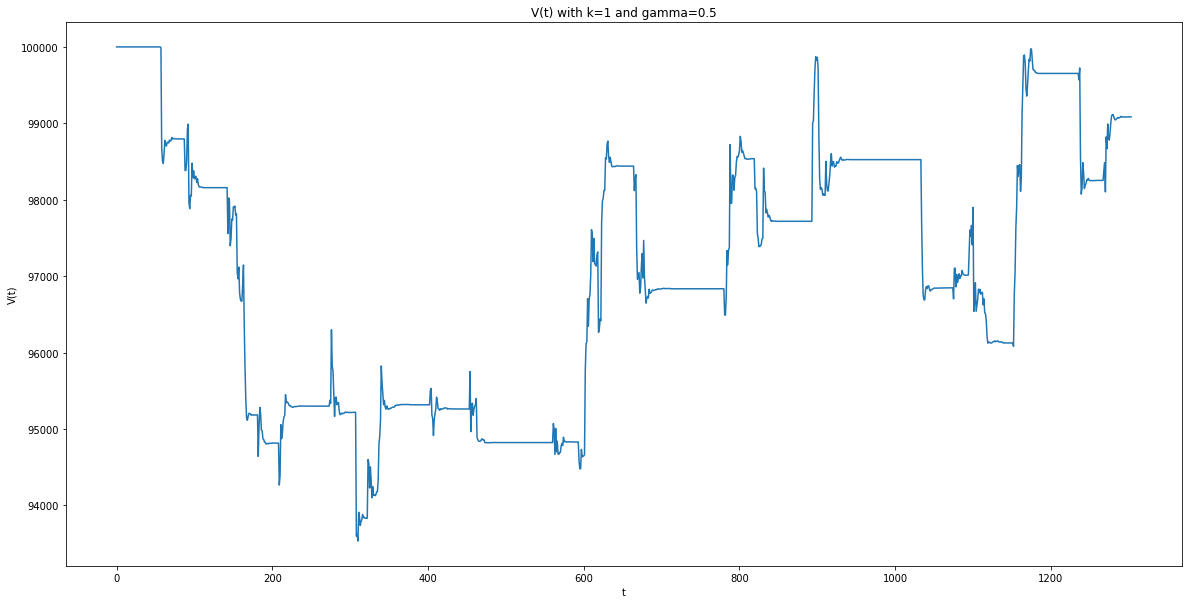

The Final Portfolio Value is 99083.95924908799


In [97]:
# Question 6 (based on testing dataset) - fermi-dirac bayes detector - k=1
V_q6_bayes_1, M_q6_bayes_1, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0, window = 1,interest = 0,\
           x1_detect = x1_bayes, x2_detect = x2_bayes, \
           plot = True)

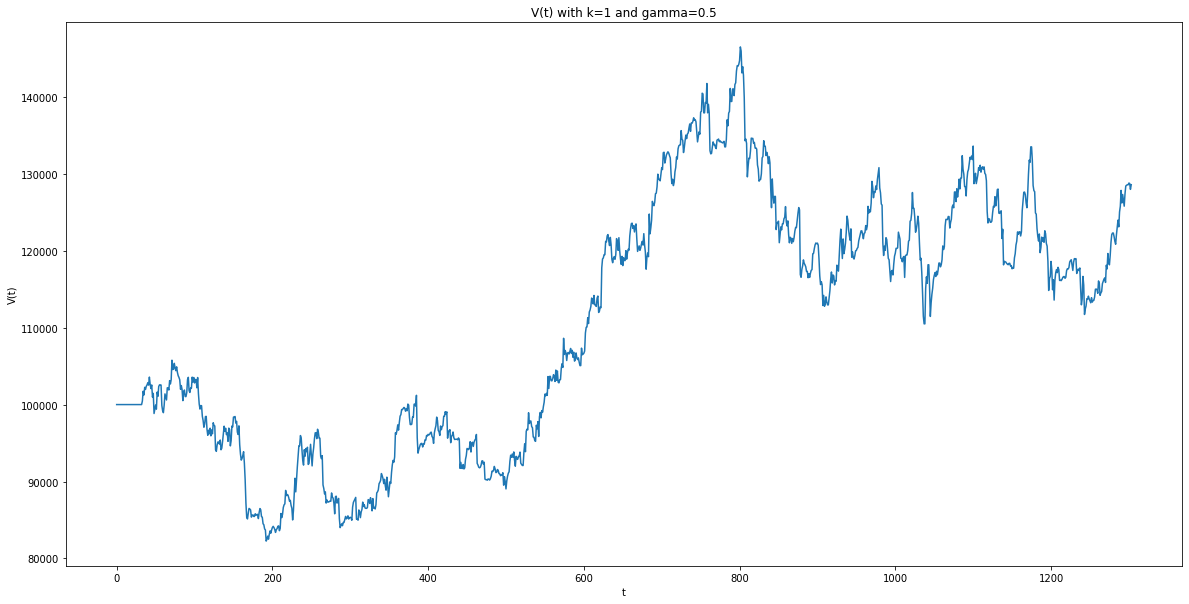

The Final Portfolio Value is 128574.93381814535


In [98]:
# Question 6 (based on testing dataset) - Gaussian bayes detector - k=1
V_q6_gauss_1, M_q6_gauss_1, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0, window = 1,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

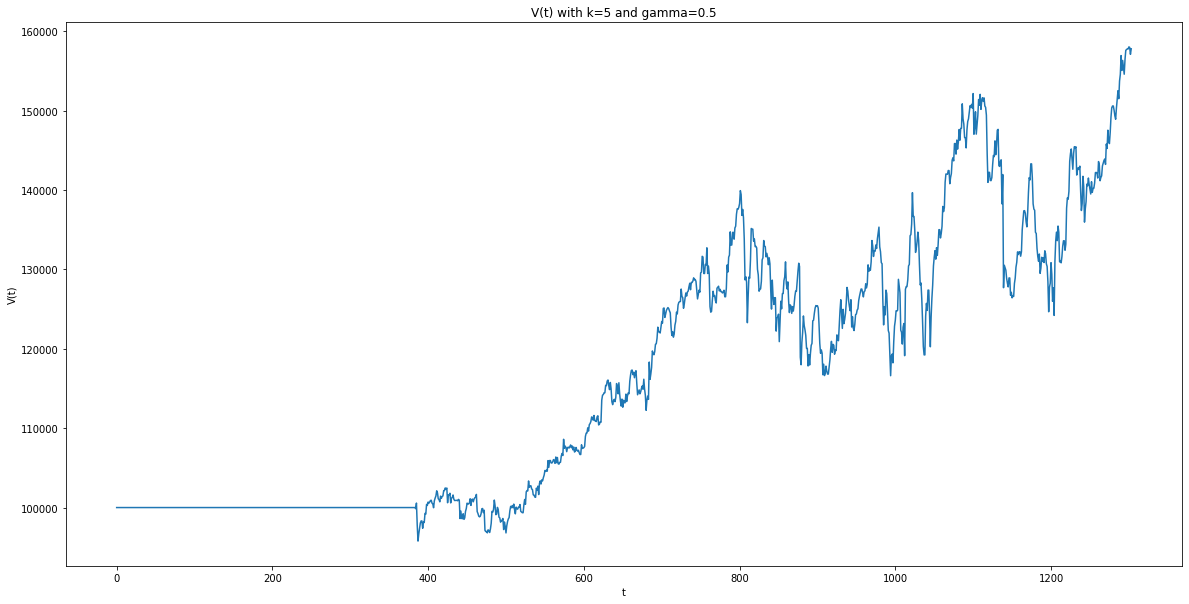

The Final Portfolio Value is 157788.56594312267


In [99]:
# Question 6 (based on testing dataset) - fermi-dirac bayes detector - k=5
V_q6_bayes_5, M_q6_bayes_5, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0, window = 5,interest = 0,\
           x1_detect = x1_bayes, x2_detect = x2_bayes, \
           plot = True)

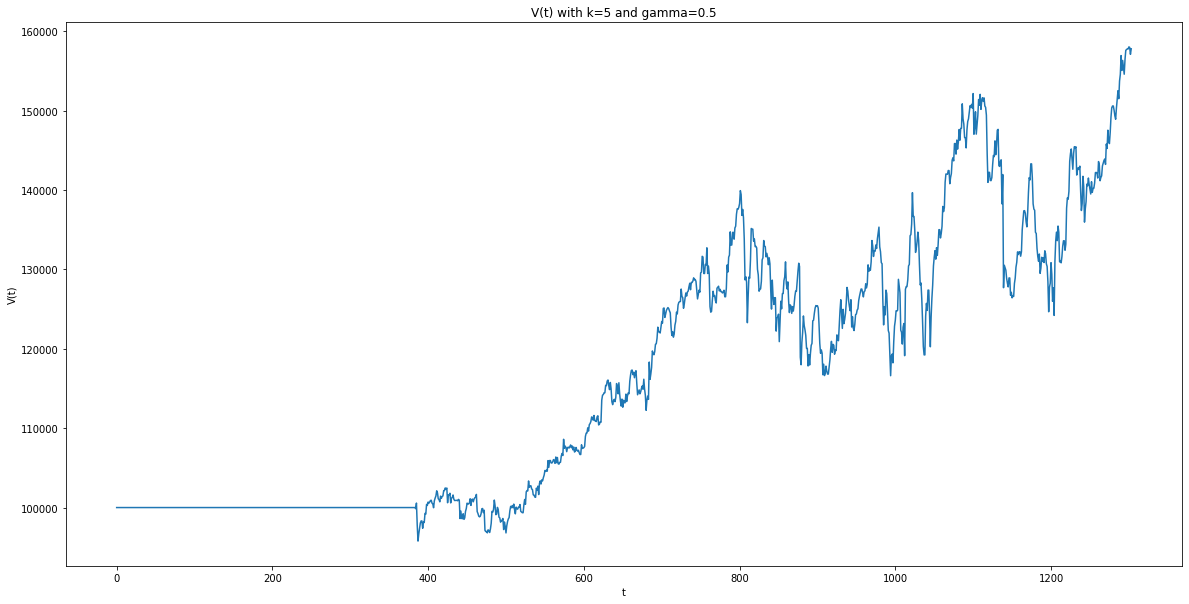

The Final Portfolio Value is 157788.56594312267


In [100]:
# Question 6 (based on testing dataset) - Gaussian bayes detector - k=5
V_q6_gauss_5, M_q6_gauss_5, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0, window = 5,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

# Question 7

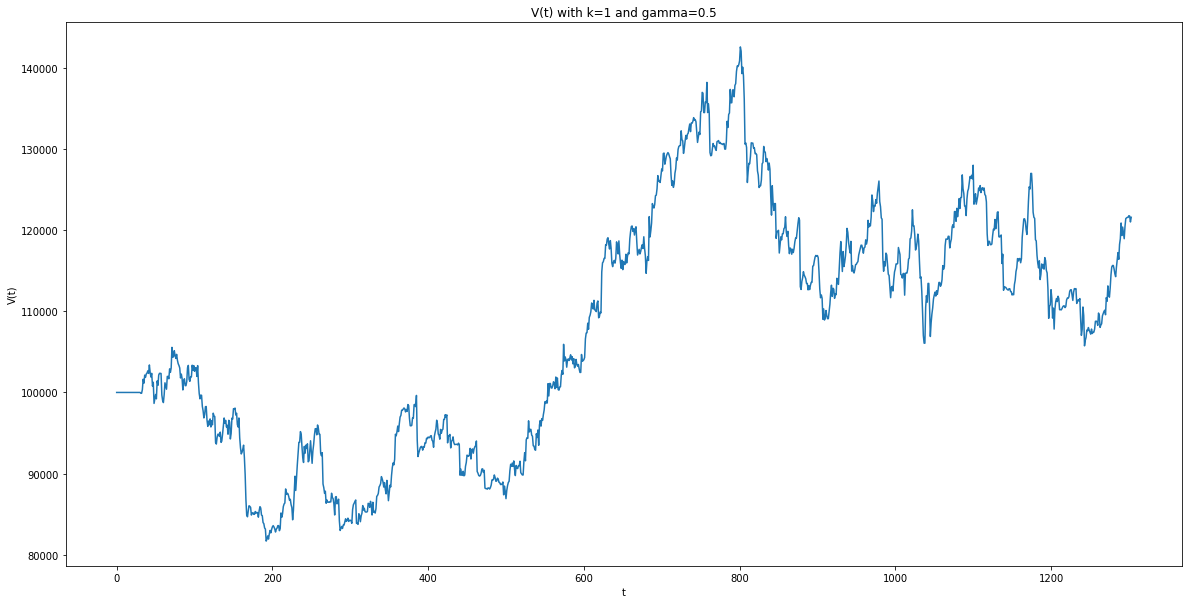

The Final Portfolio Value is 121591.8629287736


In [101]:
# Question 7a
# Plotting the V(t) based on the one-day-rules

V_q7_gauss_1, M_q7_gauss_1, _, record = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.002, window = 1,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

In [102]:
# Trading frequency
np.mean(record) * 100

13.957055214723926

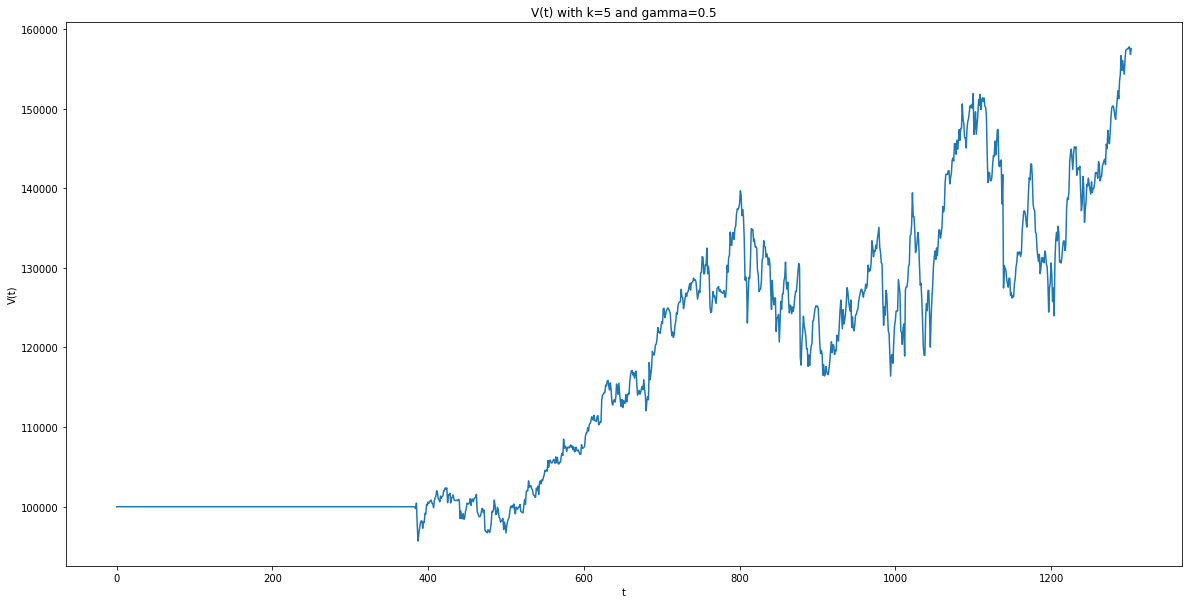

The Final Portfolio Value is 157497.98881123646


In [103]:
# Question 7b
# Plotting the V(t) based on the one-day-rules

V_q7_gauss_5, M_q7_gauss_5, _, record = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.002, window = 5,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

In [104]:
# Trading frequency
np.mean(record) * 100

0.23006134969325154

In [105]:
# Question 7 c 
#Explaination Question

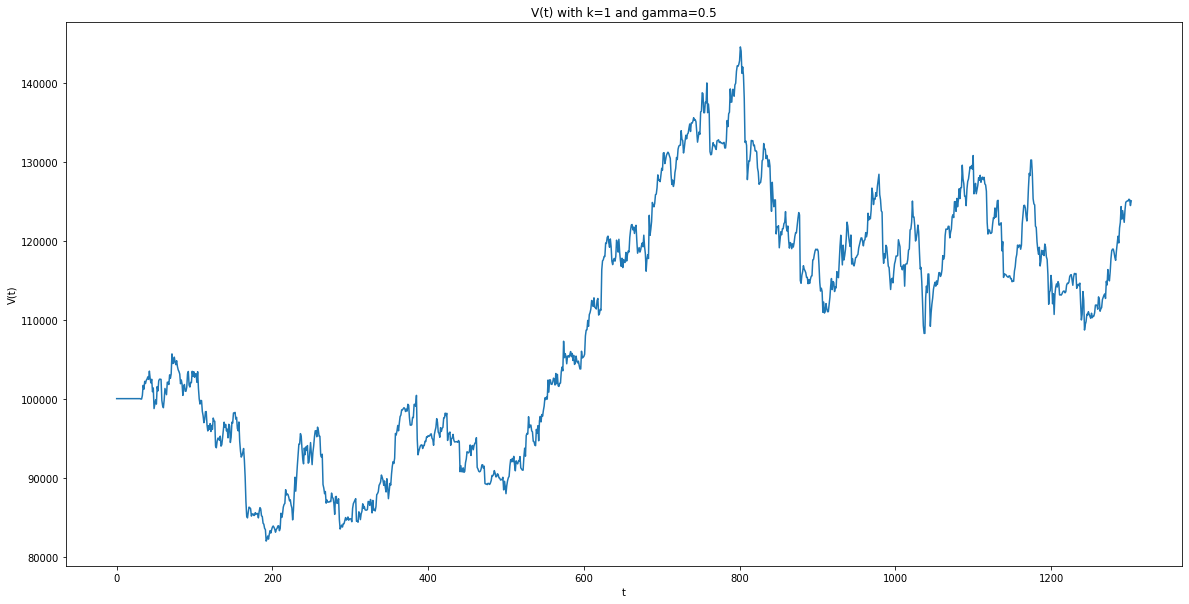

The Final Portfolio Value is 125035.16829100116


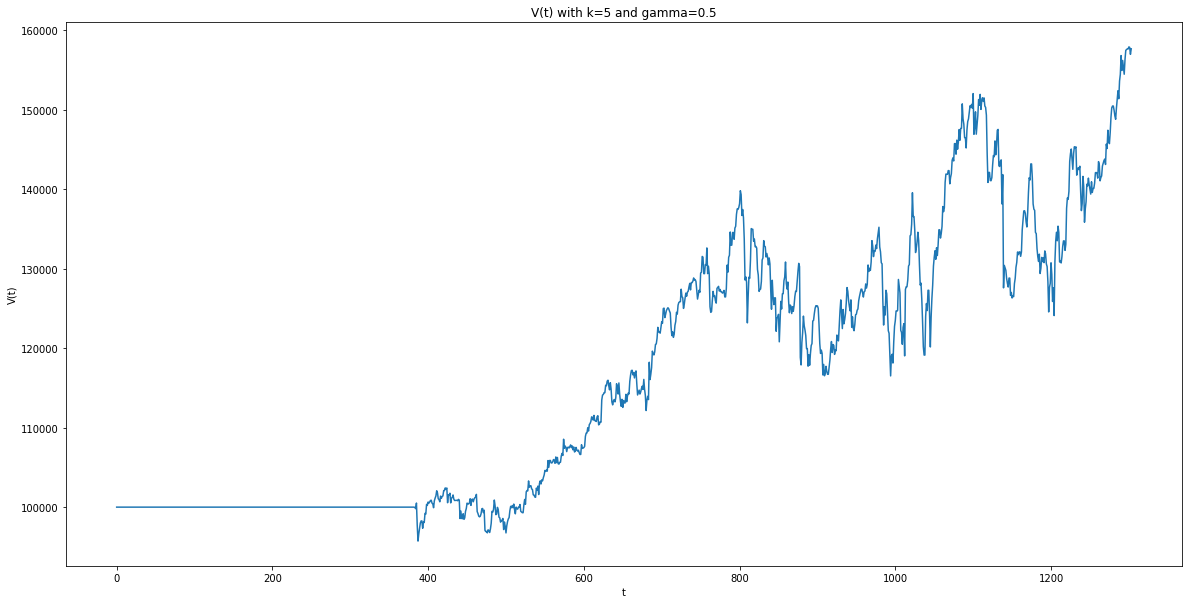

The Final Portfolio Value is 157643.27737717956


In [106]:
# Question 7 d (Extra)
# Redo the 7a&b&c using ξ = 0.1% 
# Plotting the V(t) based on the one-day-rules

V_q7_gauss_1, M_q7_gauss_1, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.001, window = 1,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

V_q7_gauss_1, M_q7_gauss_1, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.001, window = 5,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

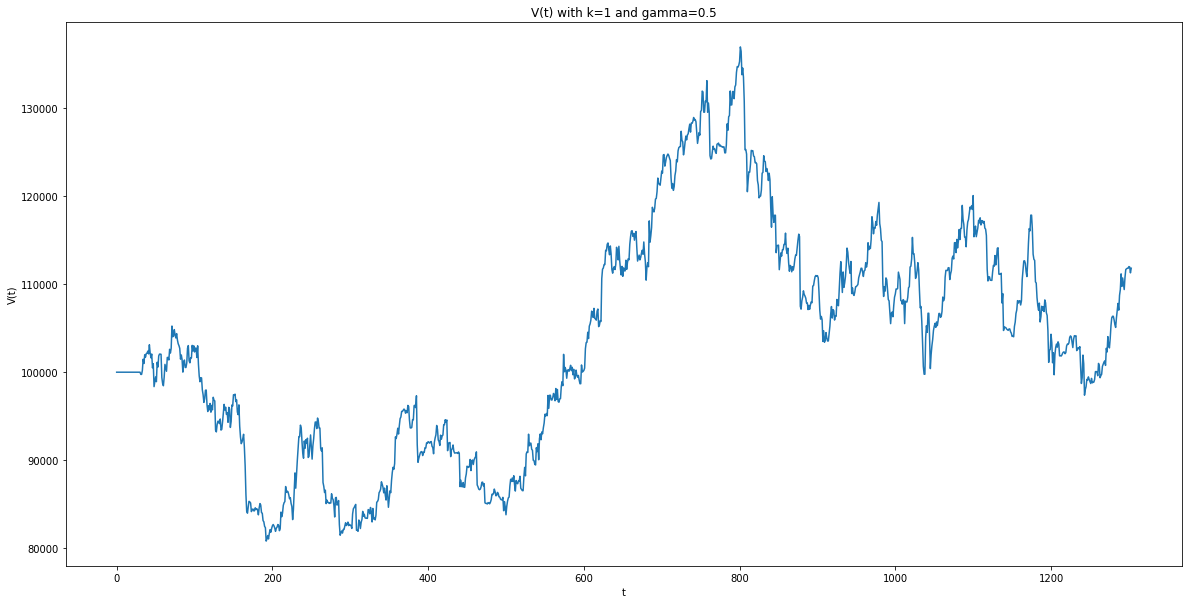

The Final Portfolio Value is 111815.04476229992


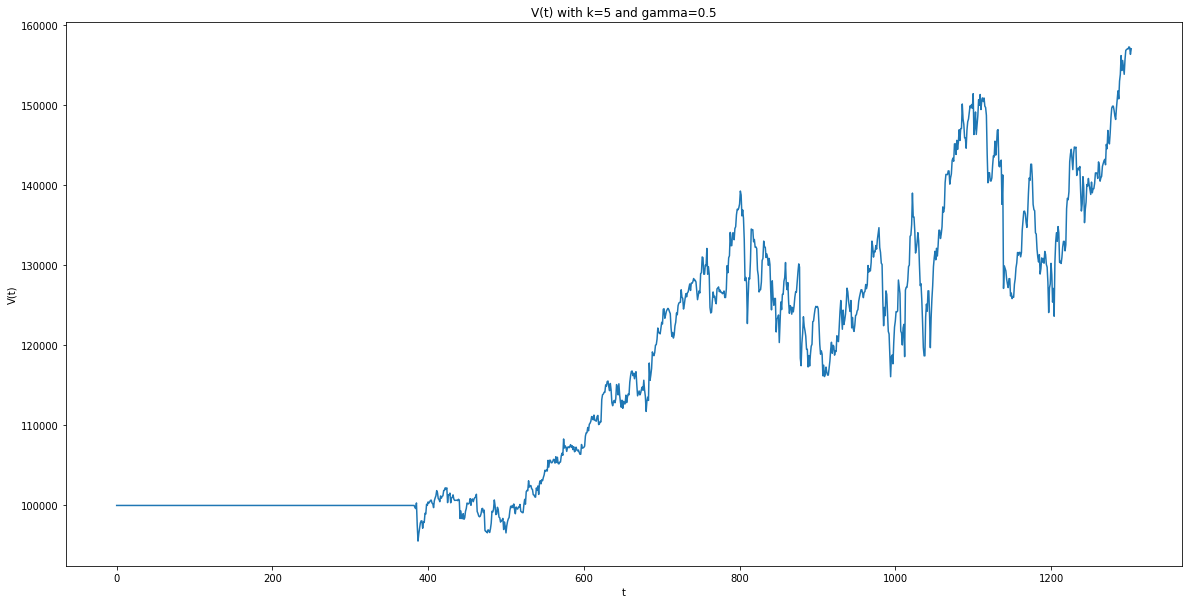

The Final Portfolio Value is 157062.12311340705


In [107]:
# Question 7 d (Extra)
# Redo the 7a&b&c using ξ = 0.5% 
# Plotting the V(t) based on the one-day-rules

V_q7_gauss_5, M_q7_gauss_5, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.005, window = 1,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

# Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.1% 
V_q7_gauss_5, M_q7_gauss_5, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.005, window = 5,interest = 0,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

# Question 8

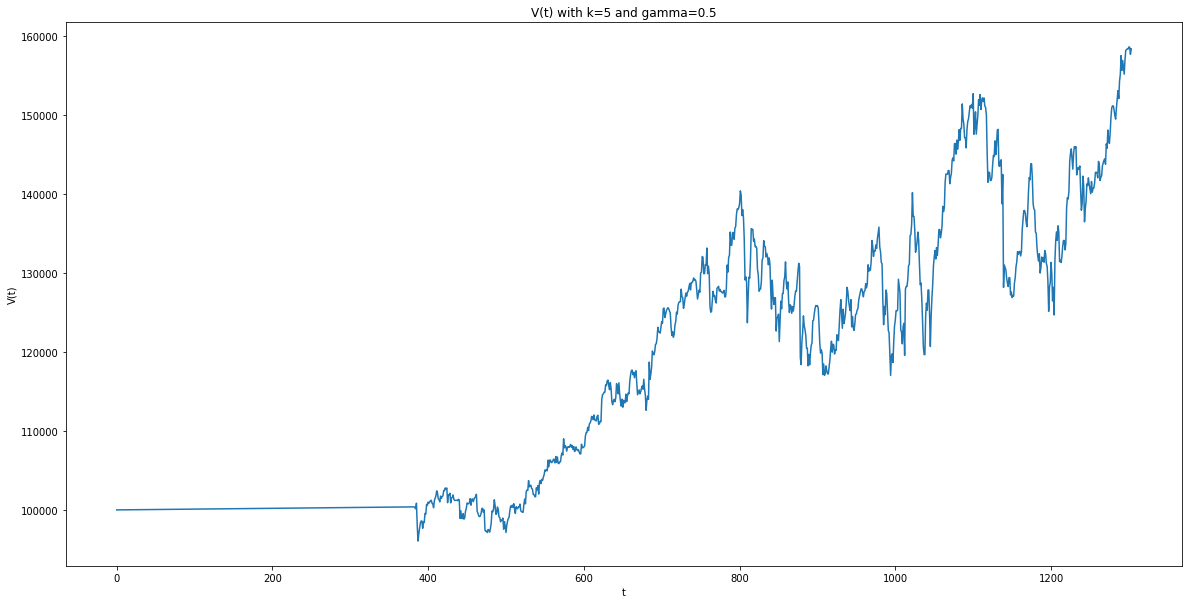

The Final Portfolio Value is 158350.75564380878


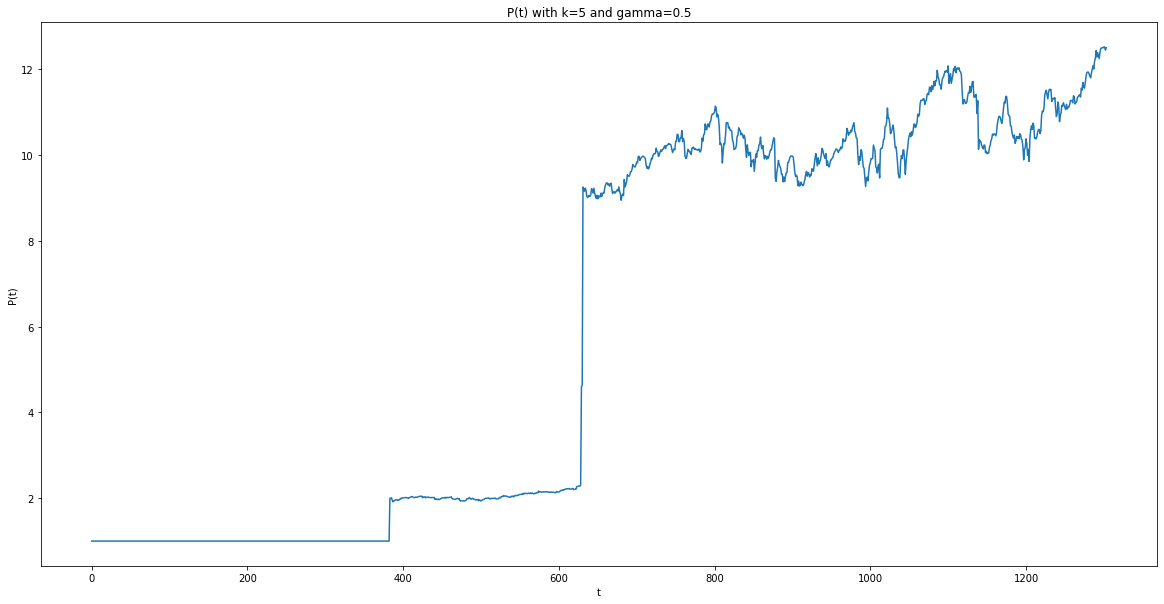

In [108]:
# Question 8 a&b 
# Plotting the V(t), P(t) of the porfolio

V_q8_gauss_5, M_q8_gauss_5, _, record  = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.002, window = 5,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

P_q8_gauss_5 = V_q8_gauss_5/M_q8_gauss_5

plt.plot(P_q8_gauss_5)
plt.xlabel('t')
plt.ylabel('P(t)')
plt.title(f"P(t) with k={5} and gamma={0.5}")
plt.show()

In [109]:
np.where(record == 1)

(array([383, 629, 631]),)

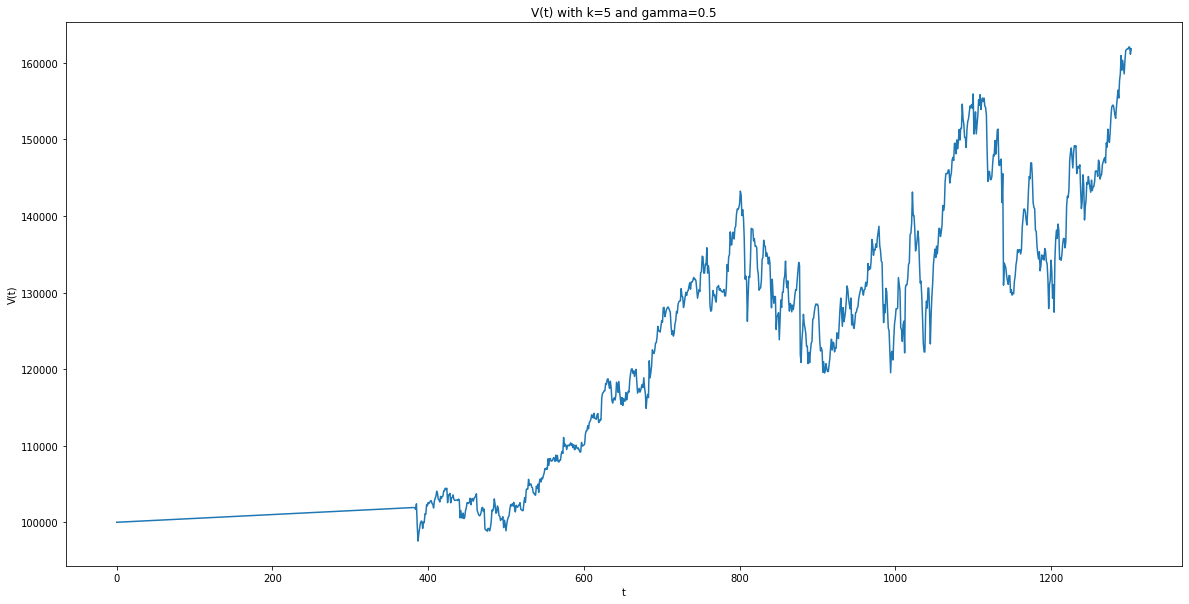

The Final Portfolio Value is 161818.51508951496


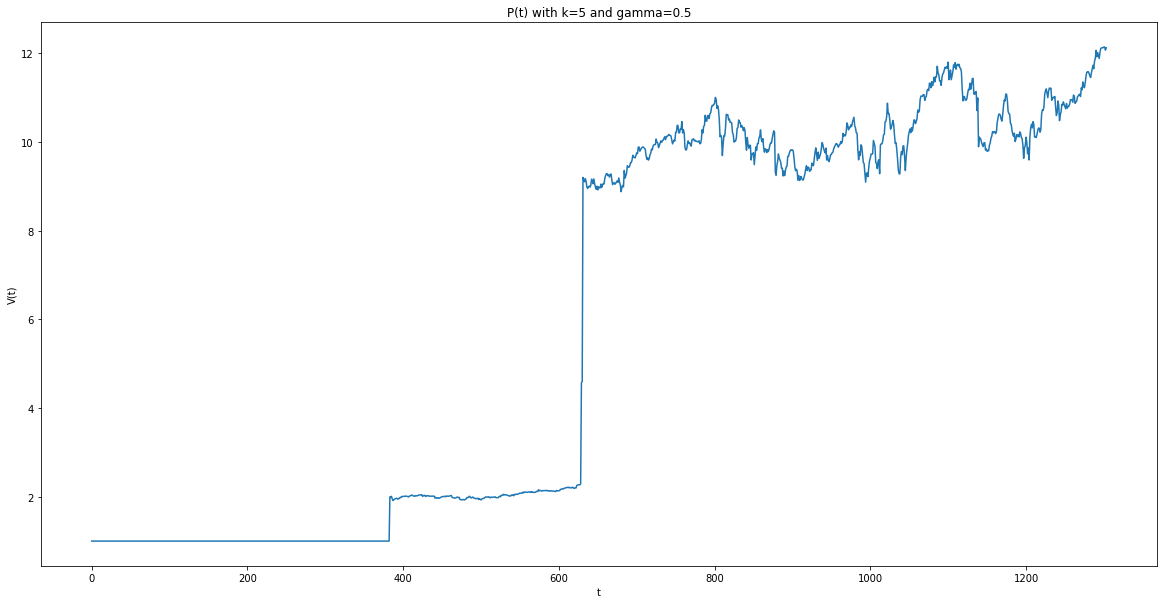

In [110]:
# Question 8c (Extra)
# Redo the 8a&b using r = 0.005%
# Plotting the V(t), P(t) of the porfolio


V_q8_gauss_5, M_q8_gauss_5, _, _  = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.002, window = 5,interest = 5e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

P_q8_gauss_5 = V_q8_gauss_5/M_q8_gauss_5
plt.plot(P_q8_gauss_5)
plt.xlabel('t')
plt.ylabel('V(t)')
plt.title(f"P(t) with k={5} and gamma={0.5}")
plt.show()

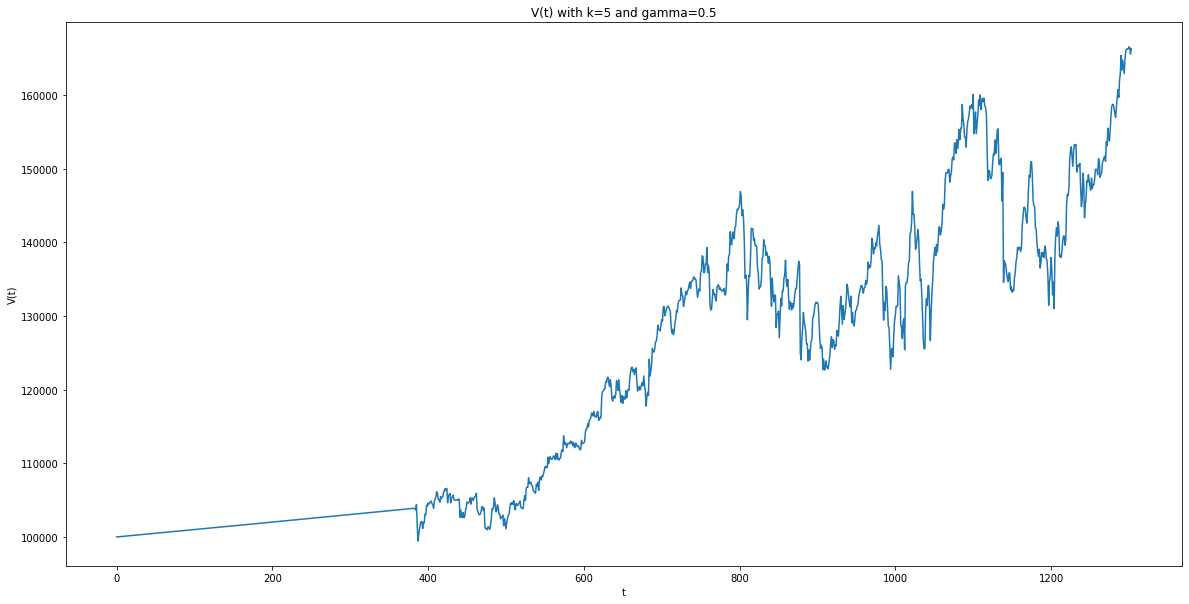

The Final Portfolio Value is 166284.36489640595


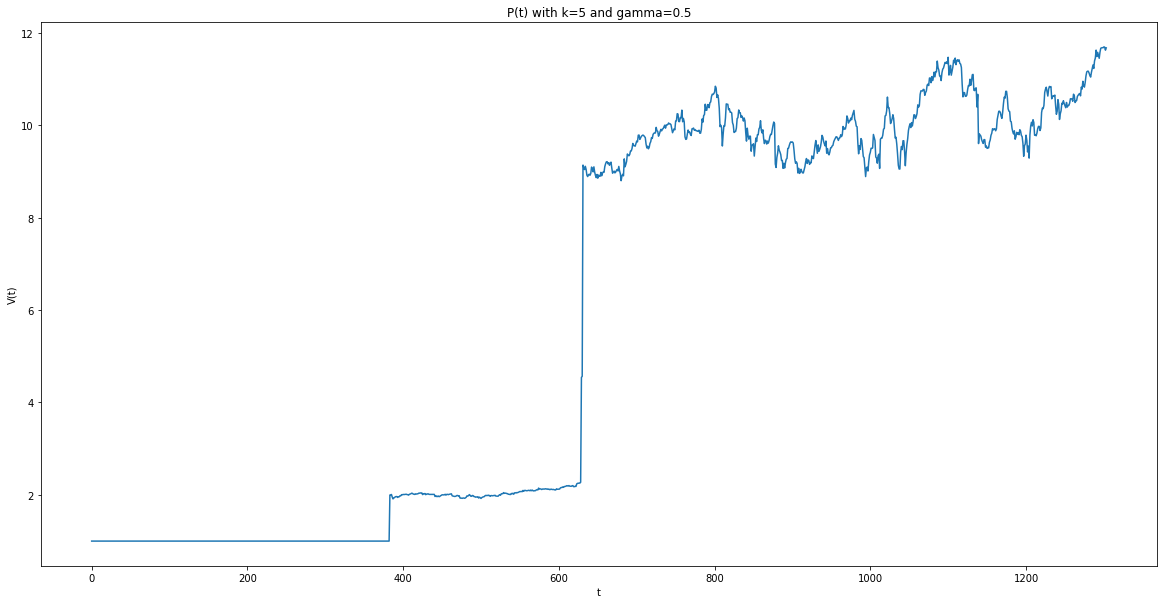

In [111]:
# Question 8c (Extra)
# Redo the 8a&b using r = 0.01%
# Plotting the V(t), P(t) of the porfolio

V_q8_gauss_5, M_q8_gauss_5, _, _  = simulation(alphabet, start_amount = 10e4, gamma = 0.5,\
           tax = 0.002, window = 5,interest = 1e-04,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

P_q8_gauss_5 = V_q8_gauss_5/M_q8_gauss_5
plt.plot(P_q8_gauss_5)
plt.xlabel('t')
plt.ylabel('V(t)')
plt.title(f"P(t) with k={5} and gamma={0.5}")
plt.show()

# Question 9

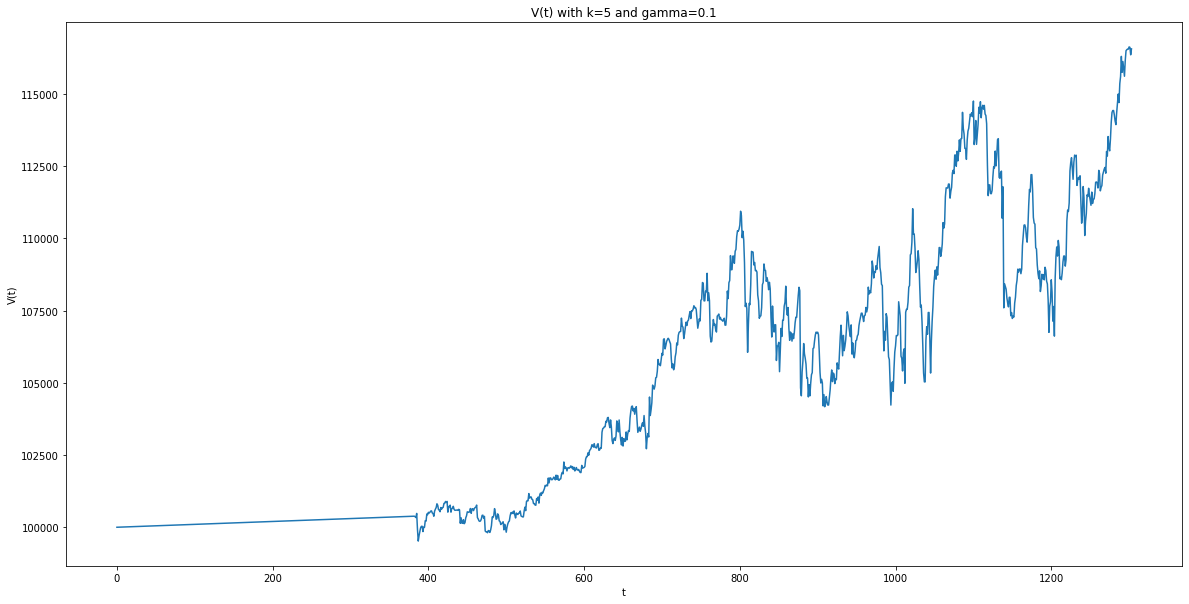

The Final Portfolio Value is 116564.02333211852


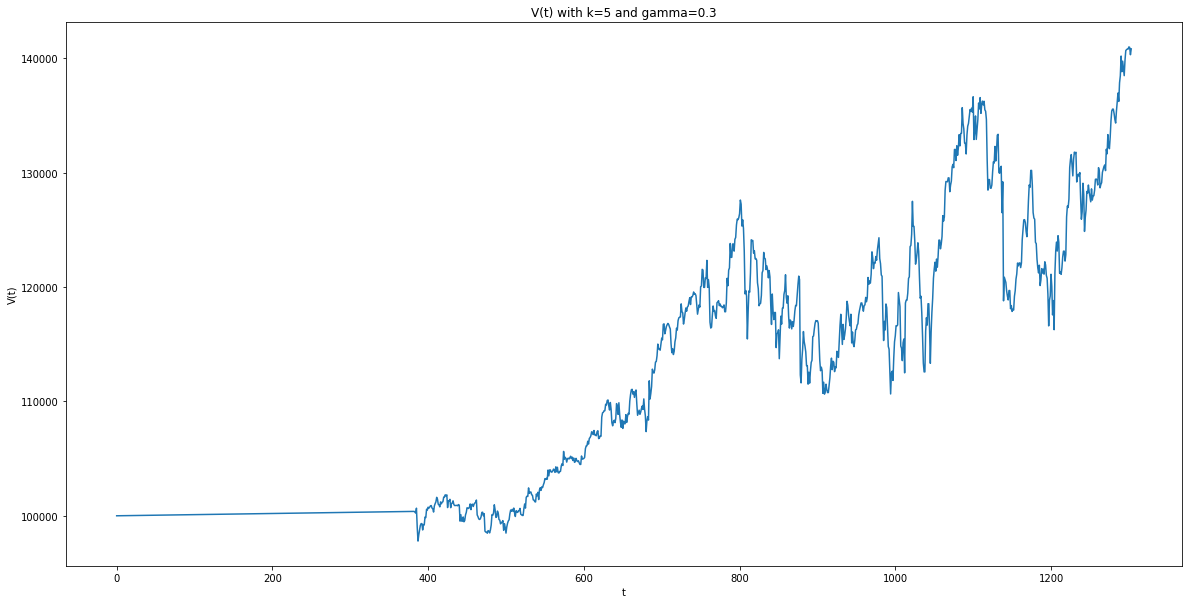

The Final Portfolio Value is 140826.22803232347


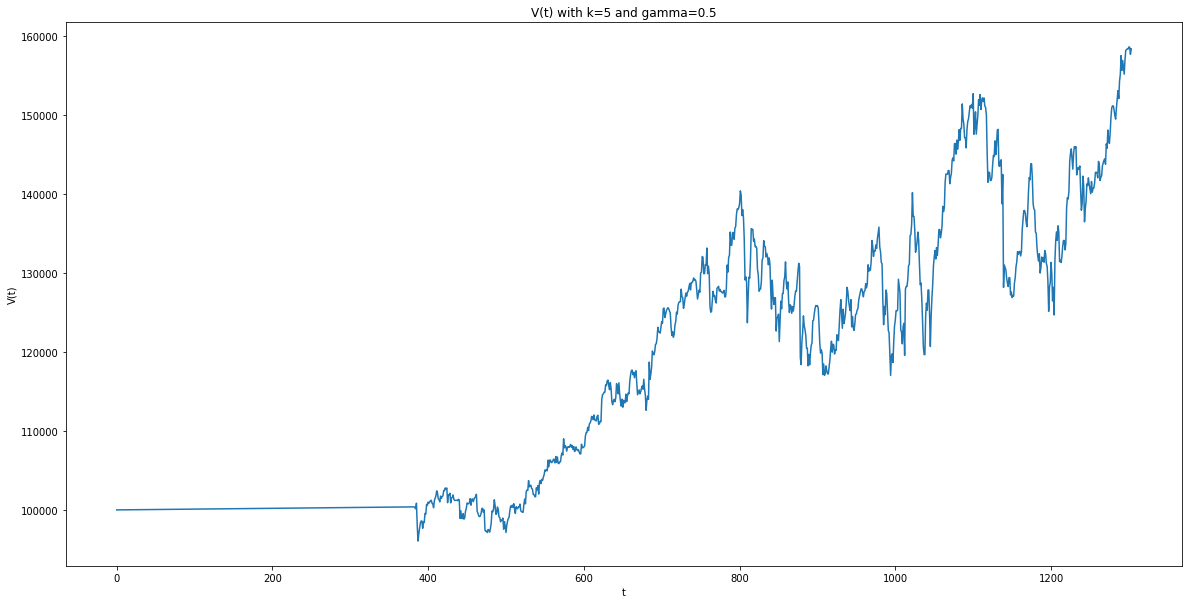

The Final Portfolio Value is 158350.75564380878


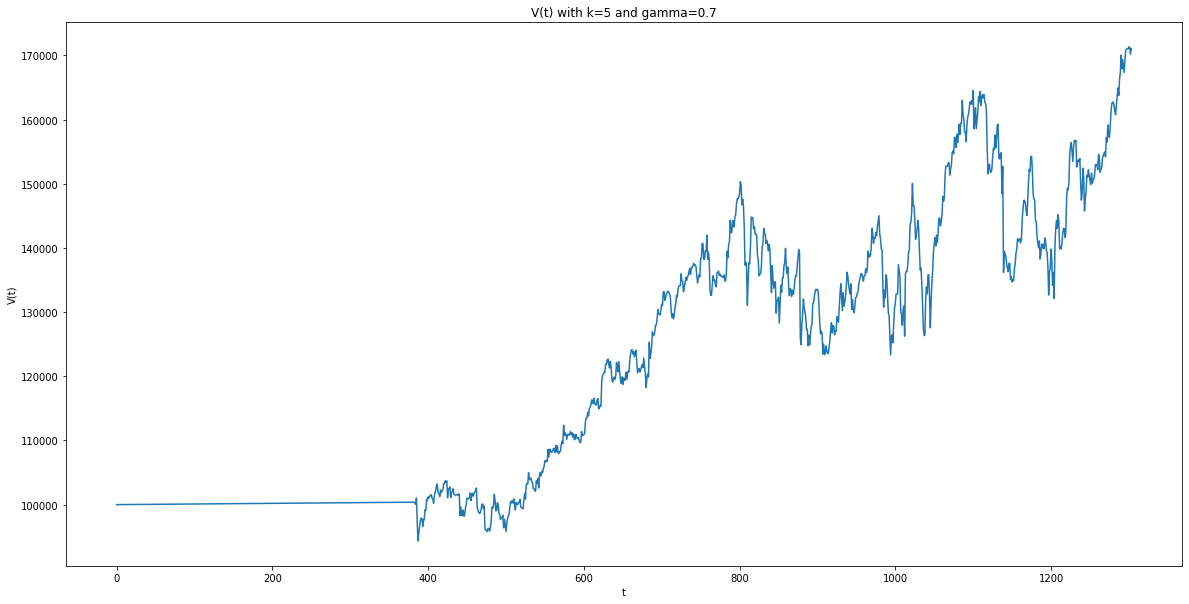

The Final Portfolio Value is 171037.63663944713


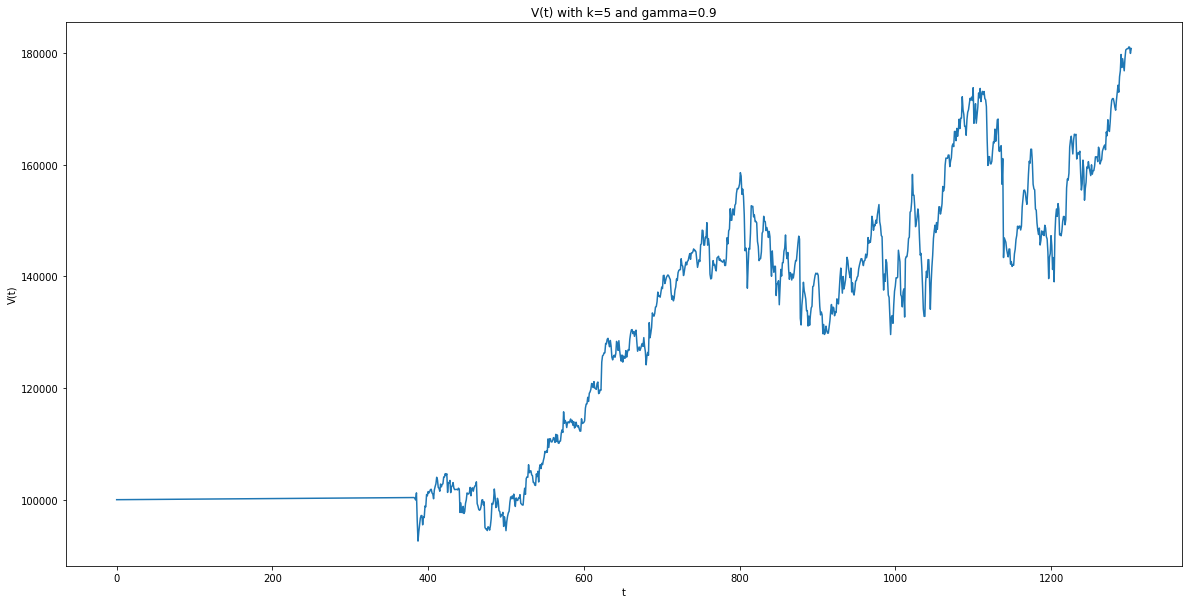

The Final Portfolio Value is 180786.90149211124


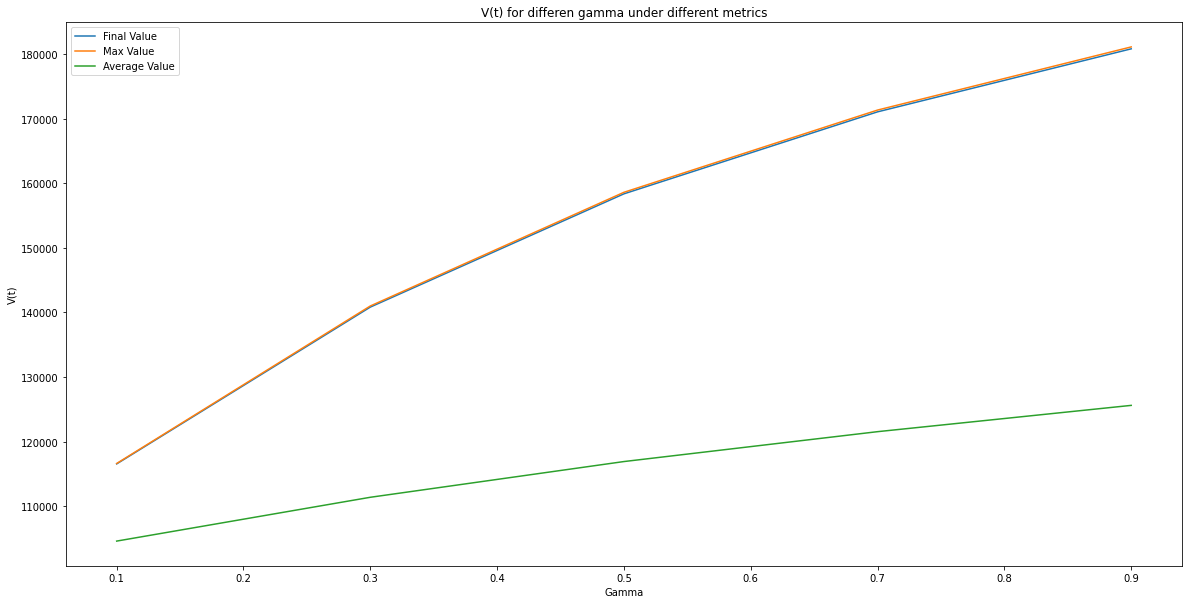

In [112]:
# Question 9 a
# Plotting the V(t) with different gamma values
# Question 9 b
# Plotting the mean V(t), Final V(t), max V(t) against different gamma values

final_value_list = []
max_value_list = []
average_value_list = []
gamma_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for gamma in gamma_list:
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V, M, _, _  = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = 5,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = True)
    final_value_list.append(V[-1])
    max_value_list.append(V.max())
    average_value_list.append(V.mean())


plt.plot(gamma_list, final_value_list,)
plt.plot(gamma_list, max_value_list,)
plt.plot(gamma_list, average_value_list,)
plt.xlabel('Gamma')
plt.ylabel('V(t)')
plt.legend(['Final Value', 'Max Value' ,'Average Value'])
plt.title(f"V(t) for differen gamma under different metrics")
plt.show()

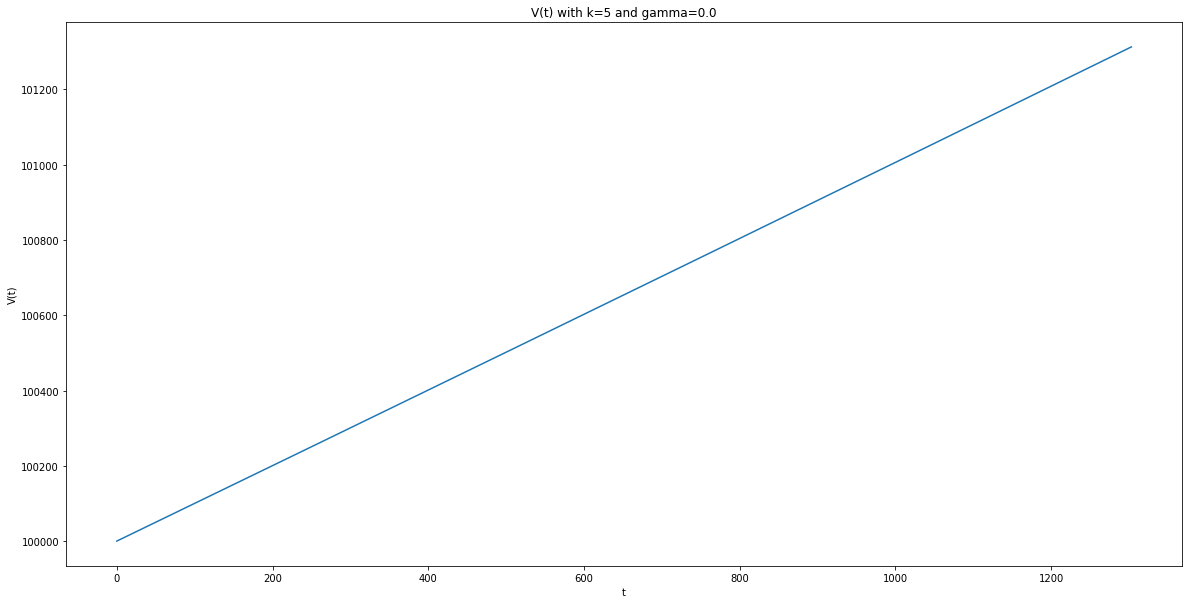

The Final Portfolio Value is 101312.53255097363


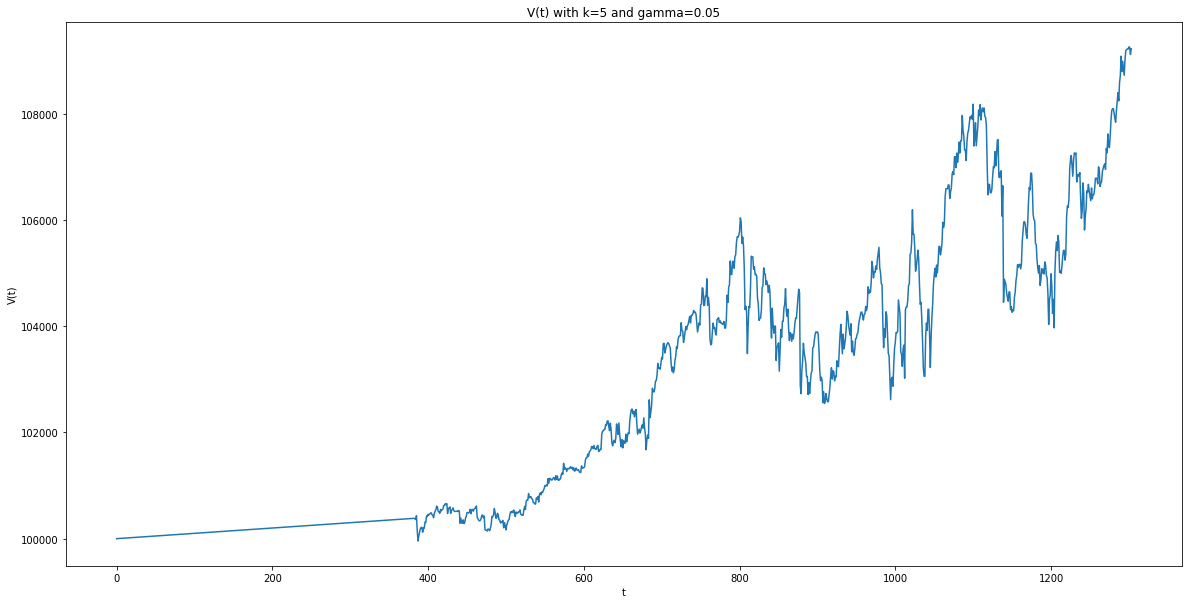

The Final Portfolio Value is 109223.05029091513


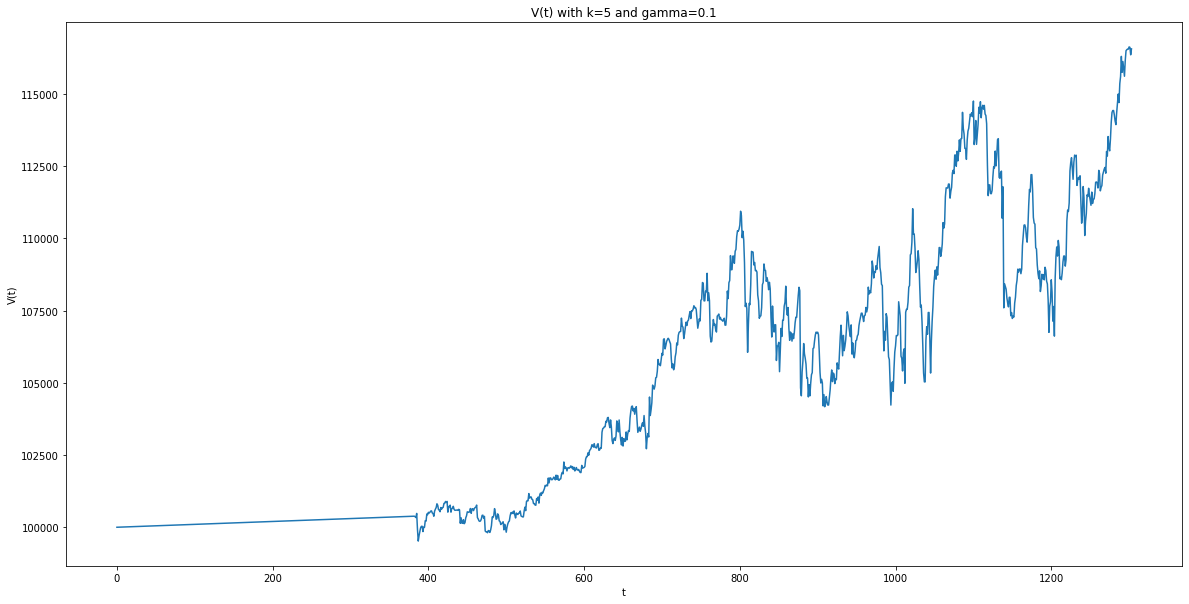

The Final Portfolio Value is 116564.02333211852


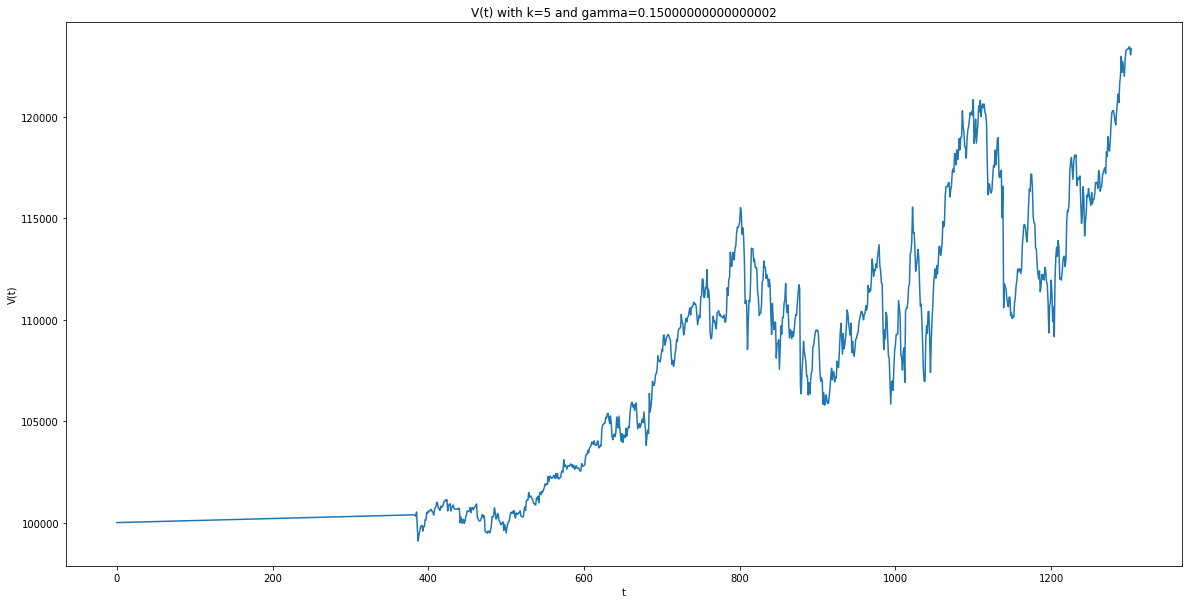

The Final Portfolio Value is 123365.1396507225


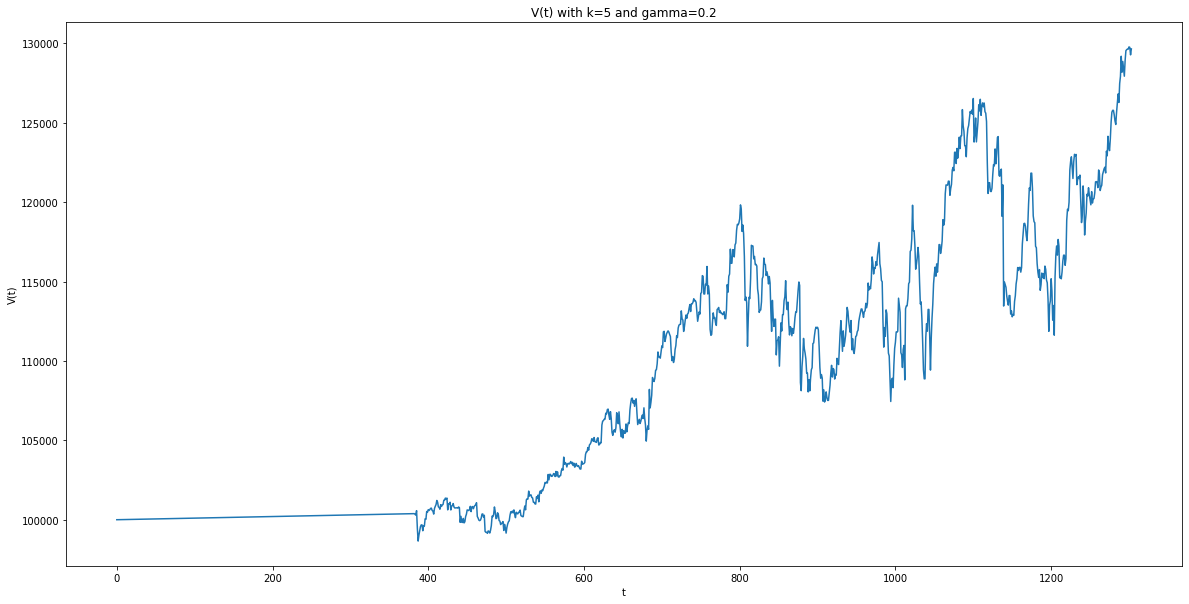

The Final Portfolio Value is 129656.0872228656


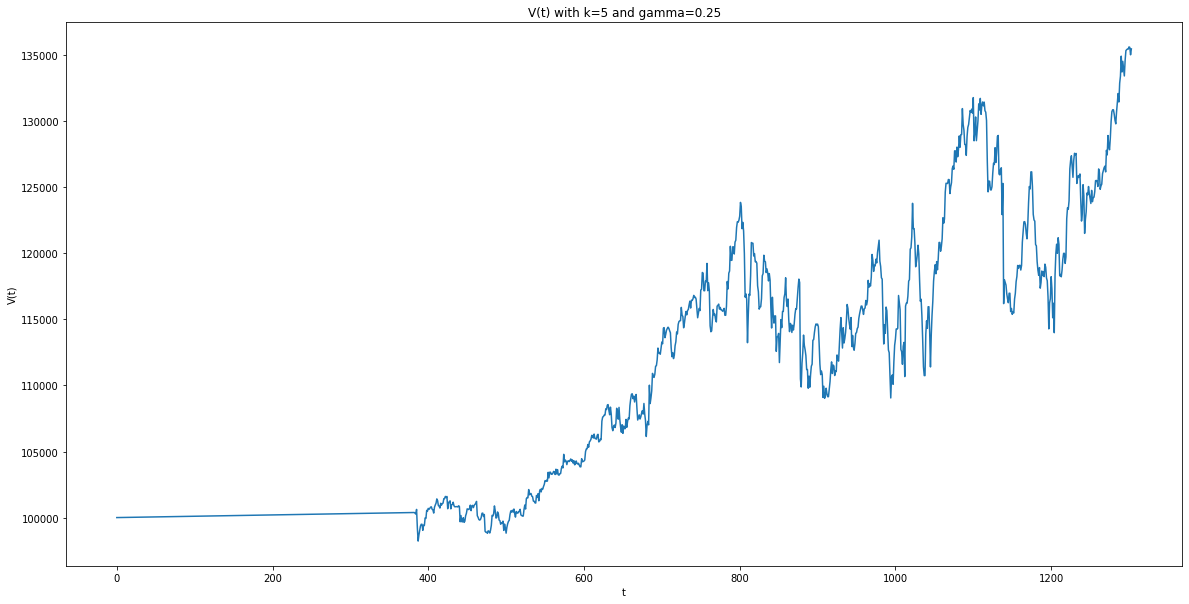

The Final Portfolio Value is 135466.55402468628


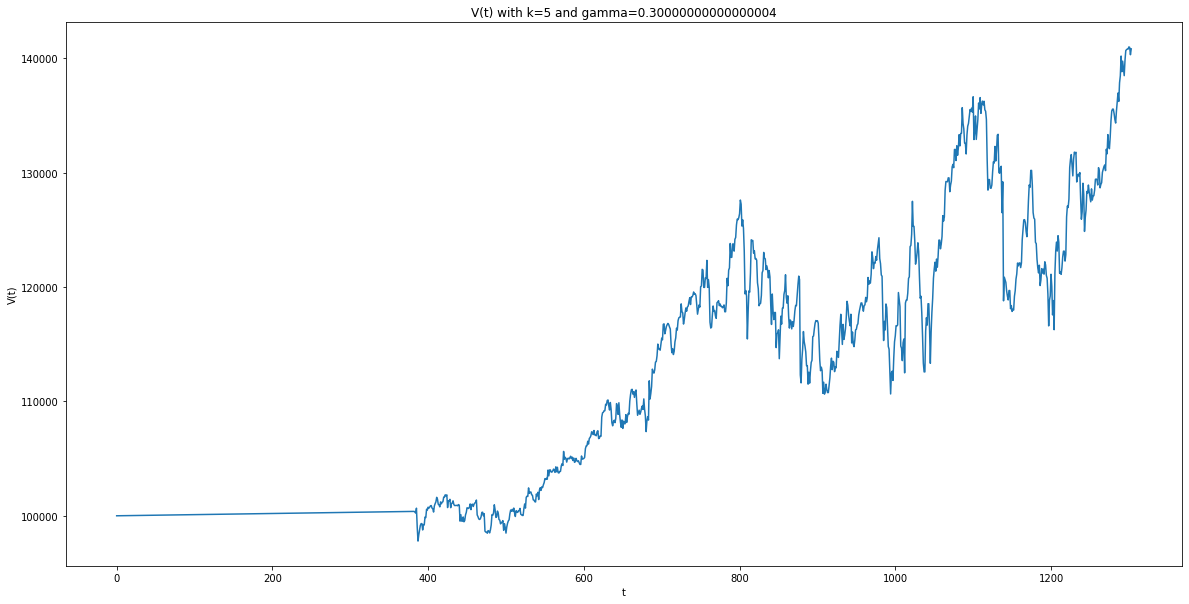

The Final Portfolio Value is 140826.22803232347


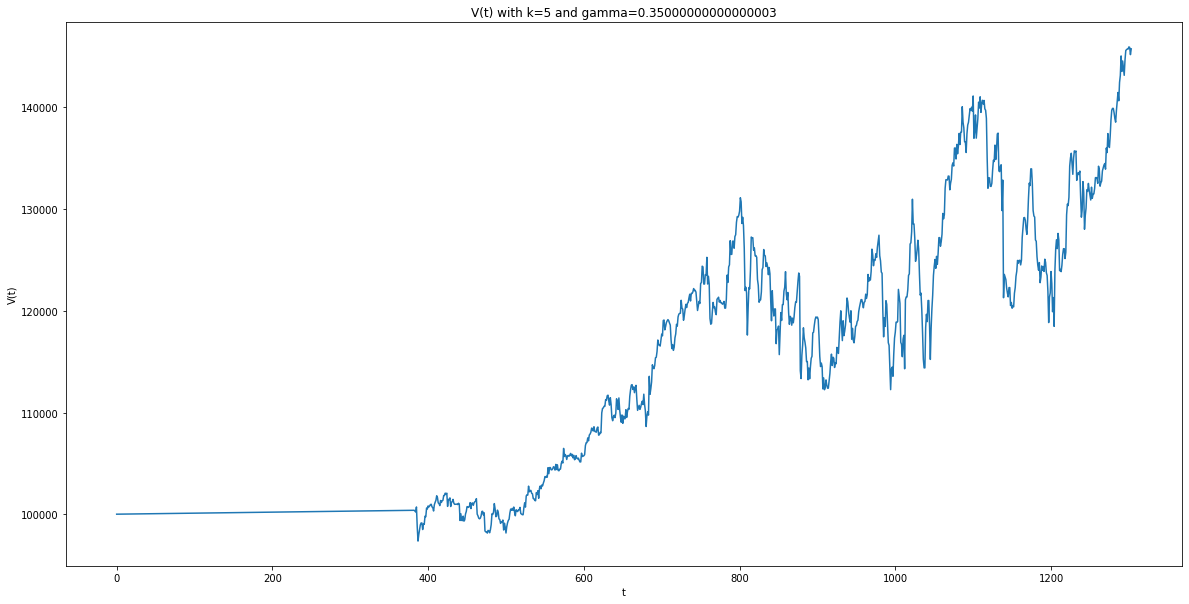

The Final Portfolio Value is 145764.7972219157


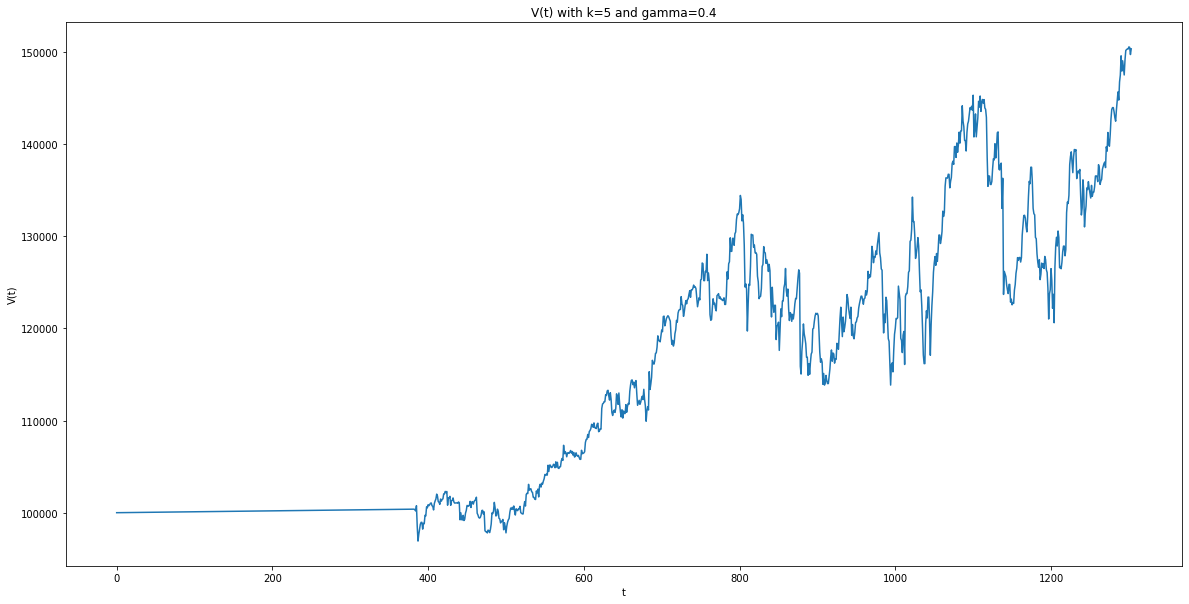

The Final Portfolio Value is 150311.94956960148


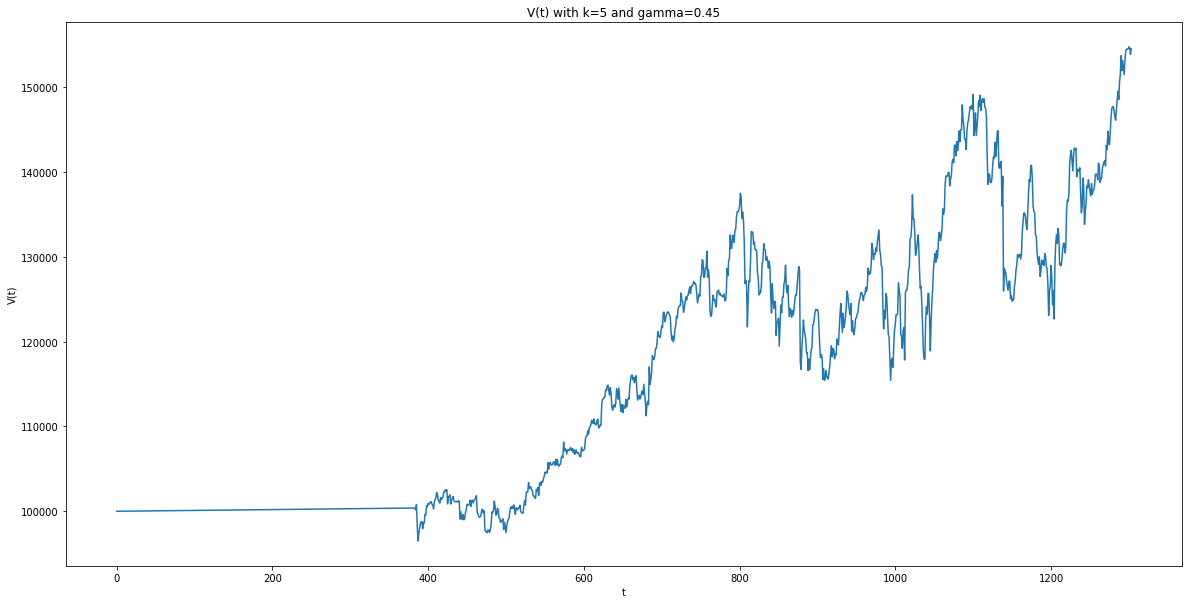

The Final Portfolio Value is 154497.3730515196


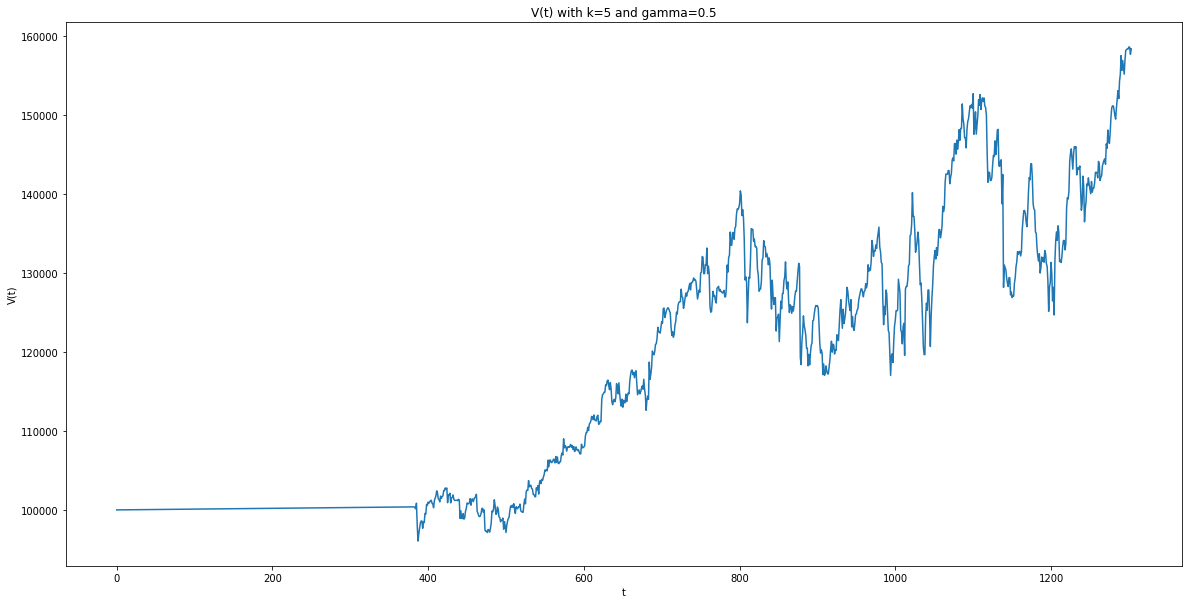

The Final Portfolio Value is 158350.75564380878


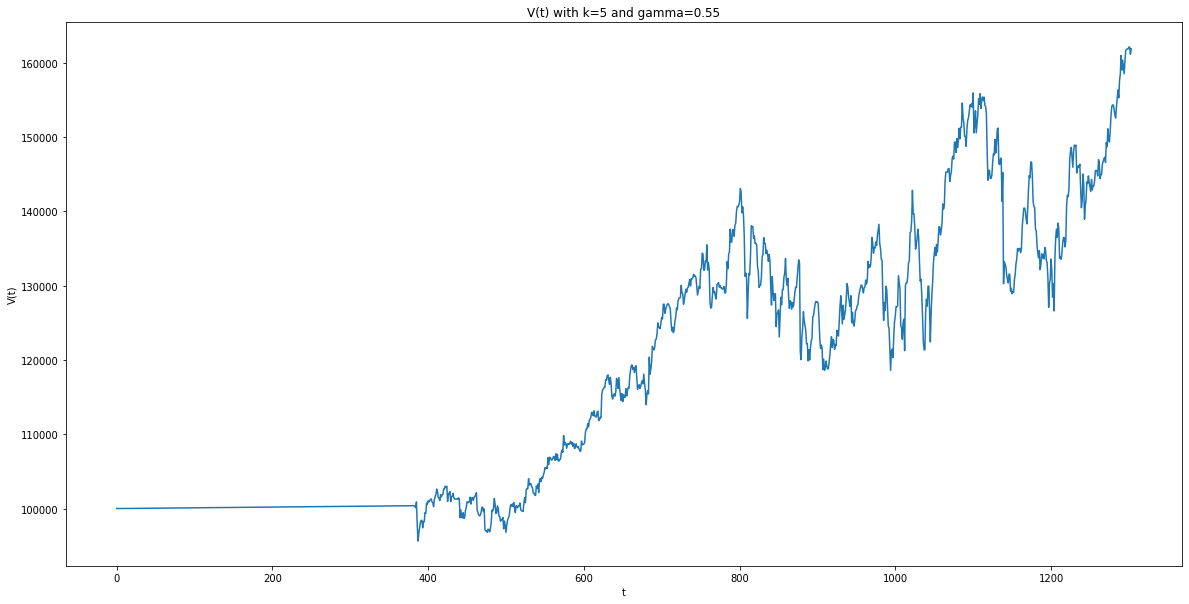

The Final Portfolio Value is 161901.78532260744


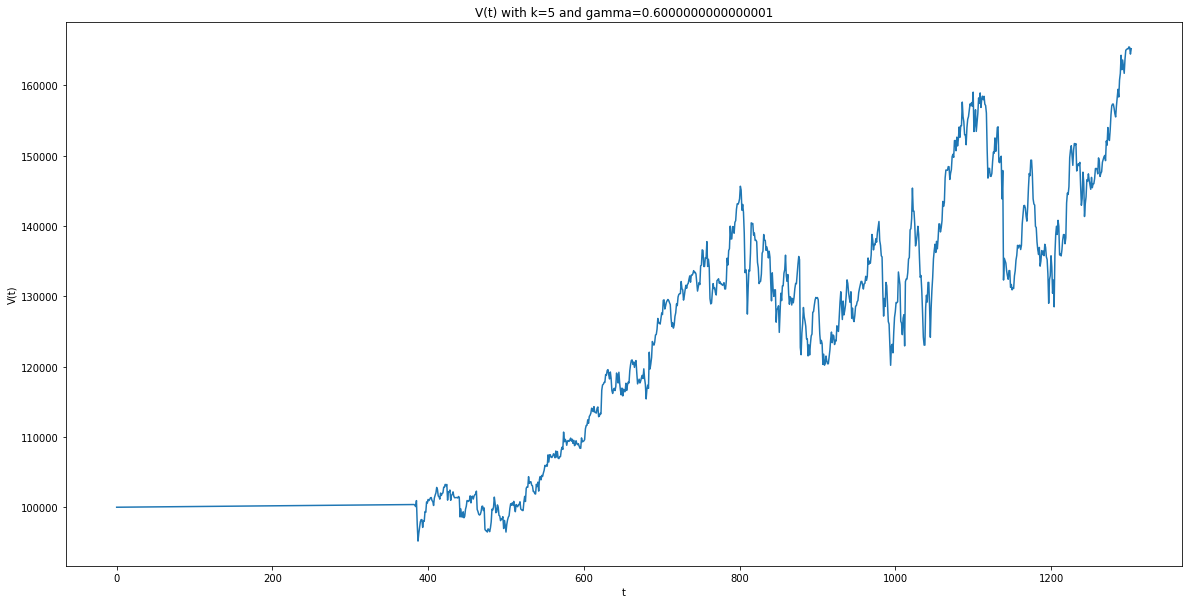

The Final Portfolio Value is 165180.1500640543


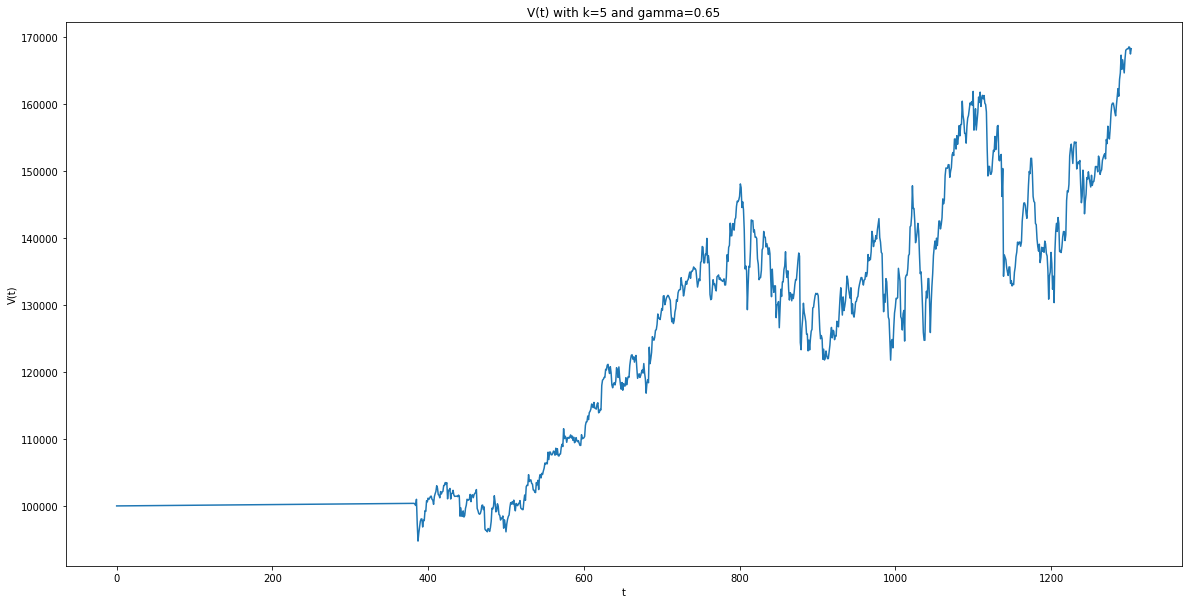

The Final Portfolio Value is 168215.53784428796


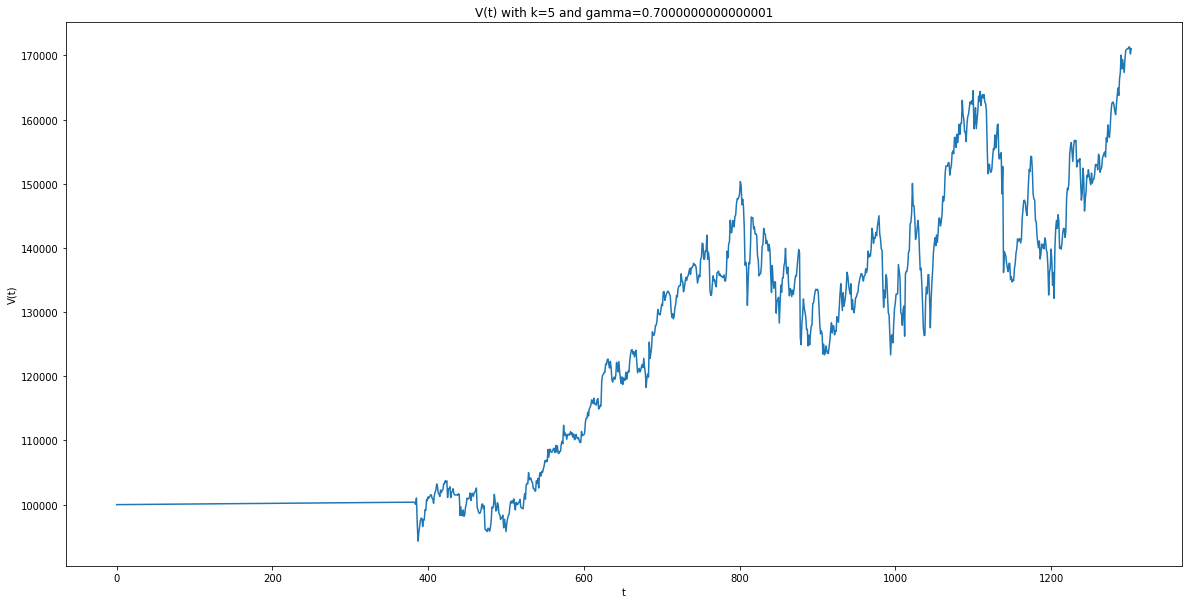

The Final Portfolio Value is 171037.6366394471


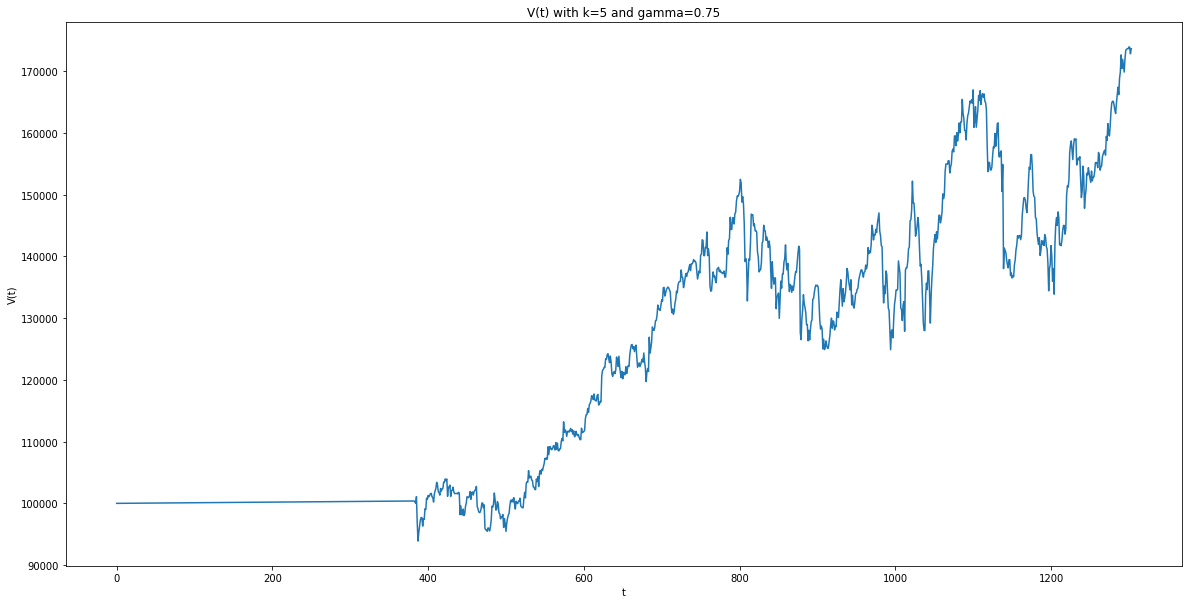

The Final Portfolio Value is 173676.1344256704


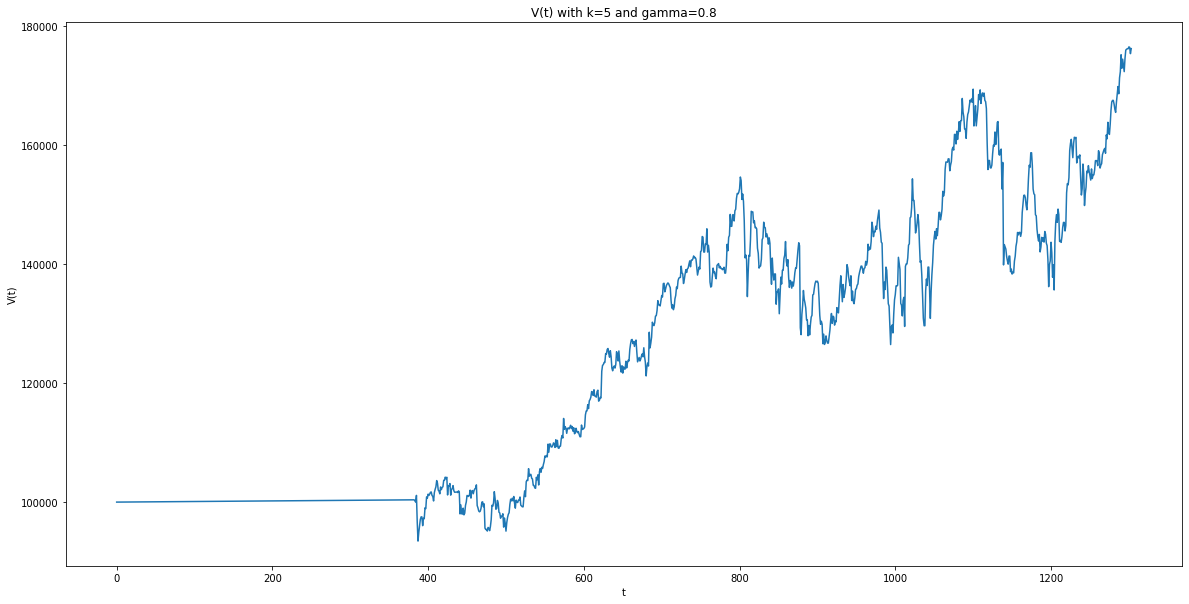

The Final Portfolio Value is 176160.71917909637


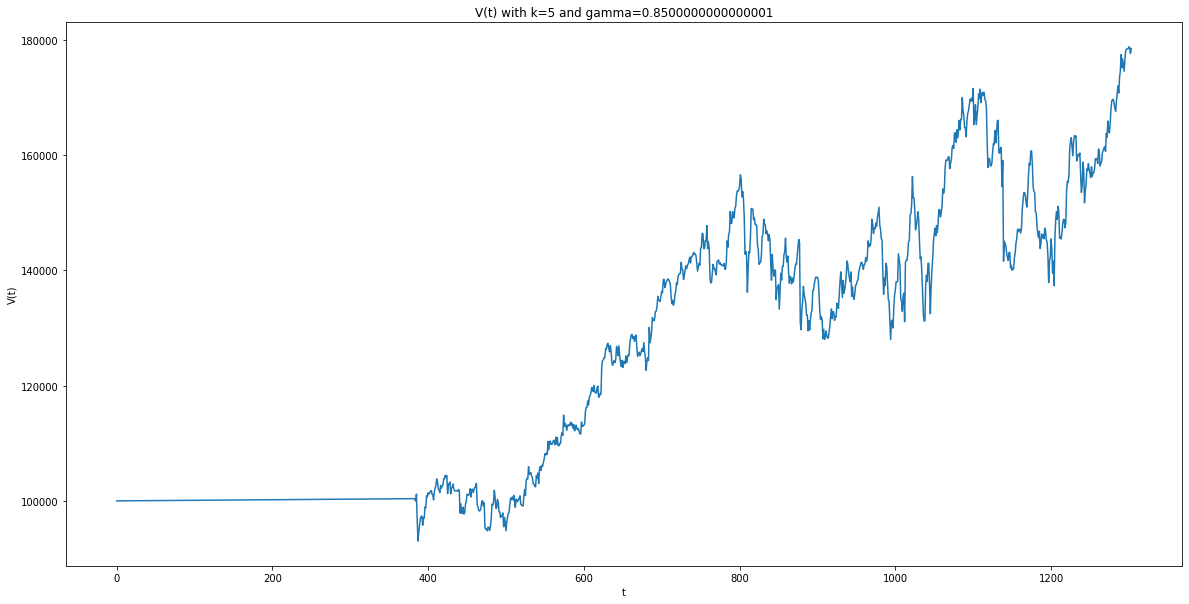

The Final Portfolio Value is 178521.07887586384


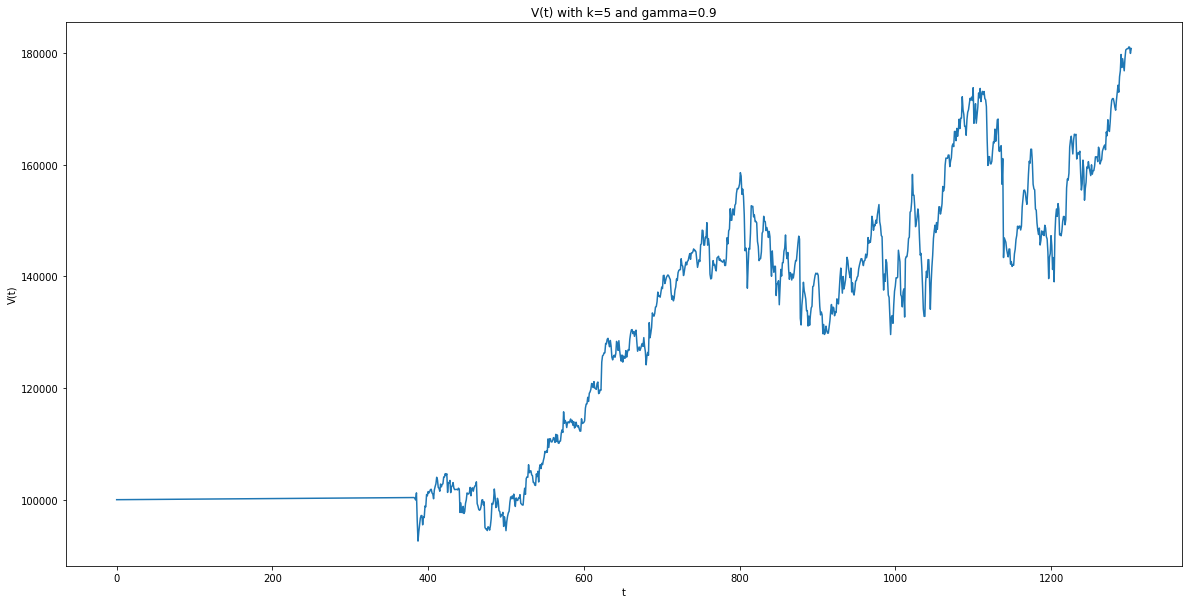

The Final Portfolio Value is 180786.90149211124


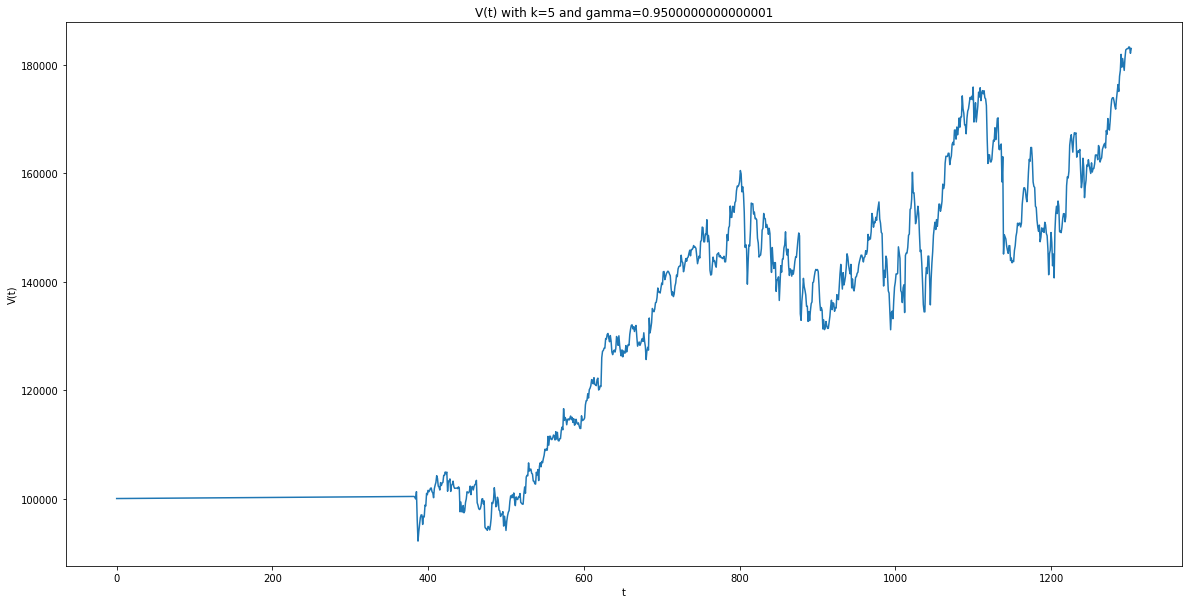

The Final Portfolio Value is 182987.87500397736


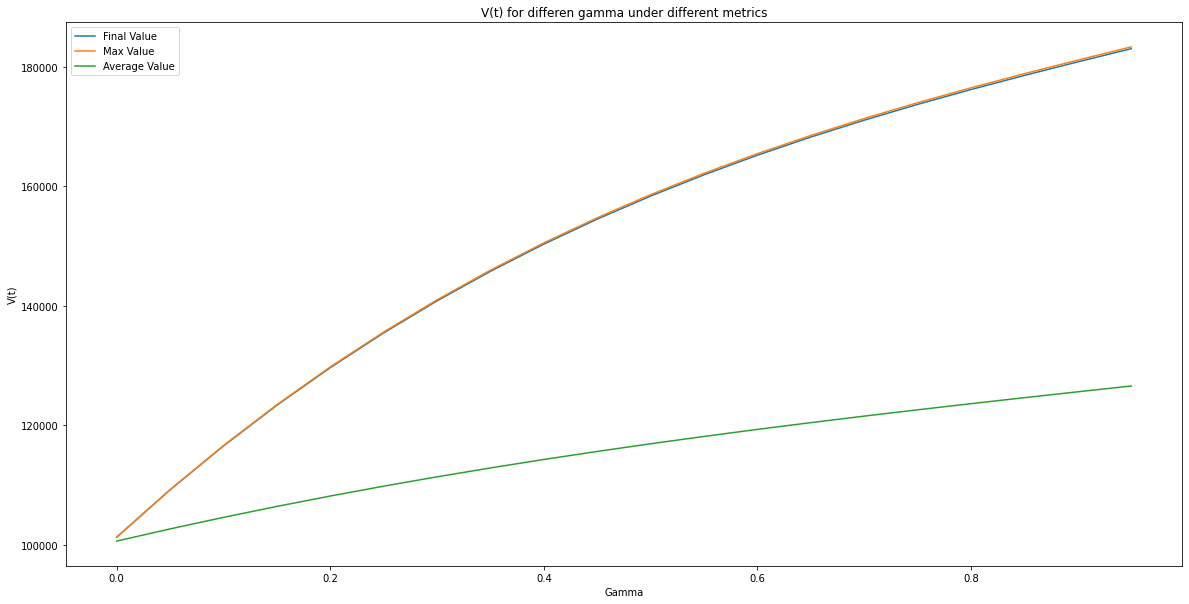

In [113]:
# Question 9 c (Redo 9a&b with 15 more samples)
# Plotting the V(t) with different gamma values
# Plotting the mean V(t), Final V(t), max V(t) against different gamma values

final_value_list = []
max_value_list = []
average_value_list = []
gamma_list = np.arange(0, 1, 0.05)

for gamma in gamma_list:
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V, M, _, _  = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = 5,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = True)
    final_value_list.append(V[-1])
    max_value_list.append(V.max())
    average_value_list.append(V.mean())


plt.plot(gamma_list, final_value_list,)
plt.plot(gamma_list, max_value_list,)
plt.plot(gamma_list, average_value_list,)
plt.xlabel('Gamma')
plt.ylabel('V(t)')
plt.legend(['Final Value', 'Max Value' ,'Average Value'])
plt.title(f"V(t) for differen gamma under different metrics")
plt.show()

# Question 10

In [114]:
# Question 10a
# Trade with γ {0.1, 0.3, 0.5, 0.7, 0.9}, then compute value Vγ(t) and worth Wγ(t).

for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5 , _  = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = 5,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    W_q10_gauss_5 = (M_q10_gauss_5/testing_prices) + N_q10_gauss_5
    print(f"Gamma = {gamma}")
    print(f"V(t) {V_q10_gauss_5}")
    print(f"W(t) {W_q10_gauss_5}")
    print("---------------------------")

Gamma = 0.1
V(t) [100001.         100002.00001    100003.00003    ... 116617.61350839
 116358.03395984 116564.02333212]
W(t) [2442.62335125 2465.53254463 2512.63819171 ... 1365.22610054 1370.53043533
 1366.35826201]
---------------------------
Gamma = 0.3
V(t) [100001.         100002.00001    100003.00003    ... 140962.30907008
 140316.07896259 140826.22803232]
W(t) [2442.62335125 2465.53254463 2512.63819171 ... 1650.22604858 1652.72177812
 1650.7587391 ]
---------------------------
Gamma = 0.5
V(t) [100001.         100002.00001    100003.00003    ... 158538.35297931
 157650.45853763 158350.75564381]
W(t) [2442.62335125 2465.53254463 2512.63819171 ... 1855.98633785 1856.89586028
 1856.18046705]
---------------------------
Gamma = 0.7
V(t) [100001.         100002.00001    100003.00003    ... 171254.593323
 170228.7486443  171037.63663945]
W(t) [2442.62335125 2465.53254463 2512.63819171 ... 2004.85358608 2005.05004292
 2004.89551799]
---------------------------
Gamma = 0.9
V(t) [100001. 

when k=5 and gamma=0.1, W(t) and V(t) dont always have the same sign


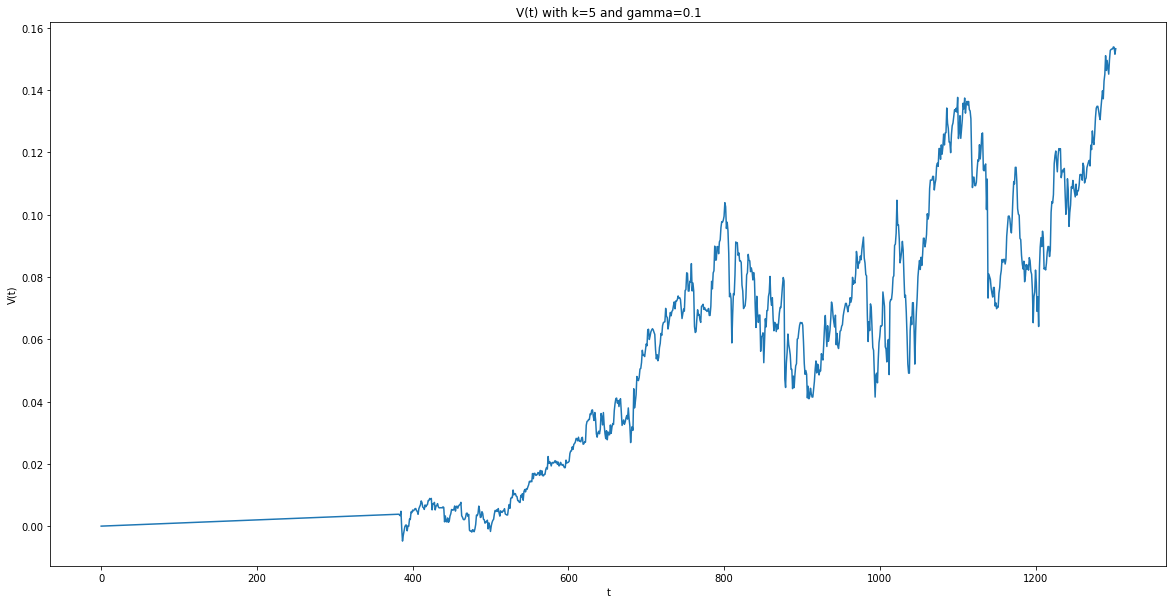

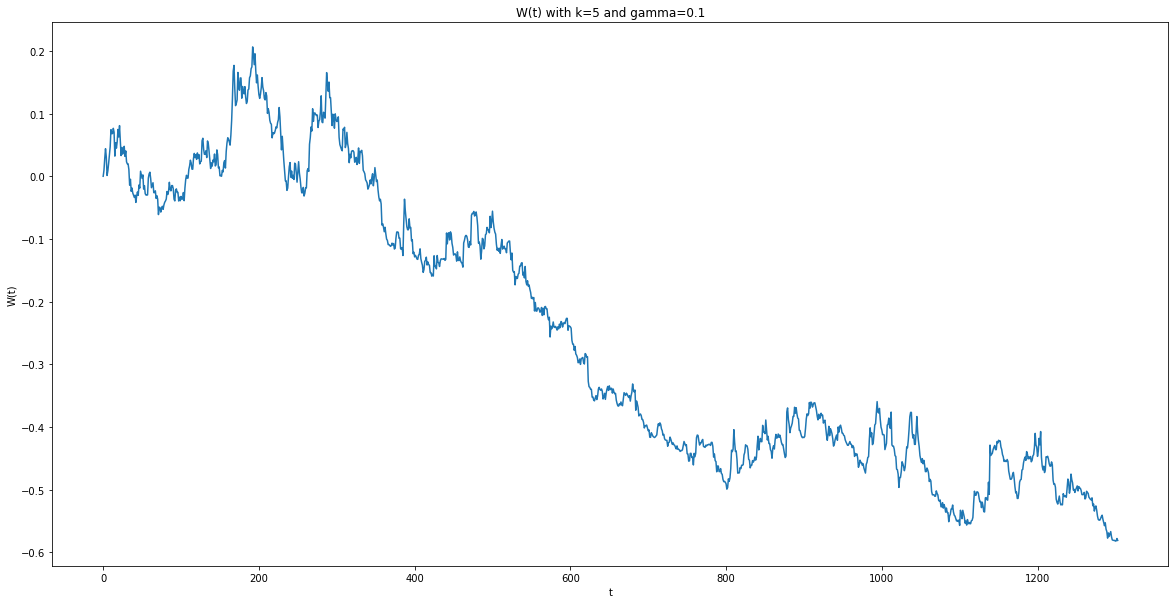

when k=5 and gamma=0.3, W(t) and V(t) dont always have the same sign


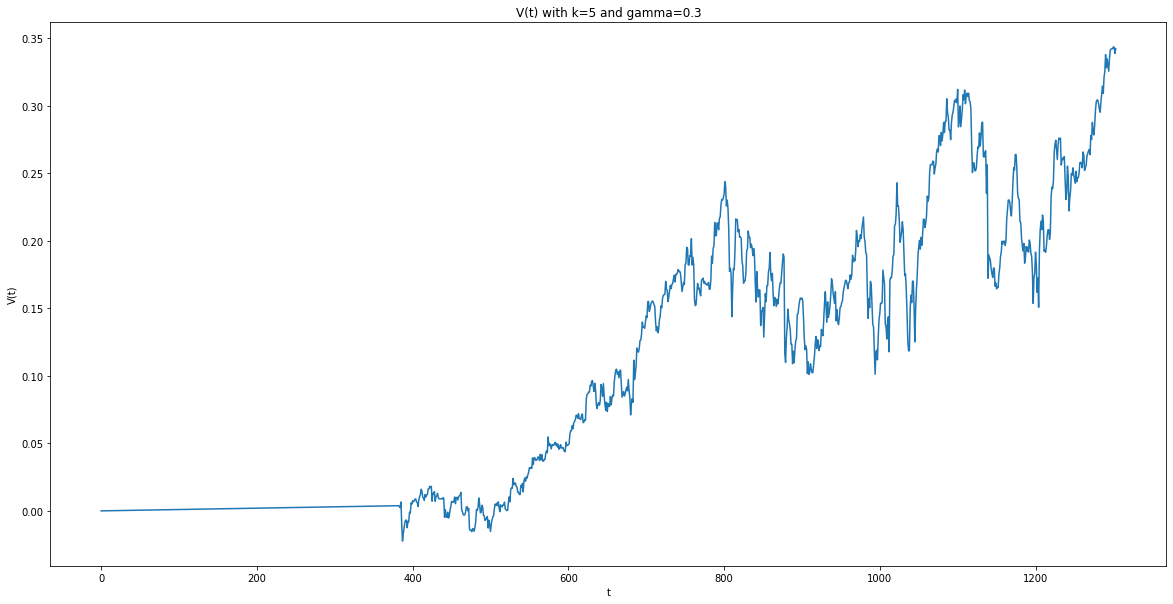

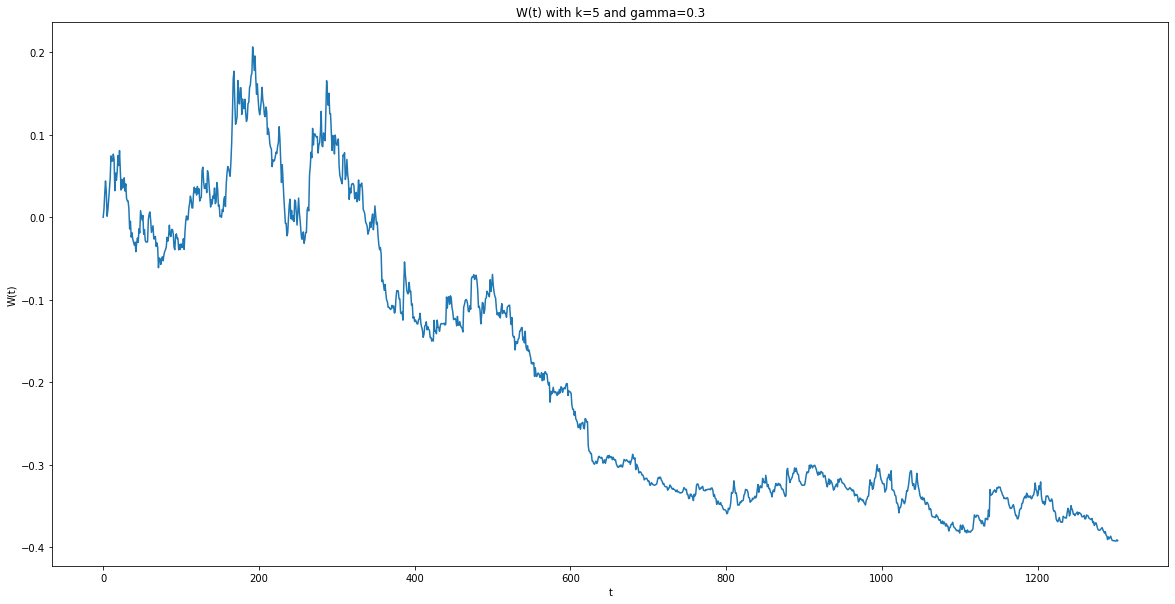

when k=5 and gamma=0.5, W(t) and V(t) dont always have the same sign


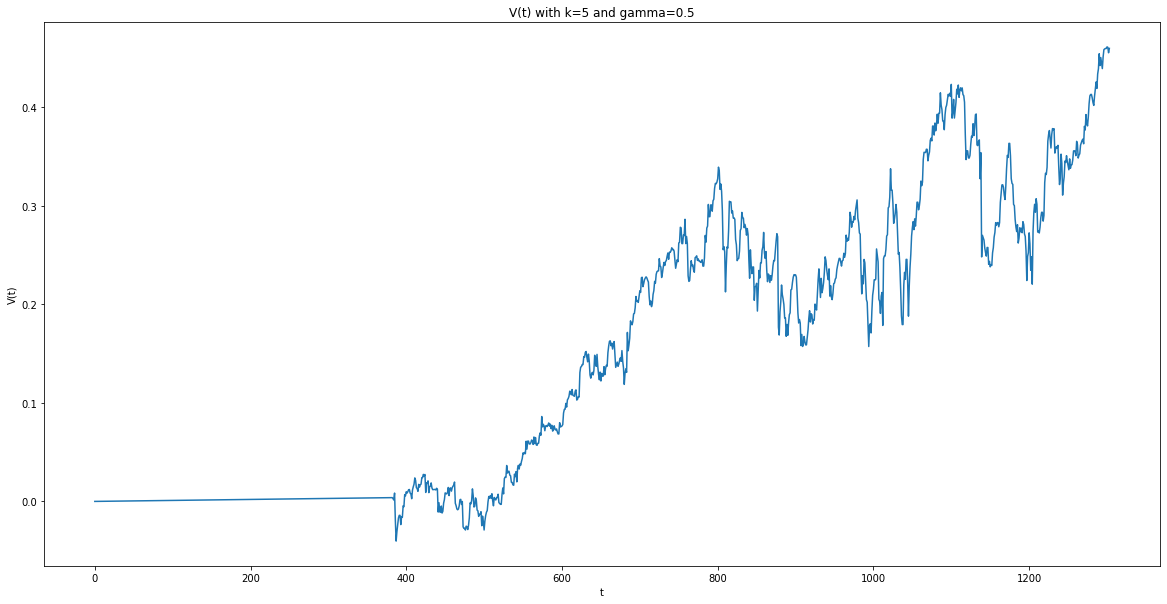

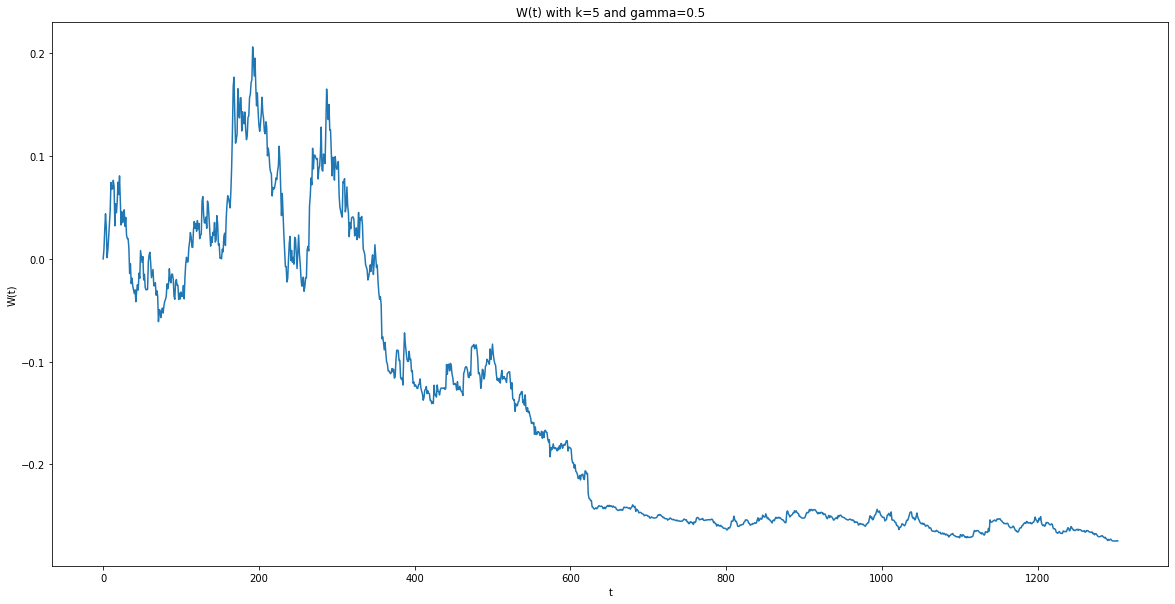

when k=5 and gamma=0.7, W(t) and V(t) dont always have the same sign


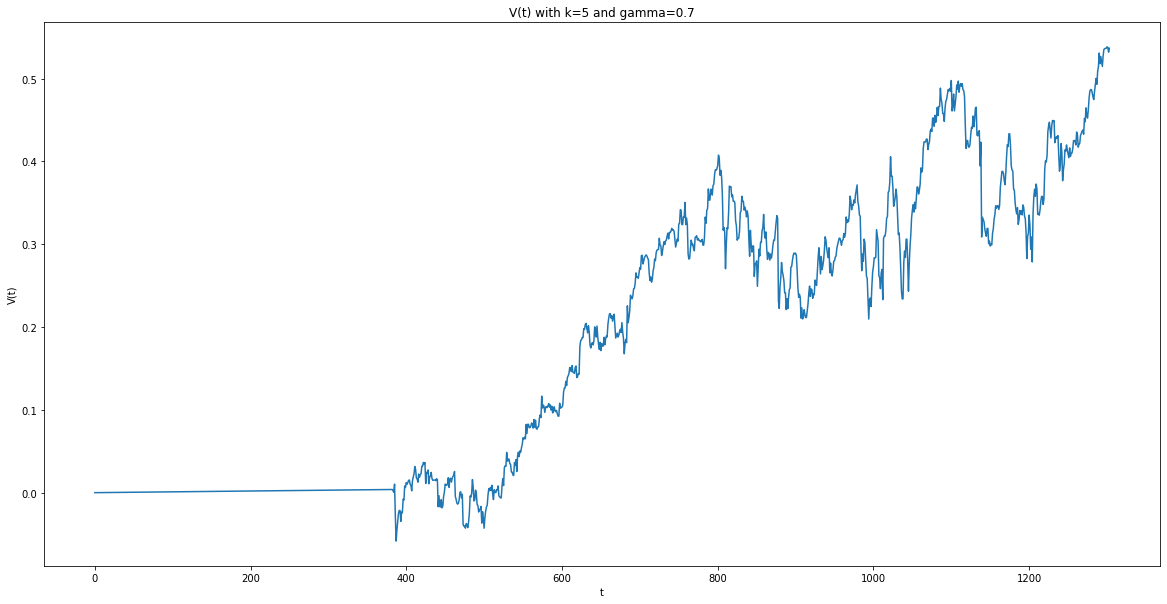

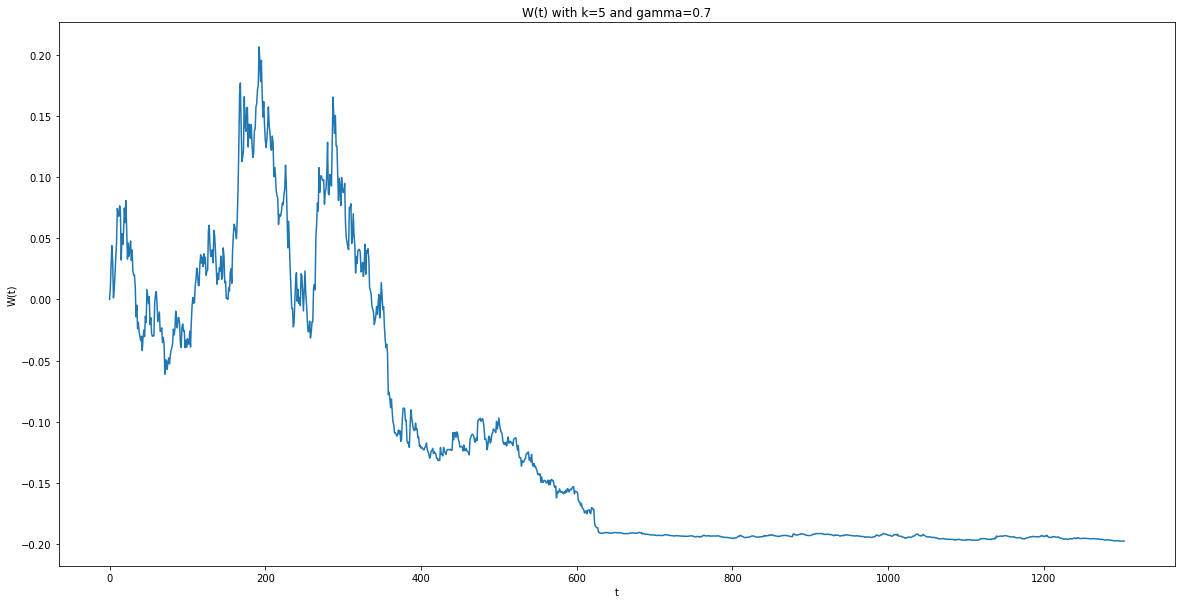

when k=5 and gamma=0.9, W(t) and V(t) dont always have the same sign


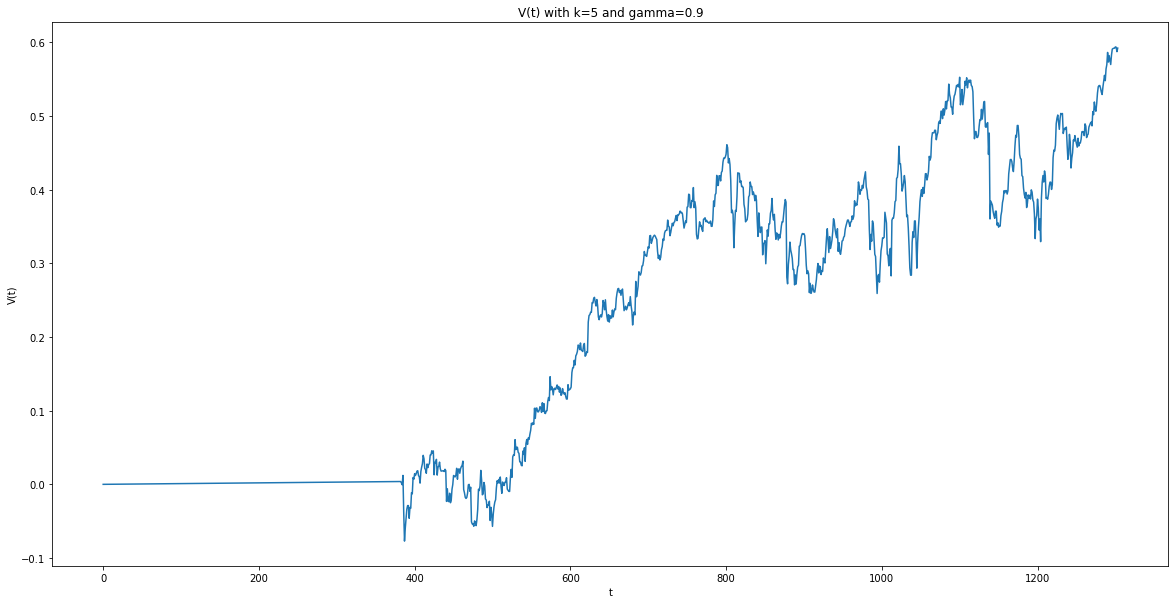

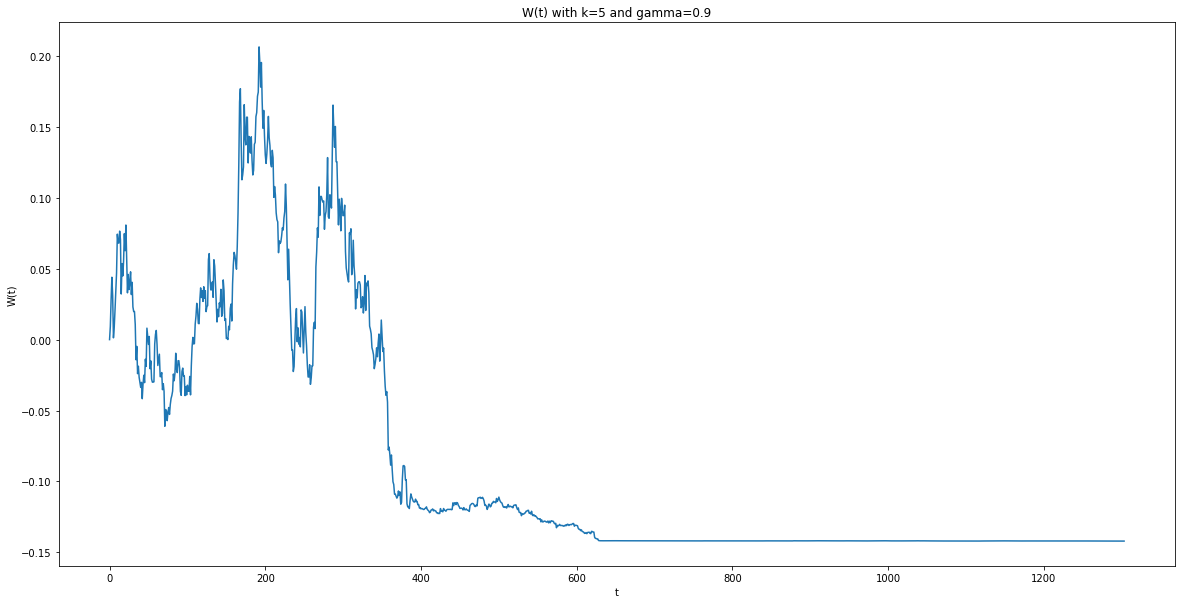

In [115]:
# 10 b 
# Plot v(t) = ln[Vγ(t)/V(0)] and w(t) = ln[Wγ(t)/W(0)]. Do they always have the same sign?
def if_same_sign(l1,l2):
    result=[]
    for i in range(len(l1)):
        if l1[i]*l2[i]<0:
            result.append(0)
        else:
            result.append(1)
    return result



for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
    window = 5
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = window,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    W_q10_gauss_5 = (M_q10_gauss_5/testing_prices) + N_q10_gauss_5
    
    sign_diff = if_same_sign(np.log(V_q10_gauss_5/V_q10_gauss_5[0]), np.log(W_q10_gauss_5/W_q10_gauss_5[0]))
    
    if len(sign_diff)!=sum(sign_diff) or sum(sign_diff)!=0:
        print(f'when k={window} and gamma={gamma}, W(t) and V(t) dont always have the same sign')
    else:
        print(f'when k={window} and gamma={gamma}, W(t) and V(t) always have the same sign')
        
    plt.plot(np.log(V_q10_gauss_5/V_q10_gauss_5[0]))
    plt.xlabel('t')
    plt.ylabel('V(t)')
    plt.title(f"V(t) with k={window} and gamma={gamma}")
    plt.show()
    
    plt.plot(np.log(W_q10_gauss_5/W_q10_gauss_5[0]))
    plt.xlabel('t')
    plt.ylabel('W(t)')
    plt.title(f"W(t) with k={window} and gamma={gamma}")
    plt.show()


when k=5 and gamma=0.1, W(t) and V(t) dont always have the same sign


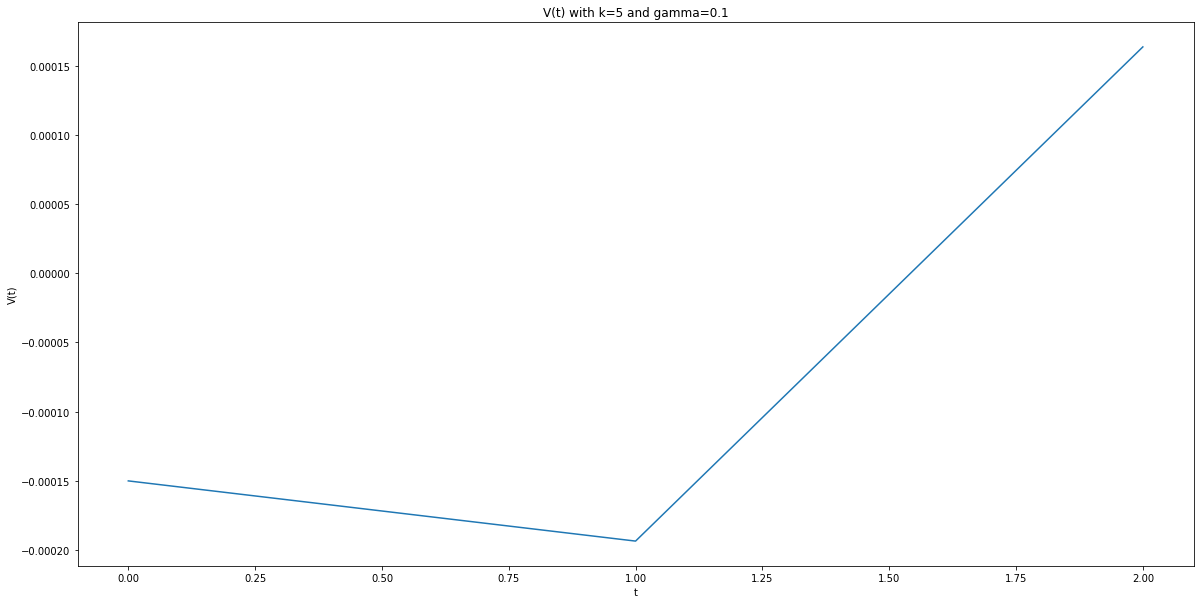

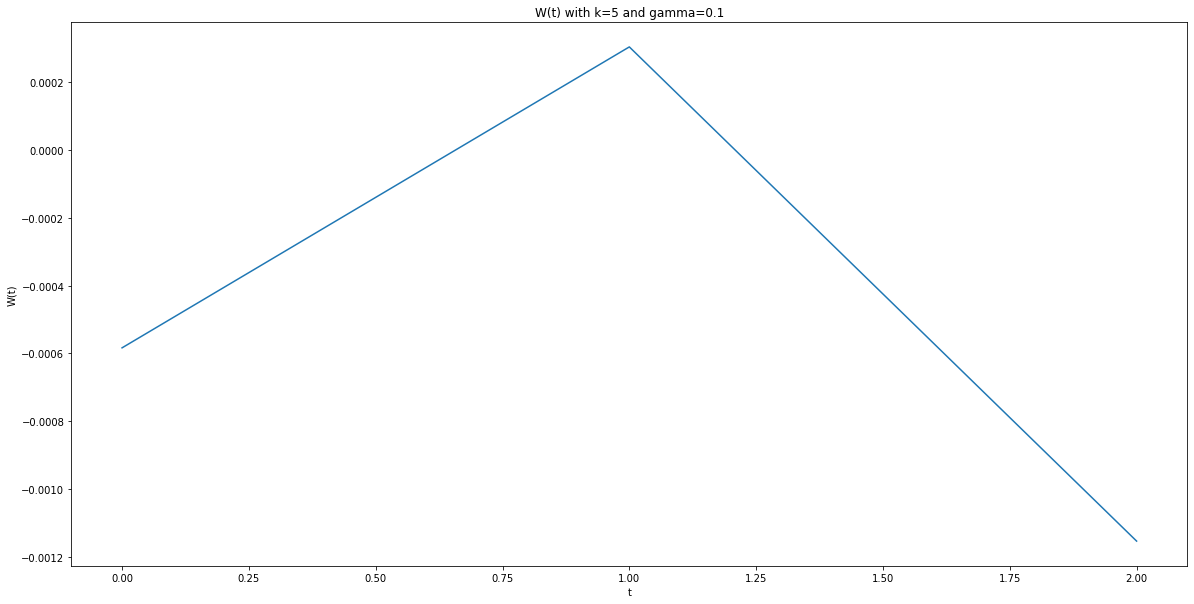

when k=5 and gamma=0.3, W(t) and V(t) dont always have the same sign


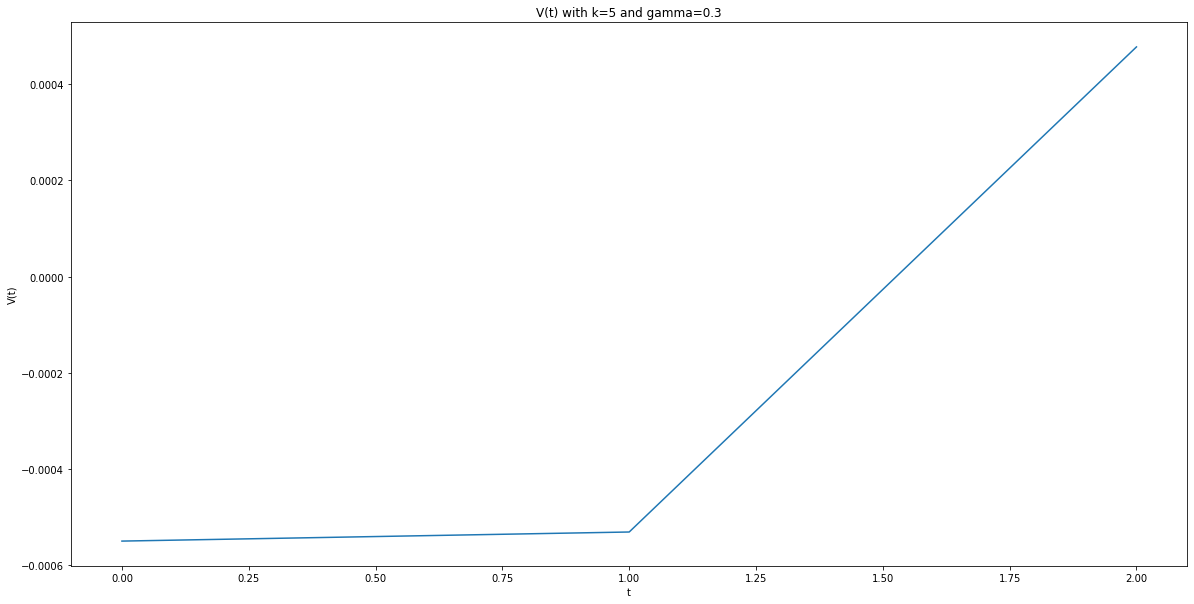

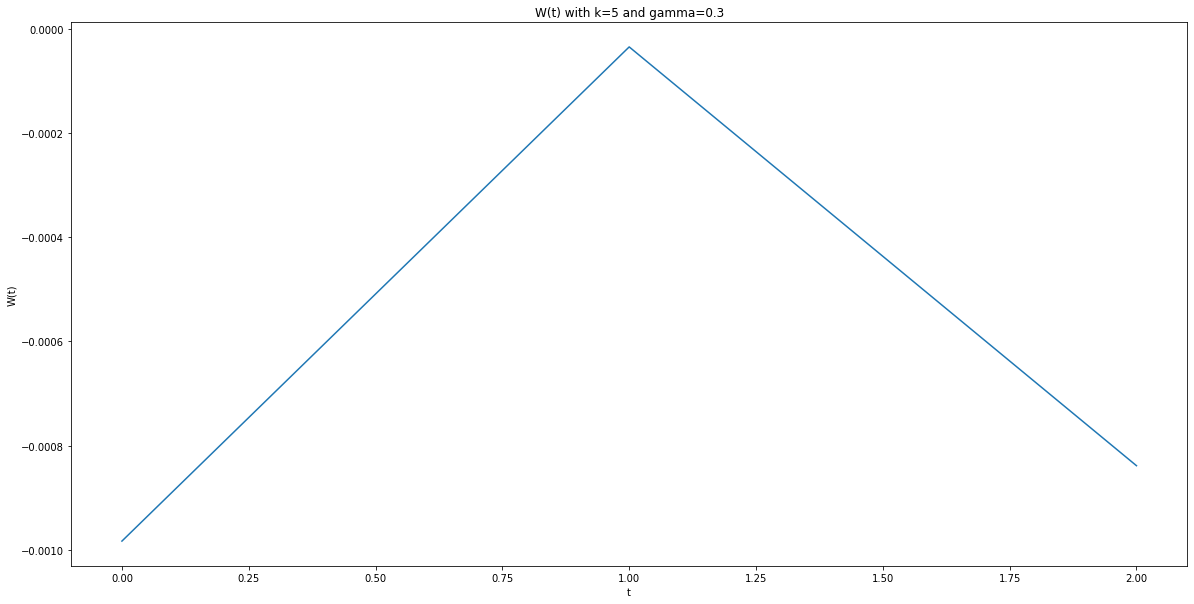

when k=5 and gamma=0.5, W(t) and V(t) dont always have the same sign


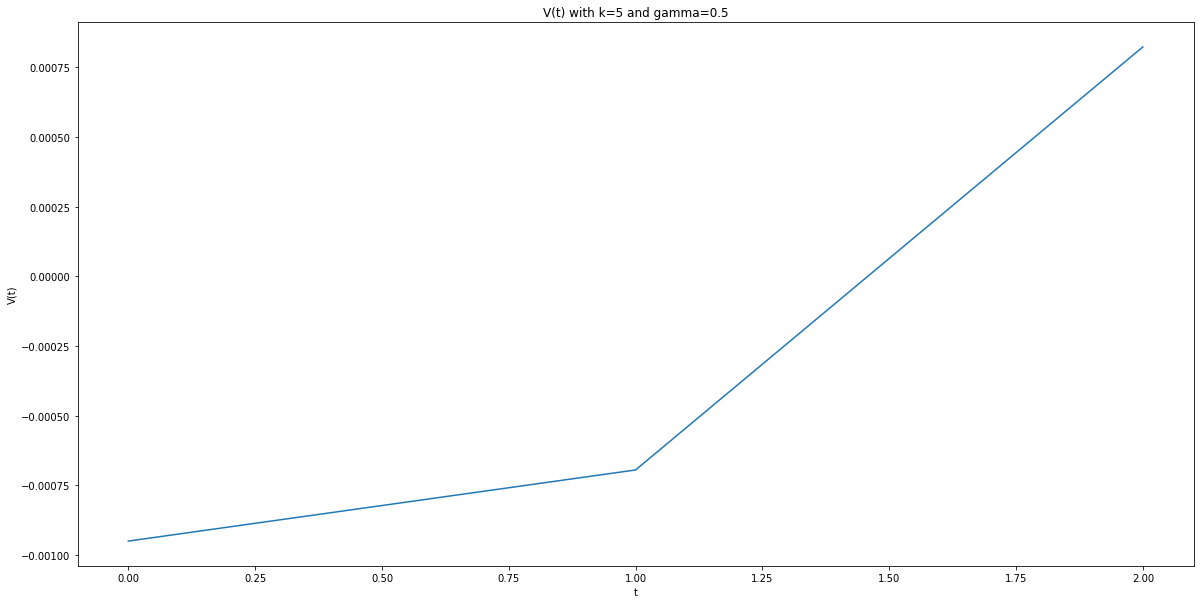

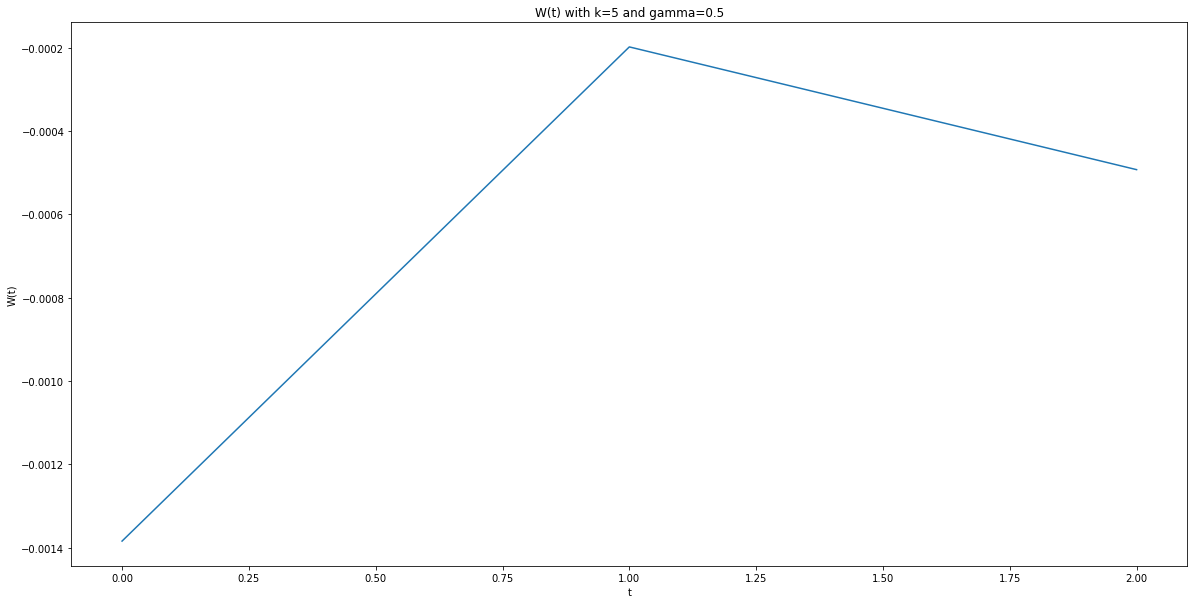

when k=5 and gamma=0.7, W(t) and V(t) dont always have the same sign


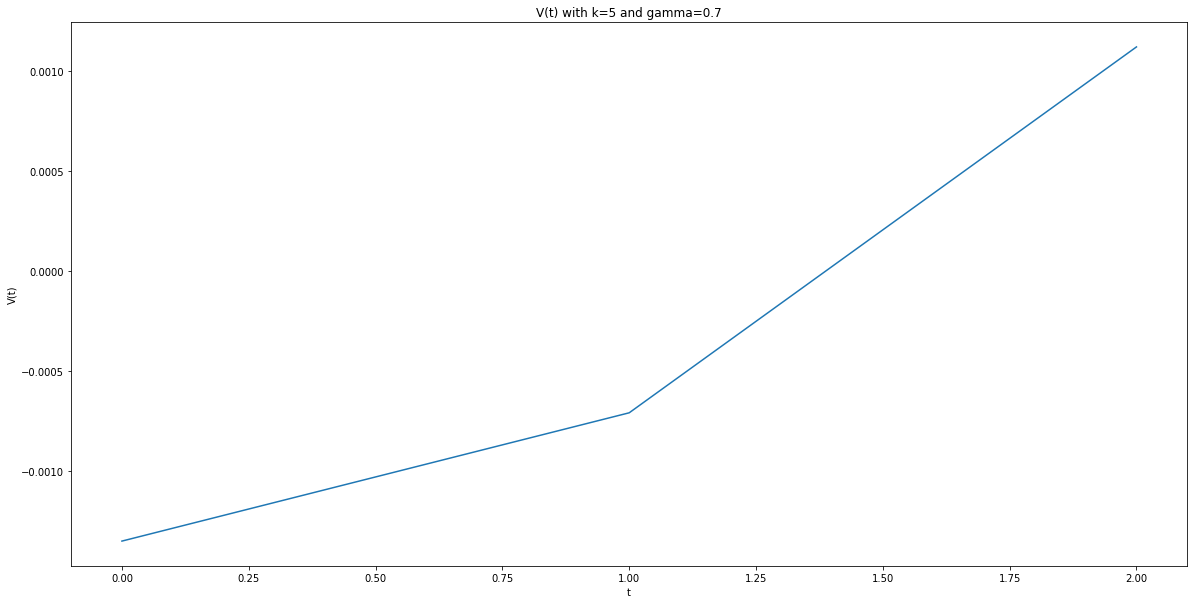

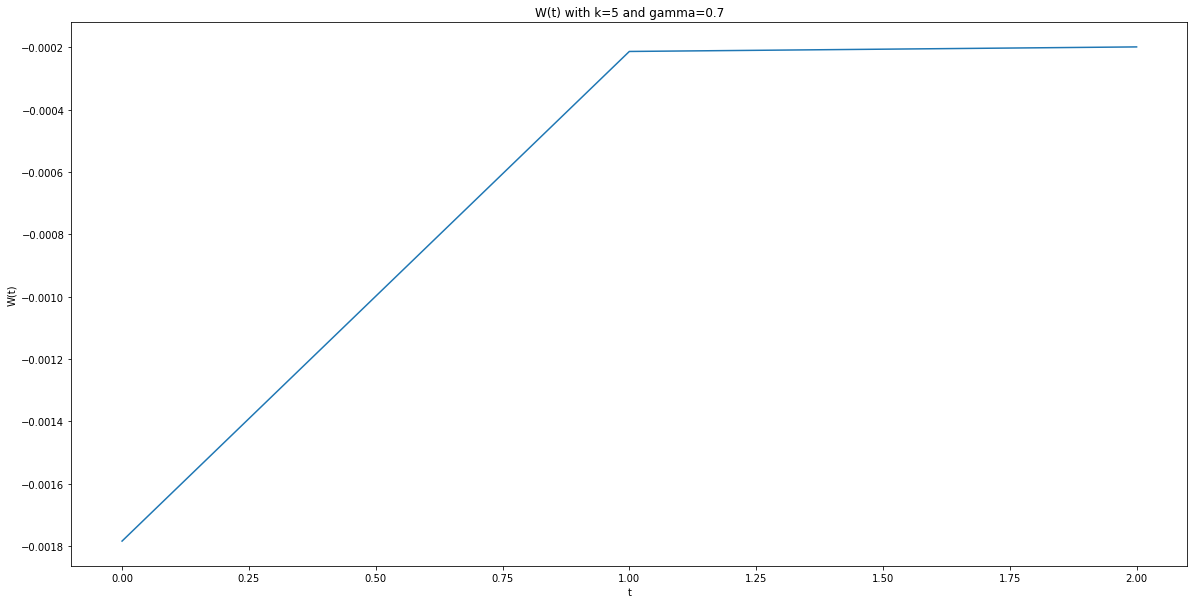

when k=5 and gamma=0.9, W(t) and V(t) dont always have the same sign


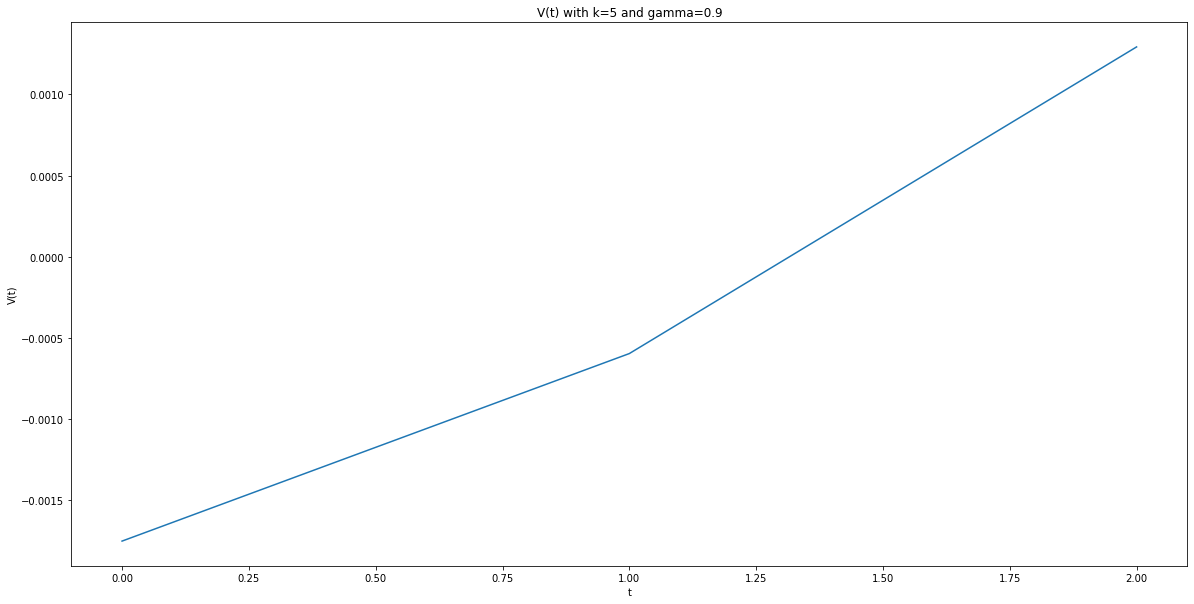

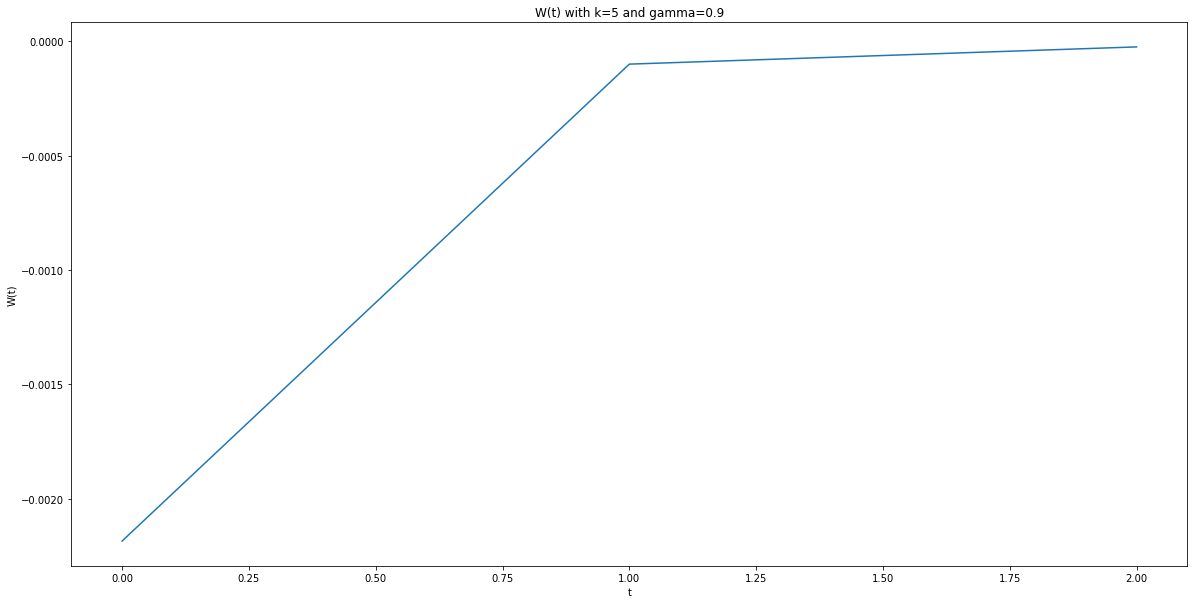

end


In [116]:
# 10c 
# Plot vi = ln[Vγ(ti)/Vγ(ti–1)] and wi = ln[Wγ(ti)/Wγ(ti–1)] against i, where the ith transaction happens at t = ti. 
# Do they always have the same sign?

for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
    window = 5
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record   = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = window,interest = 5e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    W_q10_gauss_5 = (M_q10_gauss_5/testing_prices) + N_q10_gauss_5
    v = record[1:] * np.log(V_q10_gauss_5[1:]/V_q10_gauss_5[:-1])
    w = record[1:] * np.log(W_q10_gauss_5[1:]/W_q10_gauss_5[:-1])
    sign_diff=if_same_sign(v,w)
    if len(sign_diff)!=sum(sign_diff):
        print(f'when k={window} and gamma={gamma}, W(t) and V(t) dont always have the same sign')
    else:
        print(f'when k={window} and gamma={gamma}, W(t) and V(t) always have the same sign')
    plt.plot(v[v!= 0])
    plt.xlabel('t')
    plt.ylabel('V(t)')
    plt.title(f"V(t) with k={window} and gamma={gamma}")
    plt.show()
    
    plt.plot(w[w!=0])
    plt.xlabel('t')
    plt.ylabel('W(t)')
    plt.title(f"W(t) with k={window} and gamma={gamma}")
    
    plt.show()
print('end')

In [117]:
testing_values[record == True]

array([ 0.00043346, -0.00049694,  0.00131731])

In [118]:
pct_change = testing_values[record == True]

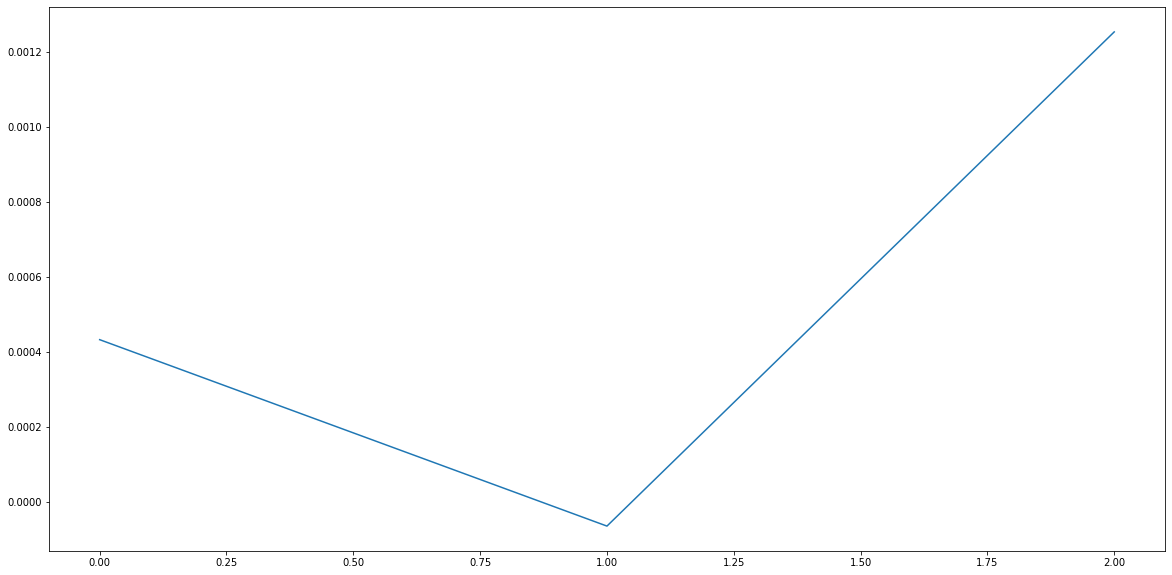

In [119]:
plt.plot([sum(pct_change[:i+1]) for i in range(len(pct_change))])

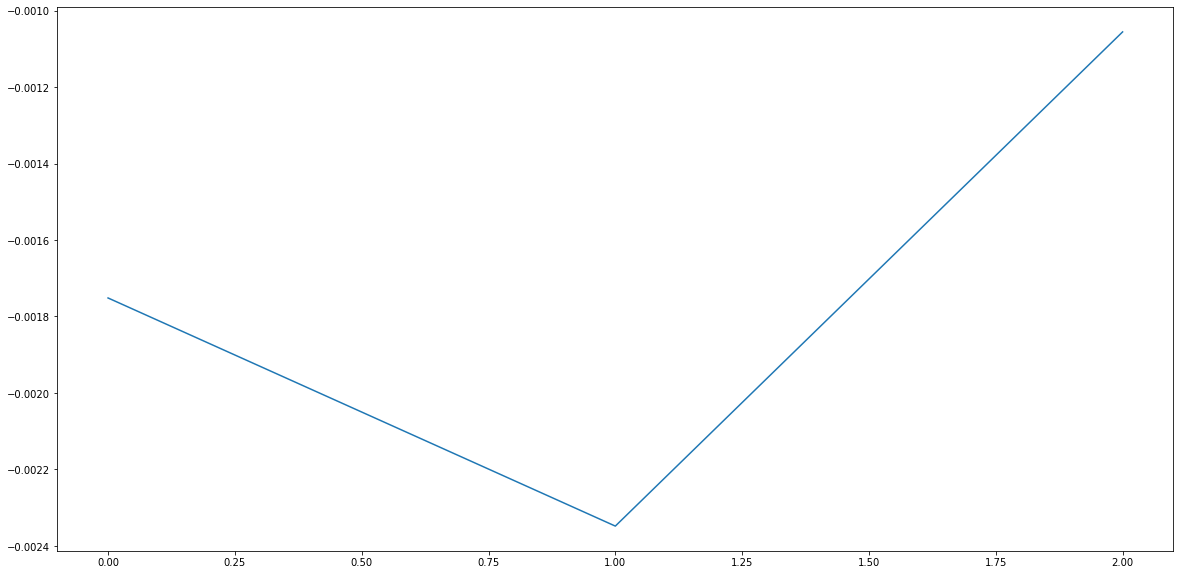

In [120]:
plt.plot([sum(v[v!= 0][:i+1]) for i in range(len(v[v!= 0]))])

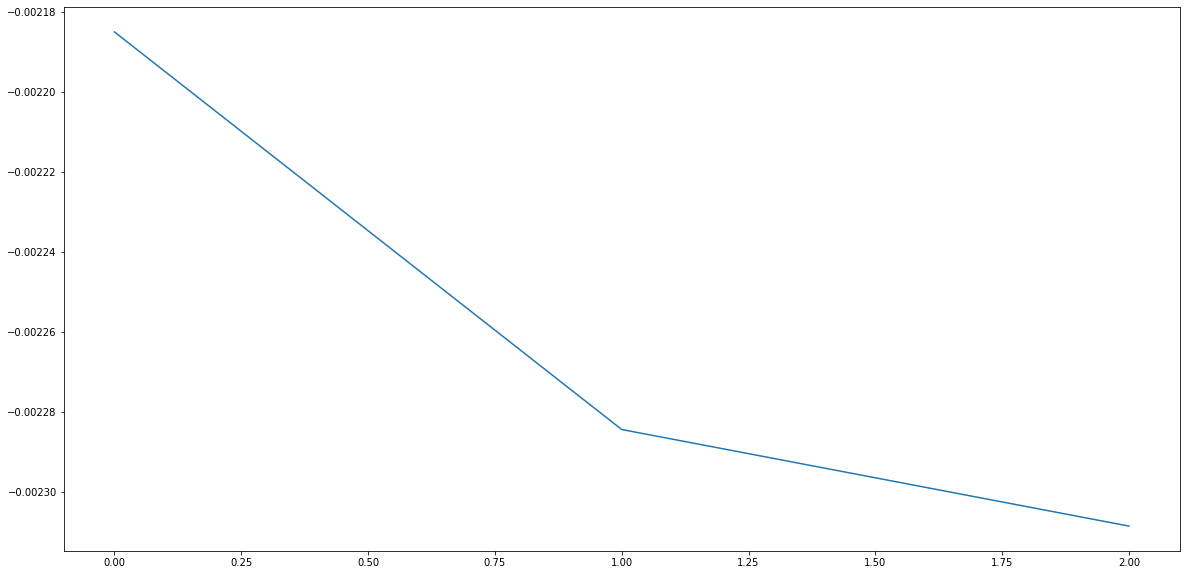

In [121]:
plt.plot([sum(w[w!= 0][:i+1]) for i in range(len(w[w!= 0]))])

In [122]:
def if_same_sign(a,b):
    return np.sum(np.sign(a) != np.sign(b)) == 0

In [123]:
# 10d
# To be done
def if_same_sign(l1,l2):
    result=[]
    for i in range(len(l1)):
        if l1[i]*l2[i]<0:
            result.append(0)
        else:
            result.append(1)
    return result

for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
    window = 5
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.2% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = window,interest = 5e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    W_q10_gauss_5 = (M_q10_gauss_5/testing_prices) + N_q10_gauss_5
    
    v = record[1:] * np.log(V_q10_gauss_5[1:]/V_q10_gauss_5[:-1])
    w = record[1:] * np.log(W_q10_gauss_5[1:]/W_q10_gauss_5[:-1])
    
    
    v_tj=np.array([sum(v[:i+1]) for i in range(len(v))])
    w_tj=np.array([sum(w[:i+1]) for i in range(len(w))])
    
    
    sign_diff=if_same_sign(v_tj,w_tj)
    
    
    if len(sign_diff)!=sum(sign_diff):
        diff_pos=[i for i in range(len(sign_diff)) if sign_diff[i]==0]
        w_new=np.log(W_q10_gauss_5/W_q10_gauss_5[0])
        W_q10_gauss_5_if_win_lose=w_new[diff_pos]
        plt.plot(W_q10_gauss_5_if_win_lose)
        plt.xlabel('t')
        plt.ylabel('W(t)')
        plt.title(f"W(t) with k={window} and gamma={gamma} when sign is different")
        plt.show()
    else:
        print(f'when k={window} and gamma={gamma}, all the v(t_j) and w(t_j) are same sign')
    
print('end')

when k=5 and gamma=0.1, all the v(t_j) and w(t_j) are same sign
when k=5 and gamma=0.3, all the v(t_j) and w(t_j) are same sign
when k=5 and gamma=0.5, all the v(t_j) and w(t_j) are same sign
when k=5 and gamma=0.7, all the v(t_j) and w(t_j) are same sign
when k=5 and gamma=0.9, all the v(t_j) and w(t_j) are same sign
end


In [142]:
v_tj

array([ 0.        ,  0.        ,  0.        , ..., -0.00105589,
       -0.00105589, -0.00105589])

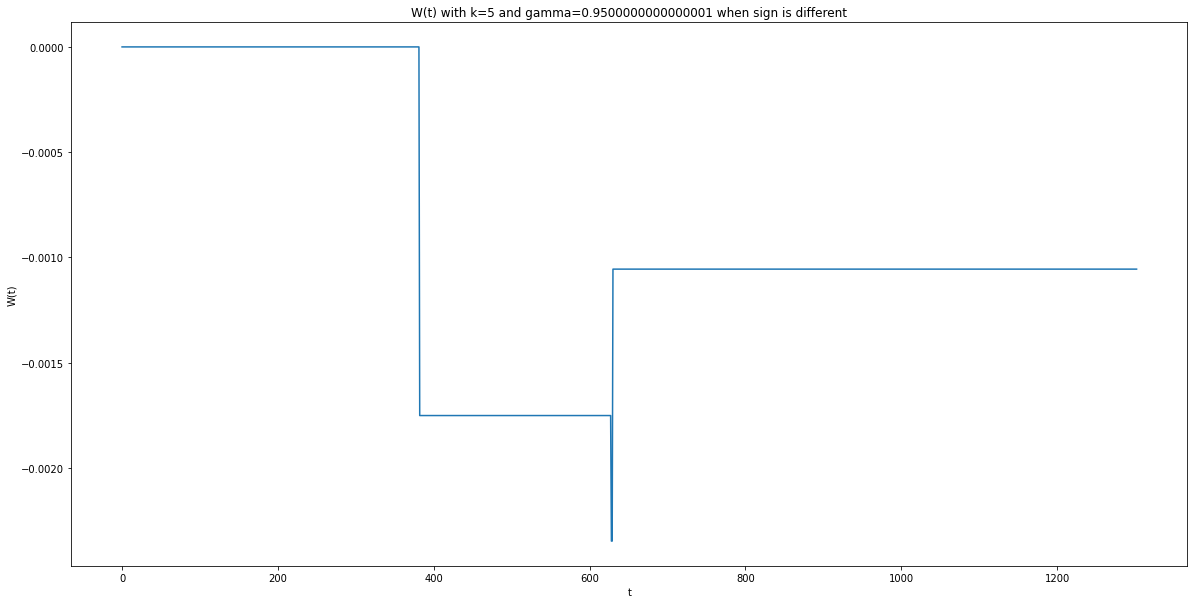

In [141]:
plt.plot(v_tj)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title(f"W(t) with k={window} and gamma={gamma} when sign is different")
plt.show()

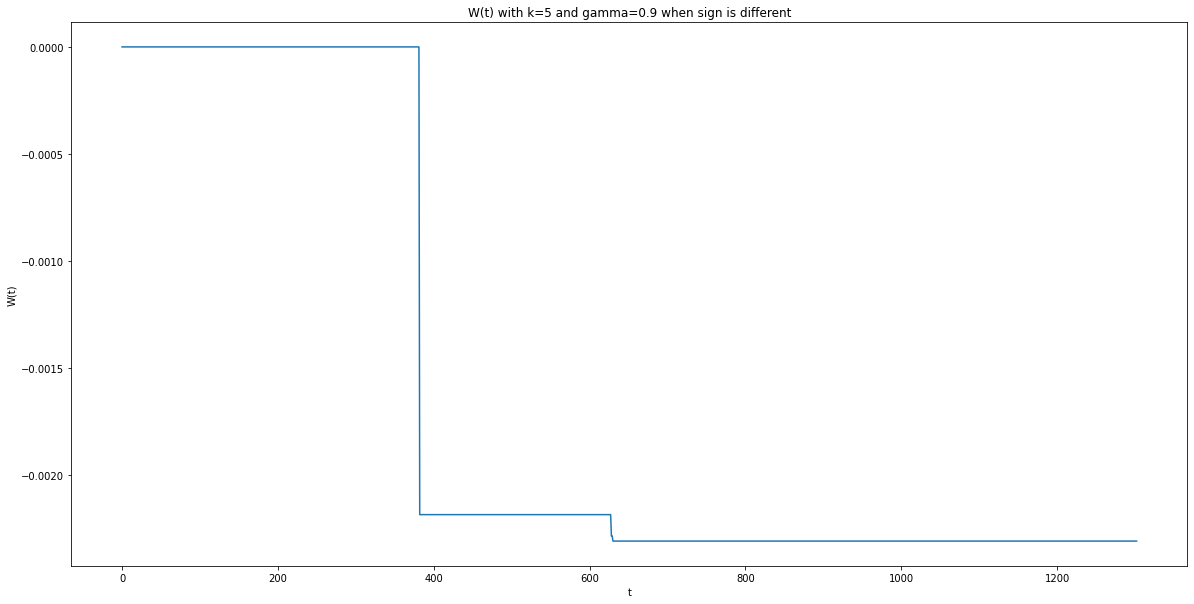

In [125]:
plt.plot(w_tj)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title(f"W(t) with k={window} and gamma={gamma} when sign is different")
plt.show()

# Question 11

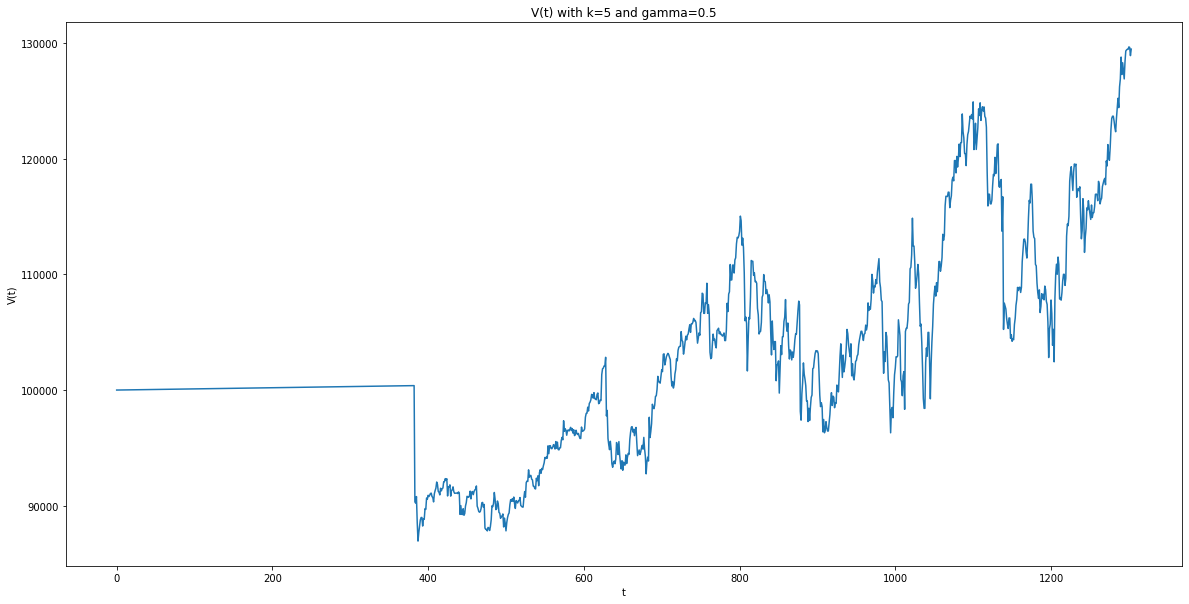

The Final Portfolio Value is 129446.98366300965


In [126]:
# Question 11
# Trade with m = γM(t) and n = γN(t). Plot the portfolio’s monetary value V(t)
gamma = 0.5
S = testing_prices
V,M,N,record = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
           tax = 0.2, window = 5,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

In [127]:
xi = 1e-05
gamma_u = (gamma * (M + (N * S)))/((M+N*S)- (xi*M) + (gamma*M*xi))

In [128]:
gamma_d = (gamma * (M + (N * S)))/((M+N*S) - (N*S*xi) + (gamma*N*S*xi))

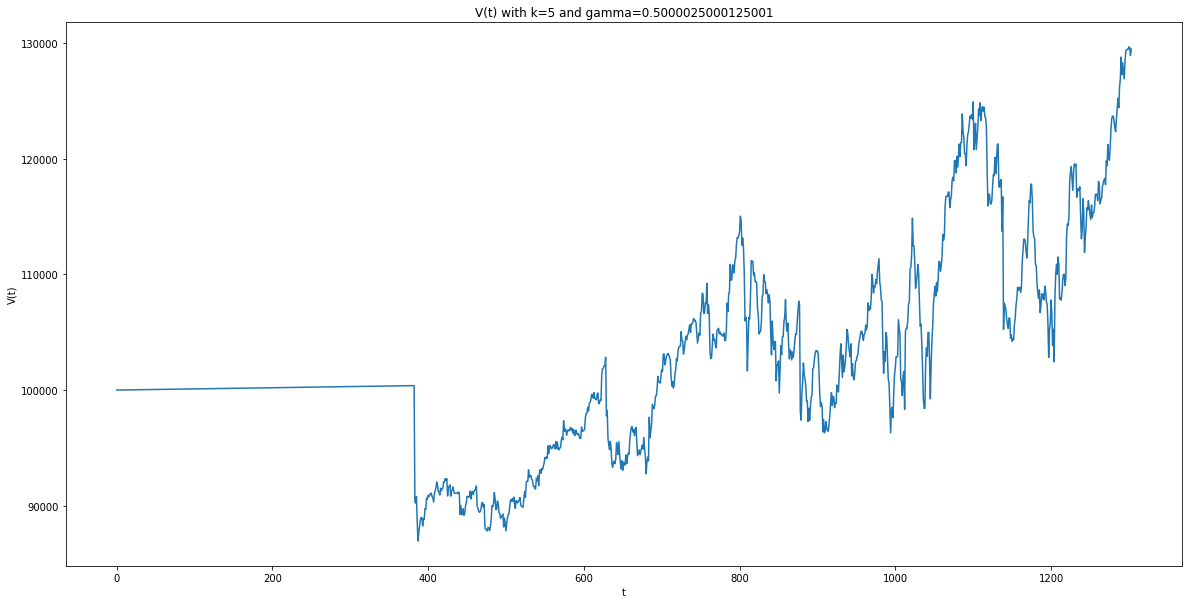

The Final Portfolio Value is 129447.03947227128


In [129]:
# Question 11
# Trade with m̃ = γUM(t) and ñ = γDN(t). Plot the portfolio’s monetary value V(t)
V,M,N,_ = simulation(alphabet, start_amount = 10e4, gamma = [gamma_u, gamma_d],\
           tax = 0.2, window = 5,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True, double_gamma = True)

# Question 12

V(t) when gamma is 0.1:  [100001.         100002.00001    100003.00003    ... 116617.61350839
 116358.03395984 116564.02333212]
V(t) when gamma is 0.3:  [100001.         100002.00001    100003.00003    ... 140962.30907008
 140316.07896259 140826.22803232]
V(t) when gamma is 0.5:  [100001.         100002.00001    100003.00003    ... 158538.35297931
 157650.45853763 158350.75564381]
V(t) when gamma is 0.7:  [100001.         100002.00001    100003.00003    ... 171254.593323
 170228.7486443  171037.63663945]
V(t) when gamma is 0.9:  [100001.         100002.00001    100003.00003    ... 181019.87818803
 179918.52524194 180786.90149211]


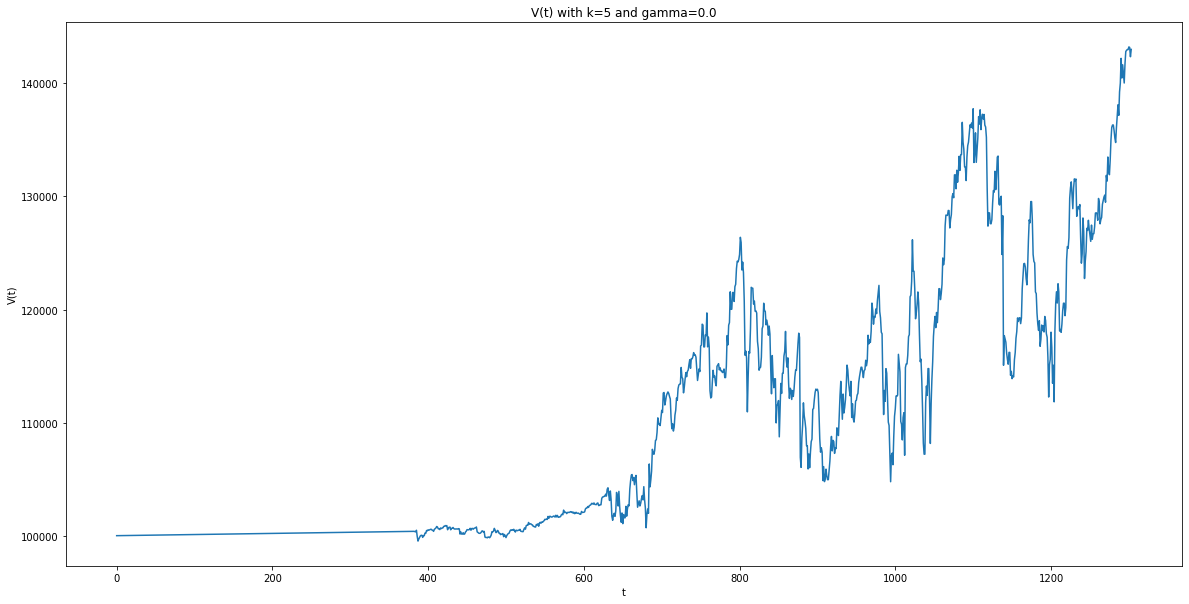

The Final Portfolio Value is 143002.56861888675
V(t) when using the ideal gamma:  [100001.         100002.00001    100003.00003    ... 143176.21281626
 142354.65554111 143002.56861889]


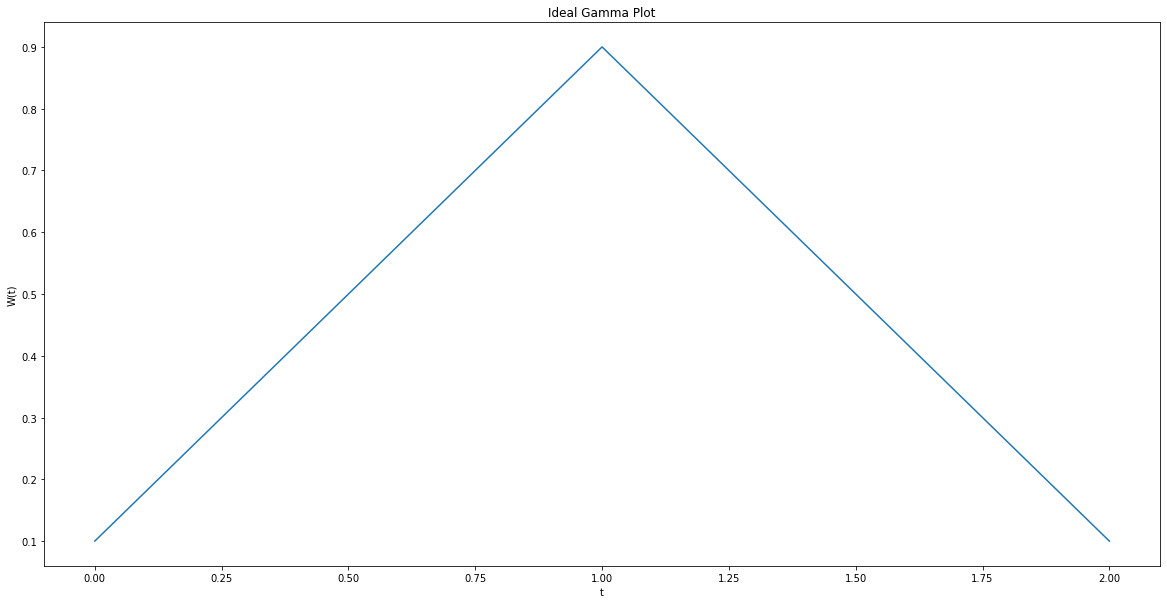

In [130]:
# 12a, b , d
# Trade with γ  {0.1, 0.3, 0.5, 0.7, 0.9}, then compute each portfolio’s monetary value Vγ(t).
# Consider ξ = 0.2% and r = 0.001%

gamma_list = np.array([0.1, 0.3,0.5, 0.7, 0.9])

V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record = simulation(alphabet, start_amount = 10e4, gamma= gamma_list[0],\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)
total_gamma = V_q10_gauss_5[1:]/V_q10_gauss_5[:-1]
print(f"V(t) when gamma is {gamma_list[0]}: ",V_q10_gauss_5)

for gamma in gamma_list[1:]:
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.1% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = window,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    
    total_gamma = np.vstack((total_gamma, V_q10_gauss_5[1:]/V_q10_gauss_5[:-1]))
    print(f"V(t) when gamma is {gamma}: ",V_q10_gauss_5)
    
# Computing the ideal gamma
gamma_ideal = list(map(lambda x : gamma_list[x], np.argmax(total_gamma, axis = 0)))
gamma_ideal = gamma_ideal * record[:-1]

# Re-trade and compute the V(t) using the ideal gamma
V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, _ = simulation(alphabet, start_amount = 10e4, gamma = gamma_ideal,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)
print(f"V(t) when using the ideal gamma: ",V_q10_gauss_5)

plt.plot(gamma_ideal[gamma_ideal != 0])
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title(f"Ideal Gamma Plot")
plt.show()

In [131]:
gamma_ideal[gamma_ideal != 0]

array([0.1, 0.9, 0.1])

V(t) when gamma is 0.1:  [100001.         100002.00001    100003.00003    ... 109250.14466209
 109114.71842834 109223.05029092]
V(t) when gamma is 0.1:  [100001.         100002.00001    100003.00003    ... 116617.61350839
 116358.03395984 116564.02333212]
V(t) when gamma is 0.15000000000000002:  [100001.         100002.00001    100003.00003    ... 123442.73862098
 123070.64690465 123365.13965072]
V(t) when gamma is 0.2:  [100001.         100002.00001    100003.00003    ... 129755.34575122
 129281.73813714 129656.08722287]
V(t) when gamma is 0.25:  [100001.         100002.00001    100003.00003    ... 135585.26065047
 135020.48853167 135466.55402469]
V(t) when gamma is 0.3:  [100001.         100002.00001    100003.00003    ... 140962.30907008
 140316.07896259 140826.22803232]
V(t) when gamma is 0.35000000000000003:  [100001.         100002.00001    100003.00003    ... 145916.31676141
 145197.69030429 145764.79722192]
V(t) when gamma is 0.4:  [100001.         100002.00001    100003.00003 

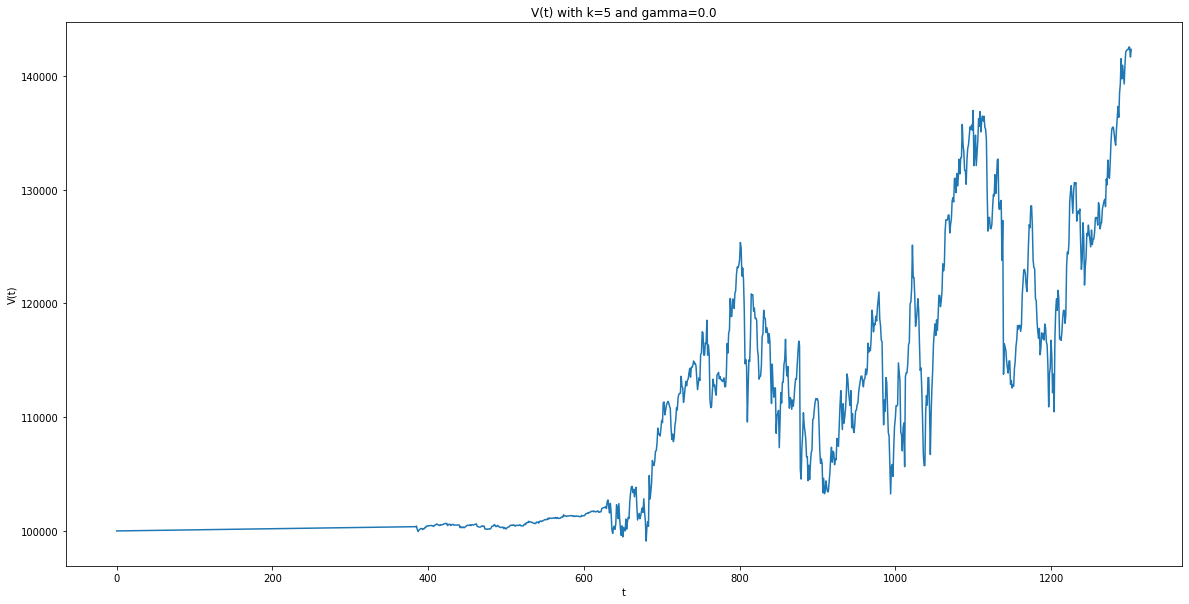

The Final Portfolio Value is 142311.03745885458
V(t) when using the ideal gamma:  [100001.         100002.00001    100003.00003    ... 142488.54916758
 141649.01639488 142311.03745885]


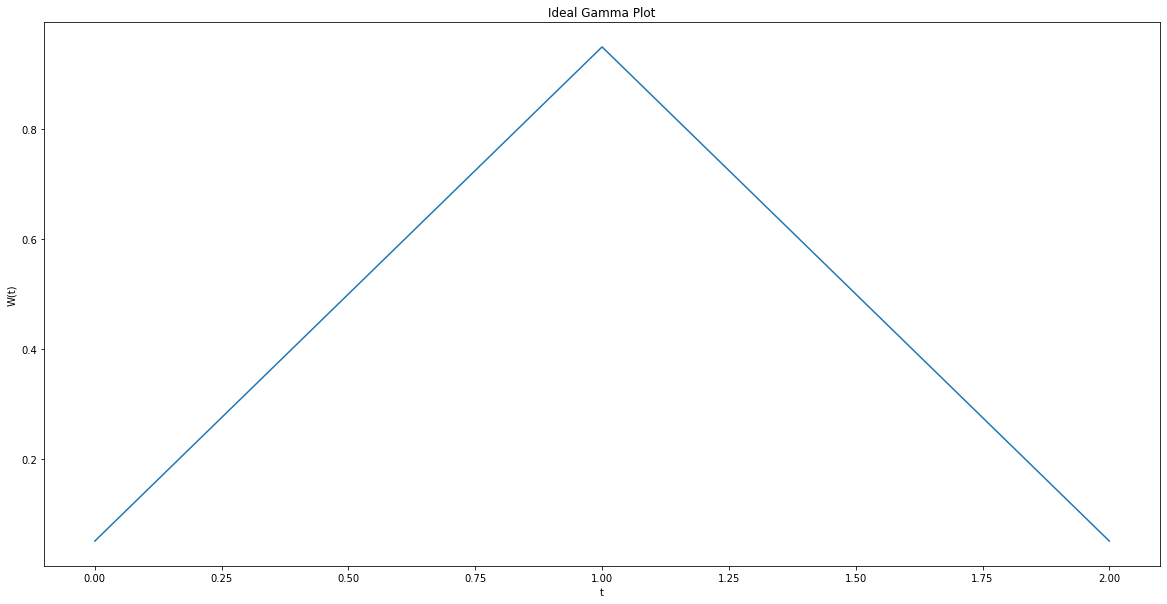

In [132]:
# 12 c (Extra)
# Re-do the question 12 a&b&d with 15 more gamma values

gamma_trial = np.arange(0.05, 1, 0.05)
V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, record = simulation(alphabet, start_amount = 10e4, gamma=gamma_trial[0],\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)
total_gamma = V_q10_gauss_5[1:]/V_q10_gauss_5[:-1]
print(f"V(t) when gamma is {gamma_list[0]}: ",V_q10_gauss_5)

for gamma in gamma_trial[1:]:
    # Question 7b (based on testing dataset) - Gaussian bayes detector - k=1, tax = 0.1% 
    V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, _ = simulation(alphabet, start_amount = 10e4, gamma = gamma,\
               tax = 0.002, window = window,interest = 1e-05,\
               x1_detect = x1_gauss, x2_detect = x2_gauss, \
               plot = False)
    total_gamma = np.vstack((total_gamma, V_q10_gauss_5[1:]/V_q10_gauss_5[:-1]))
    print(f"V(t) when gamma is {gamma}: ",V_q10_gauss_5)

# Computing the ideal gamma
gamma_ideal = list(map(lambda x : gamma_trial[x], np.argmax(total_gamma, axis = 0)))
gamma_ideal_list = gamma_ideal * record[:-1]

# Re-trade and compute the V(t) using the ideal gamma
V_q10_gauss_5, M_q10_gauss_5, N_q10_gauss_5, _ = simulation(alphabet, start_amount = 10e4, gamma = gamma_ideal_list,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = True)

print(f"V(t) when using the ideal gamma: ",V_q10_gauss_5)


plt.plot(gamma_ideal_list[gamma_ideal_list != 0])
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title(f"Ideal Gamma Plot")
plt.show()

In [133]:
gamma_ideal_list[gamma_ideal_list != 0]

array([0.05, 0.95, 0.05])

In [134]:
# 12.2 (Extra)
# Re-do the question 12 a&b&d with 15 more gamma values

In [135]:
gamma_a = np.zeros(1304)
gamma_a.fill(0.7)
gamma_c = np.zeros(1304)
gamma_c.fill(0.3)

In [136]:
# Re-trade and compute the V(t) using the ideal gamma

V_alice, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.7,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)

V_charile, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.3,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)

#TODO : Think about a strategy for Bob
V_bob, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = [gamma_a, gamma_c],\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False, double_gamma = True)

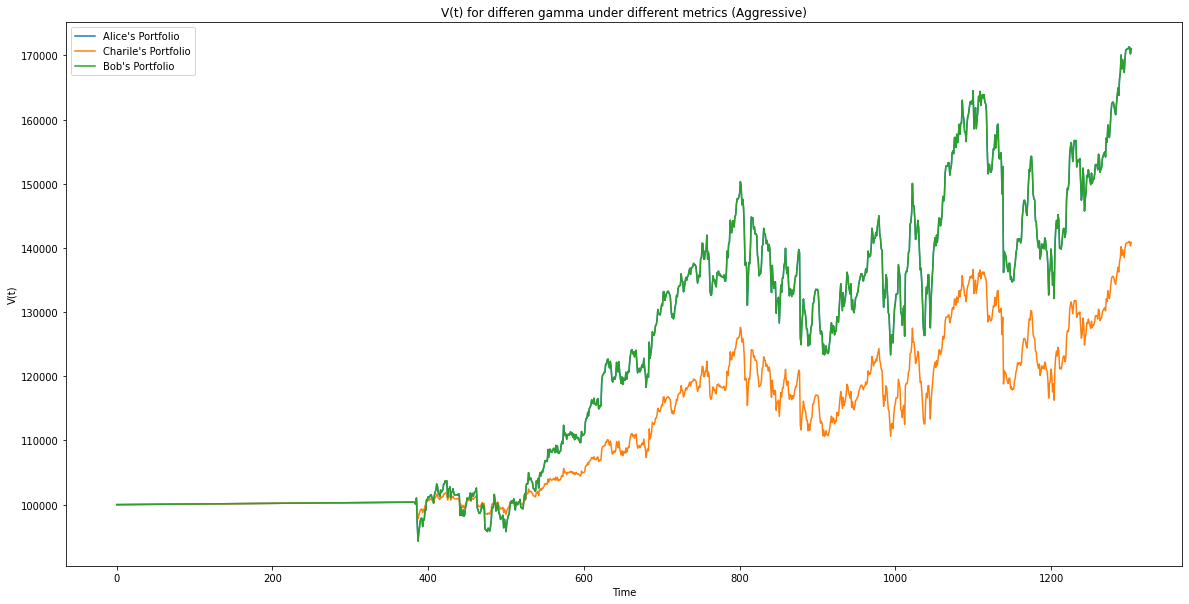

In [137]:
plt.plot(V_alice,)
plt.plot(V_charile, )
plt.plot(V_bob, )
plt.xlabel('Time')
plt.ylabel('V(t)')
plt.legend(['Alice\'s Portfolio', 'Charile\'s Portfolio' ,'Bob\'s Portfolio'])
plt.title(f"V(t) for differen gamma under different metrics (Aggressive)")
plt.show()

In [138]:
# Re-trade and compute the V(t) using the ideal gamma

V_alice, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.7,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)

V_charile, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = 0.3,\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False)

#TODO : Think about a strategy for Bob
V_bob, _, _, _ = simulation(alphabet, start_amount = 10e4, gamma = [gamma_c, gamma_a],\
           tax = 0.002, window = window,interest = 1e-05,\
           x1_detect = x1_gauss, x2_detect = x2_gauss, \
           plot = False, double_gamma = True)

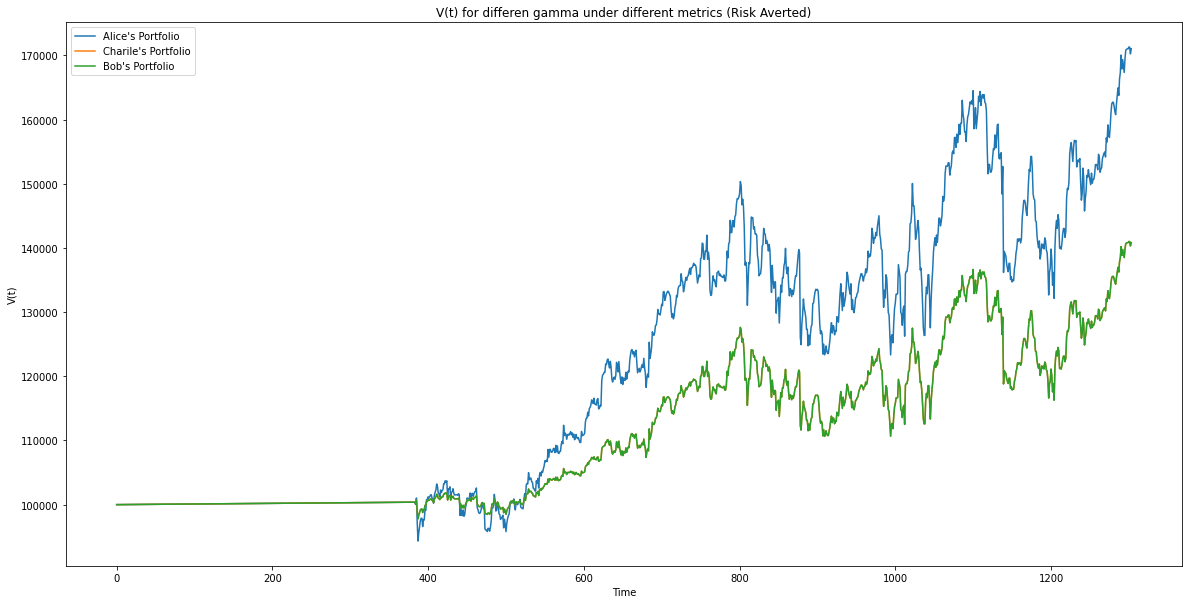

In [139]:
plt.plot(V_alice,)
plt.plot(V_charile, )
plt.plot(V_bob, )
plt.xlabel('Time')
plt.ylabel('V(t)')
plt.legend(['Alice\'s Portfolio', 'Charile\'s Portfolio' ,'Bob\'s Portfolio'])
plt.title(f"V(t) for differen gamma under different metrics (Risk Averted)")
plt.show()